In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def coth(a):
    if a>0: return (1+tf.math.exp(-2*a))/(1-tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)+1)/(tf.math.exp(2*a)-1)
    if a==0: return 0

def tanh(a):
    if a>0: return (1-tf.math.exp(-2*a))/(1+tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)-1)/(tf.math.exp(2*a)+1)
    if a==0: return 0

In [3]:
data=1000
batch=100
set=10
layer=10
n_ini=1.0
n_fin=0.1
dn=-0.1
m2=-1
lam=1
c_reg1=0.001
c_reg2=0

<tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([-0.38872148,  2.20513159,  1.47390836,  2.02370423,  2.22414302,
        1.24947394,  2.9180937 ,  3.8422982 ,  4.38727259,  9.67290365])>
tf.Tensor(
[ 3.01490951  3.02722263  3.04978824  3.09134316  3.16854751  3.31437385
  3.59861219  4.18820179  5.58607614 10.29821491], shape=(10,), dtype=float64)


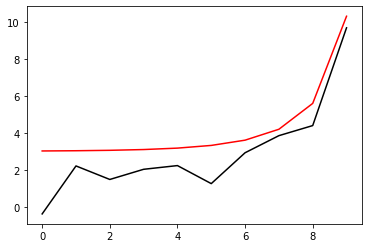

In [5]:
h=tf.zeros(layer)
h_in=[]
#h_in=[3.0205426, 3.022307 , 3.0291433, 3.04402  , 3.0732646, 3.131582 ,
# 3.2585216, 3.5762587, 4.59116  , 9.752249]
for i in range (layer):
#   midd=np.float64(10.0)
#    h_in.append(midd)
#    midd=3*coth(3*((i-layer)*dn)).numpy()
#    h_in.append(midd)
    mu=1/(1-i/10)
    h_inn=np.float64(np.random.normal(mu, 1))
    h_in.append(h_inn)
h=tf.Variable(h_in)
print(h)

h_real=tf.zeros(layer)
middd=[]
for i in range (layer):
    midd=3*coth(3*((i-layer)*dn)).numpy()
    middd.append(midd)
h_real=tf.constant(middd)
print(h_real)
plt.plot(h_real, 'r-')
plt.plot(h.numpy(), 'k-')
plt.show()

In [6]:
def F_func(a,b):
    return 2*b/n_fin-m2*a-lam*(a**3)

def t_func(a):
    return 0.5*(tf.math.tanh(100*(a-0.1))-tf.math.tanh(100*(a+0.1))+2)

In [7]:
def LP2(hh, phi, pi):
    for j in range (layer-1):
        phi1=phi+dn*pi
        pi1 =phi*m2*dn+(1-dn*hh[j])*pi+dn*lam*(phi1**3)
        phi=phi1
        pi=pi1
    return phi, pi
def NN_func_p(hh):
    Positive=[]
    while len(Positive)<batch:
        phi1=np.random.uniform(0.0, 1.5, 10000)
        pi1=np.random.uniform(-0.2, 0.2, 10000)
        phi_1, pi_1=LP2(hh, phi1, pi1)
        F=np.array(tf.math.abs(F_func(phi_1, pi_1)))
        for i in range (len(phi1[F<0.1])):
            Positive.append([phi1[F<0.1][i], pi1[F<0.1][i]])
            if len(Positive)>=batch: break
    return Positive
def NN_func_n(hh):
    Negative=[]
    while len(Negative)<batch:
        phi1=np.random.uniform(0.0, 1.5, 10000)
        pi1=np.random.uniform(-0.2, 0.2, 10000)
        phi_1, pi_1=LP2(hh, phi1, pi1)
        F=np.array(tf.math.abs(F_func(phi_1, pi_1)))
        for i in range (len(phi1[F>=0.1])):
            Negative.append([phi1[F>=0.1][i], pi1[F>=0.1][i]])
            if len(Negative)>=batch: break
    return Negative
def NN_func_01(hh, list1):
    PP=[]
    NN=[]
    phi=np.array(list1)[:, 0]
    pi=np.array(list1)[:, 1]
    F=np.array(tf.math.abs(LP2(hh, phi, pi)[1]))
    for i in range (len(phi[F<0.1])):
        PP.append([phi[F<0.1][i], pi[F<0.1][i]])
    for i in range (len(phi[F>=0.1])):
        NN.append([phi[F>=0.1][i], pi[F>=0.1][i]])
    return PP, NN

In [8]:
Positive=[]
Negative=[]
for i in range (set):
    Positive.insert(i, NN_func_p(h_real))
    Negative.insert(i, NN_func_n(h_real))
    print(i)

0
1
2
3
4
5
6
7
8
9


In [9]:
Positive0=[]
Positive1=[]
Negative0=[]
Negative1=[]
for i in range (set):
    Positive0.insert(i, NN_func_01(h, Positive[i])[0])
    Positive1.insert(i, NN_func_01(h, Positive[i])[1])
    Negative0.insert(i, NN_func_01(h, Negative[i])[0])
    Negative1.insert(i, NN_func_01(h, Negative[i])[1])

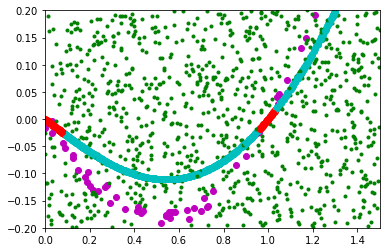

In [10]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
x_data3=[]
y_data3=[]
x_data4=[]
y_data4=[]
for i in range (set):
    x_data1.insert(i, [v[0] for v in Positive0[i]])
    y_data1.insert(i, [v[1] for v in Positive0[i]])
    x_data2.insert(i, [v[0] for v in Positive1[i]])
    y_data2.insert(i, [v[1] for v in Positive1[i]])
    x_data3.insert(i, [v[0] for v in Negative0[i]])
    y_data3.insert(i, [v[1] for v in Negative0[i]])
    x_data4.insert(i, [v[0] for v in Negative1[i]])
    y_data4.insert(i, [v[1] for v in Negative1[i]])
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'co')
    plt.plot(x_data1[i], y_data1[i], 'ro')
    plt.plot(x_data3[i], y_data3[i], 'mo')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.show()

# Error function

$E=\sum_{data} \left\vert y(\bar{x}^{(1)}) - \bar{y} \right\vert+E_{reg}(W)$
, $E_{reg}=c_{reg}^{(1)}\sum_{n=1}^{N-1}(\eta^{(n)})^{4}(h(\eta^{(n+1)})-h(\eta^{(n)}))^{2}+c_{reg}^{(2)}(h(\eta^{(N)})-1/\eta^{(N)})^{2}$

In [11]:
def Error_func(hh, list1, list2):
    phi0=np.array([v[0] for v in list1])
    pi0=np.array([v[1] for v in list1])
    phi1=np.array([v[0] for v in list2])
    pi1=np.array([v[1] for v in list2])
    phi_0, pi_0=LP2(hh, phi0, pi0)
    phi_1, pi_1=LP2(hh, phi1, pi1)
    PPlist=t_func(pi_0)
    NNlist=t_func(pi_1)
    sum_p=sum(PPlist)/batch
    sum_n=(batch-sum(NNlist))/batch

    inside=0
    for k in range (layer-1):
        second=((n_ini+k*dn)**4)*((hh[k+1]-hh[k])**2)
        inside=inside+second
    E_reg1=c_reg1*inside
    E_reg2=c_reg2*((hh[layer-1]-1/n_fin)**2)
    return E_reg1+E_reg2+sum_p+sum_n

In [12]:
for i in range (set):
    print(Error_func(h_real, Positive[i], Negative[i]))
for i in range (set):
    print(Error_func(h, Positive[i], Negative[i]))

tf.Tensor(0.011361964766403288, shape=(), dtype=float64)
tf.Tensor(0.05559604523948052, shape=(), dtype=float64)
tf.Tensor(0.040484058289812205, shape=(), dtype=float64)
tf.Tensor(0.06002423729176769, shape=(), dtype=float64)
tf.Tensor(0.021966635663936016, shape=(), dtype=float64)
tf.Tensor(0.01014167157864672, shape=(), dtype=float64)
tf.Tensor(0.020566040188435754, shape=(), dtype=float64)
tf.Tensor(0.009294389391001554, shape=(), dtype=float64)
tf.Tensor(0.03895803694578054, shape=(), dtype=float64)
tf.Tensor(0.049517000972197224, shape=(), dtype=float64)
tf.Tensor(0.9588929364550844, shape=(), dtype=float64)
tf.Tensor(0.9564511349901405, shape=(), dtype=float64)
tf.Tensor(0.9292372811505247, shape=(), dtype=float64)
tf.Tensor(0.9111809852678199, shape=(), dtype=float64)
tf.Tensor(0.8936565006007371, shape=(), dtype=float64)
tf.Tensor(0.9199941309261239, shape=(), dtype=float64)
tf.Tensor(0.8826202684597942, shape=(), dtype=float64)
tf.Tensor(0.9576527325235219, shape=(), dtype=flo

0 0.9447477970048843
[-0.48850222  2.10513791  1.37393473  1.92371589  2.12415187  1.14948097
  2.81809982  3.74230397  4.28727813  9.57624093]


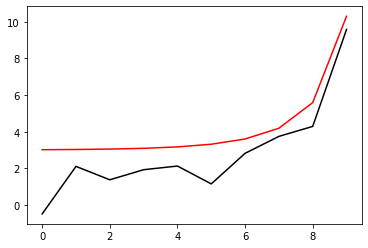

1100 0.8227953439676146
[0.67988252 2.84895496 2.46058911 2.75500171 2.74920368 1.49002525
 2.47309724 3.0086189  3.36347794 8.50143222]


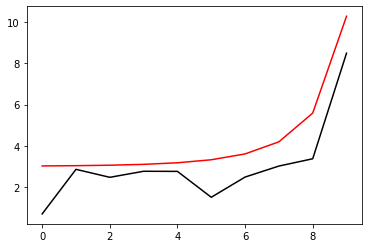

2200 0.050394151107154166
[1.94504975 4.10192595 3.70924354 4.00568083 4.00480566 2.711567
 3.27392908 2.89642141 2.7855378  7.40919148]


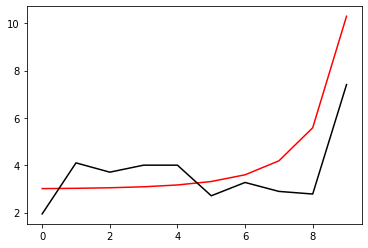

3300 0.04968024925864692
[2.00863402 4.06701994 3.7846362  4.09278586 4.1430124  3.00486006
 3.75201729 3.45597164 3.20815373 6.4833705 ]


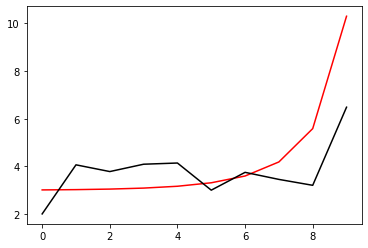

4400 0.03570441744245266
[1.99404927 3.90004455 3.70121801 3.96763641 3.99304748 2.90060912
 3.60382963 3.36462935 3.16221616 5.65015501]


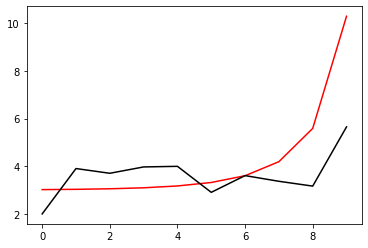

5500 0.062274541524062844
[1.86681661 3.65628305 3.5602473  3.82859542 3.88360174 2.9081379
 3.67632748 3.60513404 3.53608042 4.92654126]


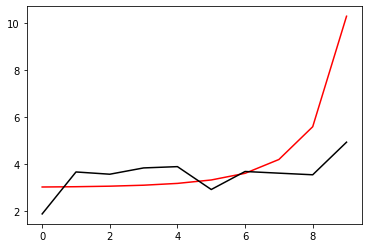

6600 0.0848003781164888
[1.75631377 3.47236136 3.4251108  3.68739424 3.74879094 2.82709627
 3.60325992 3.57596146 3.49966567 4.38961006]


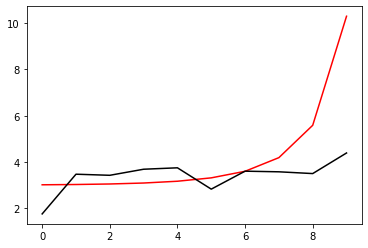

7700 0.012738586385457223
[2.01495235 3.68192458 3.6385737  3.8783868  3.91828254 2.98825154
 3.72802665 3.67213013 3.55261711 3.8925429 ]


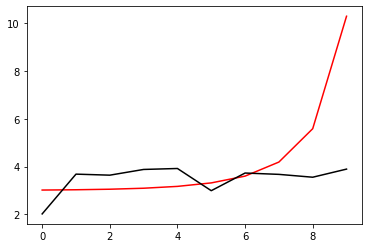

8800 0.11686496130183764
[1.87364819 3.50463485 3.48337122 3.71825789 3.75580742 2.8397727
 3.56803625 3.51461886 3.38910899 3.60686698]


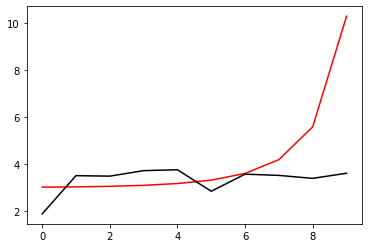

9900 0.04263661331838502
[2.14765647 3.73027293 3.71161979 3.9275718  3.94971975 3.0346005
 3.74354123 3.68626587 3.55335973 3.4942767 ]


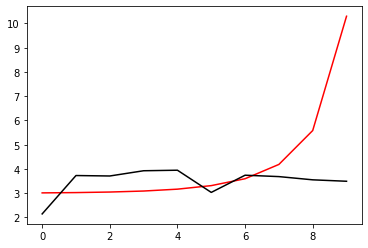

11000 0.012722382227566458
[2.09479964 3.63770068 3.65329676 3.87111846 3.89953463 3.01440883
 3.72596318 3.69820693 3.59912731 3.5711254 ]


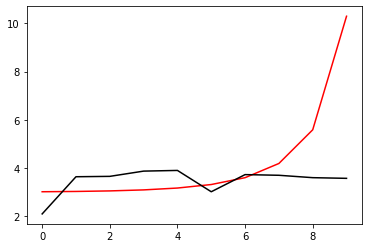

12100 0.05579904471365008
[2.17924924 3.67069869 3.72227265 3.94046037 3.97657087 3.13517498
 3.85844878 3.88548707 3.84554149 3.7646578 ]


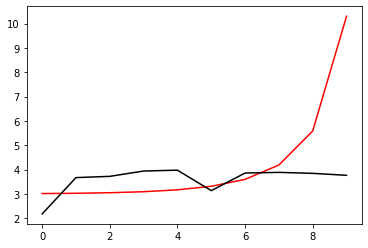

13200 0.05284443863690099
[2.08331524 3.53055283 3.57524742 3.76987888 3.78175579 2.92481763
 3.60668733 3.58927004 3.47242904 3.49557361]


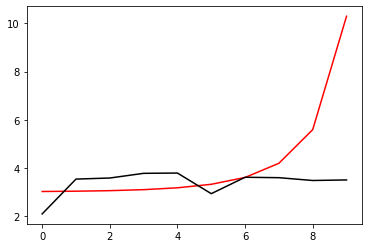

14300 0.06199236339597278
[2.15131097 3.57970967 3.64175927 3.83809805 3.85281866 3.01061782
 3.69070813 3.68369869 3.57550445 3.57263068]


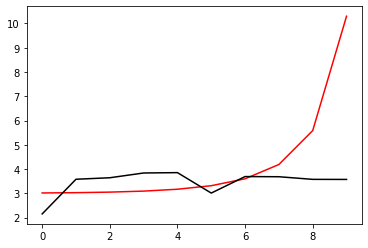

15400 0.08469996135265848
[1.91344463 3.31542235 3.40827183 3.61374845 3.64197447 2.83527805
 3.53194642 3.5681652  3.51044813 3.87080136]


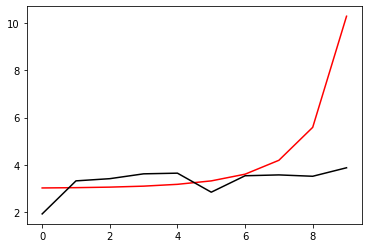

16500 0.012823957310816658
[2.13279676 3.4928849  3.57973085 3.76400372 3.77090064 2.95319071
 3.61741707 3.62665773 3.52887611 3.5016563 ]


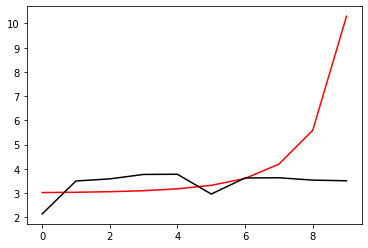

17600 0.03196159892509144
[2.12658447 3.46277541 3.58305923 3.77962185 3.80283855 3.02520878
 3.70955972 3.76991065 3.734814   3.72910478]


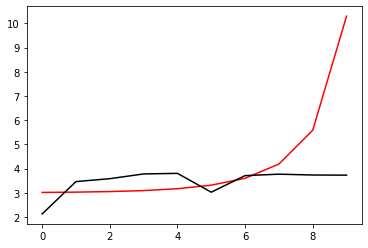

18700 0.0811205894215307
[1.95689119 3.26396457 3.40895268 3.60672162 3.62984777 2.86792768
 3.53528387 3.58871958 3.52744783 3.59743158]


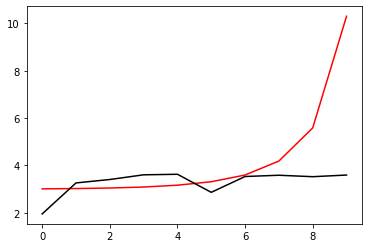

19800 0.0428097447817272
[2.18935601 3.46317516 3.59755331 3.77526616 3.77699269 2.9987162
 3.63181274 3.6492393  3.53582989 3.51226719]


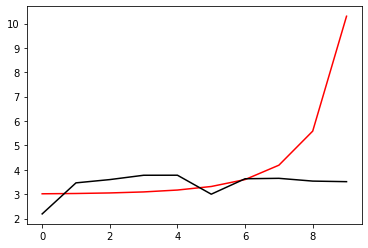

20900 0.04153914360162165
[2.28260209 3.53702714 3.68928124 3.87161131 3.87976015 3.12287629
 3.76237257 3.80404137 3.71836494 3.70702296]


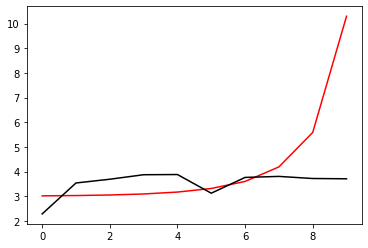

22000 0.012048986547627307
[2.25518947 3.47080408 3.62640356 3.79567981 3.79009012 3.0328746
 3.6459364  3.67016141 3.55406835 3.53135998]


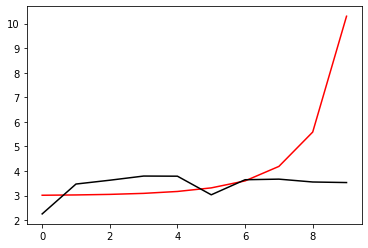

23100 0.05926028489030931
[2.24763052 3.44404779 3.63263408 3.81845646 3.8332064  3.12104621
 3.76060869 3.84431705 3.79976036 3.7675542 ]


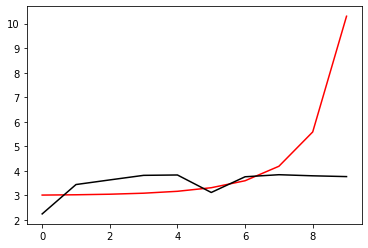

24200 0.03222058072341015
[2.28506895 3.43856522 3.66512649 3.86547113 3.90100314 3.24957701
 3.92083698 4.08678255 4.13356732 4.16042576]


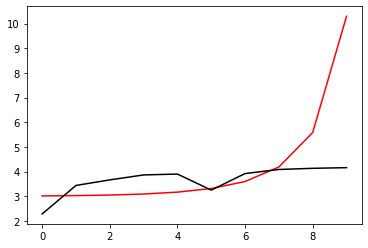

25300 0.06109783883953622
[2.27973846 3.39089535 3.60355155 3.78070641 3.791319   3.12097395
 3.7498275  3.86730338 3.83783485 3.83402361]


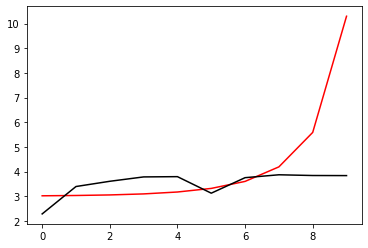

26400 0.025919266717515654
[2.17641409 3.27147564 3.50155333 3.68686786 3.70772266 3.06362564
 3.70575518 3.85761612 3.87112136 4.06441576]


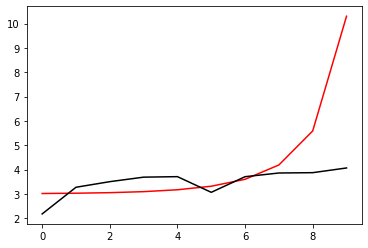

27500 0.011544516602867035
[2.28192652 3.33420664 3.55161119 3.7140436  3.7105118  3.05310113
 3.65580629 3.77226511 3.73104577 3.82616902]


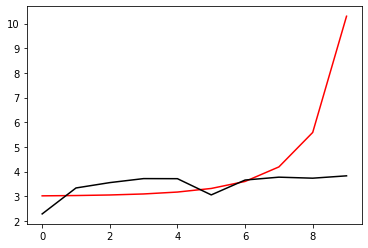

28600 0.03125053305093036
[2.25613813 3.29522564 3.53328    3.70825238 3.72031108 3.09838436
 3.7245637  3.89448171 3.92237056 3.91258994]


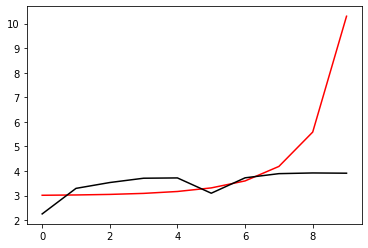

29700 0.001429362982647817
[2.34798521 3.36210733 3.62772162 3.81828841 3.85042606 3.27939343
 3.9357916  4.17731034 4.28456705 4.26494581]


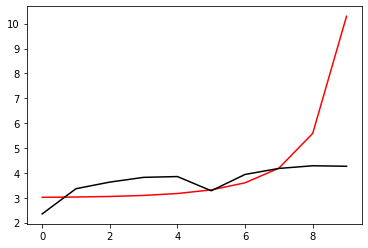

30800 0.1019321140072577
[2.16884654 3.15213616 3.43555434 3.63046541 3.66666552 3.12142541
 3.77163158 4.02564286 4.12719386 4.15649953]


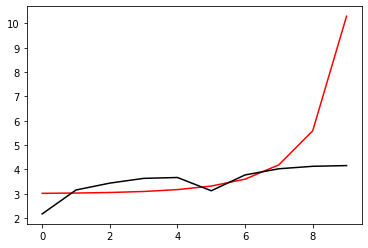

31900 0.039210253247853065
[2.36080798 3.32822537 3.6260356  3.82666709 3.86791226 3.34180173
 3.99082729 4.2596905  4.3756469  4.31510166]


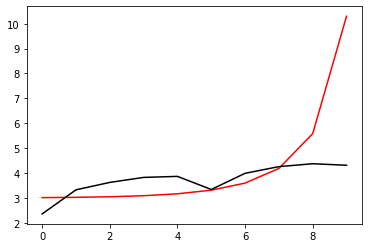

33000 0.04506936917028869
[2.16791783 3.11479779 3.41283195 3.60664707 3.63818052 3.10758114
 3.73060837 3.9722313  4.04425269 4.05279744]


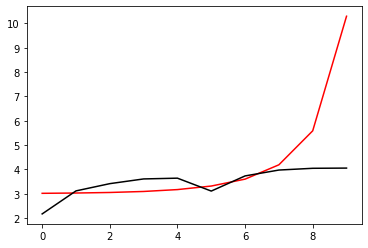

34100 0.05820073491405081
[2.33102131 3.25726851 3.54905177 3.73300923 3.75389291 3.21767247
 3.82272305 4.04819575 4.09602558 4.07677834]


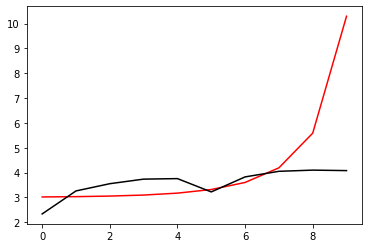

35200 0.03147683354525878
[2.41093761 3.32333906 3.62492268 3.81351977 3.83970395 3.3209543
 3.93110663 4.17713524 4.24923113 4.2464954 ]


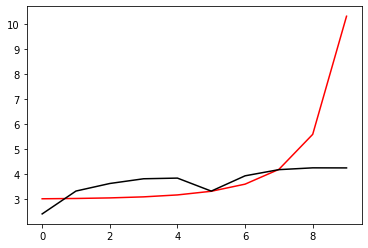

36300 0.05139158180333153
[2.32099332 3.2052317  3.49918421 3.67622629 3.69095105 3.16962407
 3.76312596 3.99977494 4.05738516 4.04729767]


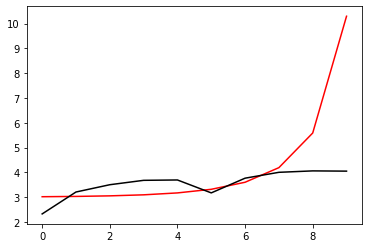

37400 0.01991787275270473
[2.30472527 3.18063434 3.49512532 3.68735302 3.71881154 3.230999
 3.84523297 4.12773874 4.24535454 4.20537008]


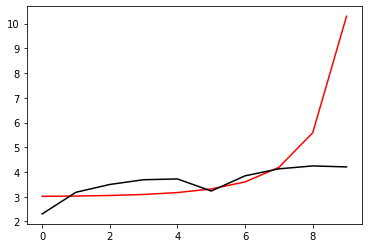

38500 0.11557061923613676
[2.12932669 2.98957011 3.32116512 3.52056417 3.55527542 3.08265142
 3.68010305 3.95251073 4.04306787 4.31331157]


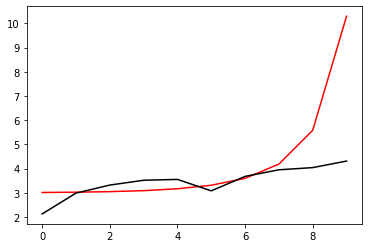

39600 0.03053271864107919
[2.34749566 3.18081397 3.49586854 3.67677882 3.69157622 3.20056503
 3.76526092 3.99738026 4.03091953 4.02565022]


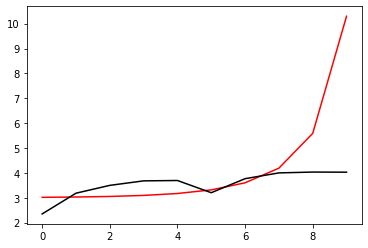

40700 0.001363834017573498
[2.43688085 3.26152419 3.58359336 3.76900179 3.78890562 3.31202614
 3.88165986 4.12872497 4.17440691 4.14120478]


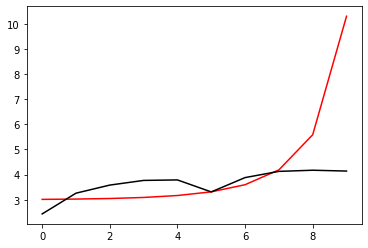

41800 0.10972308594718047
[2.23664118 3.04699274 3.37344681 3.55959234 3.5797711  3.1122222
 3.67750645 3.92960982 3.97605864 3.97828213]


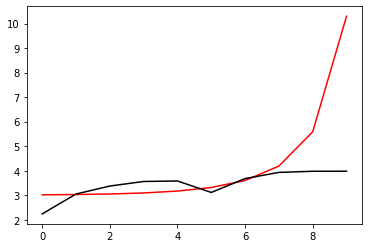

42900 0.05037800110713065
[2.39266611 3.18418263 3.51062756 3.69423513 3.71233886 3.25286803
 3.81383879 4.07313456 4.12713223 4.11819081]


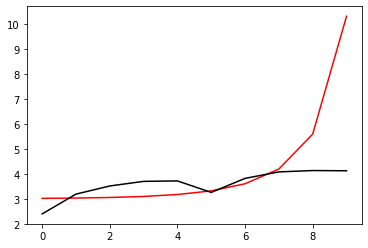

44000 0.010942799561149191
[2.47541535 3.25150202 3.59226874 3.78627499 3.8159561  3.38588444
 3.9597751  4.25700539 4.35937342 4.36883663]


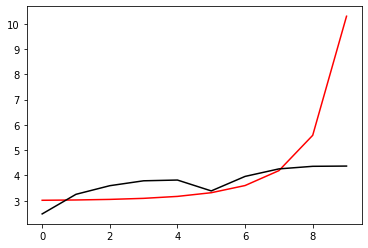

45100 0.05896478808398144
[2.39375853 3.1390811  3.46886049 3.64953294 3.66532474 3.22931659
 3.77993614 4.05704567 4.12580866 4.11546516]


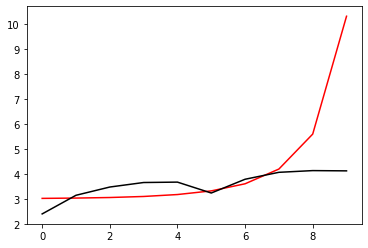

46200 0.03965367691592104
[2.43556642 3.17545658 3.5162718  3.70568044 3.73030664 3.31274168
 3.87083116 4.16852224 4.26247396 4.24758882]


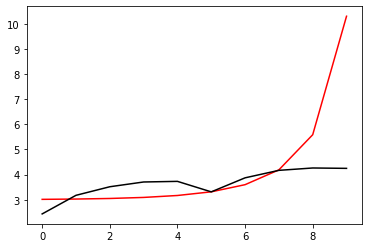

47300 0.347118889497282
[2.58059468 3.31079878 3.66932059 3.87414976 3.91557487 3.53150708
 4.10736311 4.44507016 4.58620781 4.44614129]


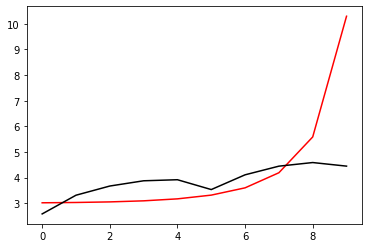

48400 0.020238164459749845
[2.412971   3.11015638 3.44609727 3.62678607 3.6421232  3.23332655
 3.76945568 4.0616793  4.14145287 4.13456015]


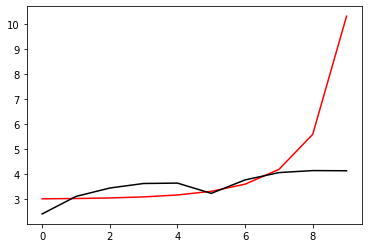

49500 0.010613376394389825
[2.46630568 3.15546726 3.49828984 3.68427959 3.70492455 3.30990662
 3.84917967 4.15562268 4.25271081 4.25120112]


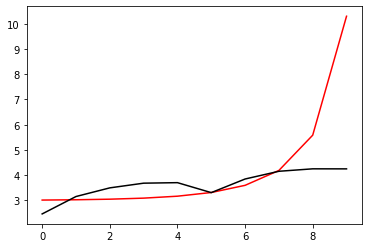

50600 0.08312538504308067
[2.22394204 2.9018544  3.25123859 3.44181905 3.46639024 3.08399369
 3.62066729 3.93325166 4.03315287 4.13417968]


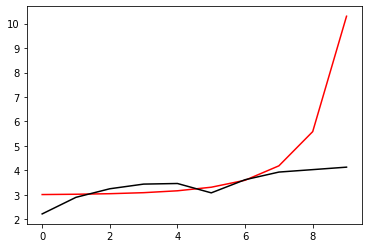

51700 0.010602408224511653
[2.44636611 3.09621632 3.42663371 3.59790501 3.6023668  3.20195276
 3.70934246 3.98922341 4.0443547  4.04075183]


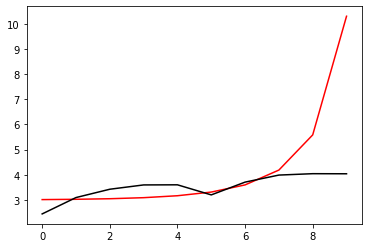

52800 0.030761205636930085
[2.5534095  3.19626526 3.53228731 3.70833345 3.71782507 3.33003214
 3.84129713 4.13513581 4.20738145 4.20503276]


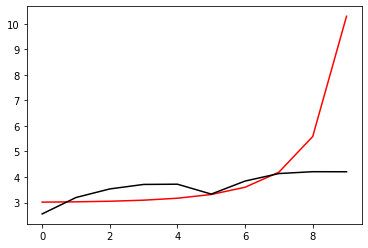

53900 0.0959364428937039
[2.37912928 3.00660877 3.34006691 3.5125651  3.51793986 3.13196885
 3.63261372 3.92015824 3.98022126 3.95171029]


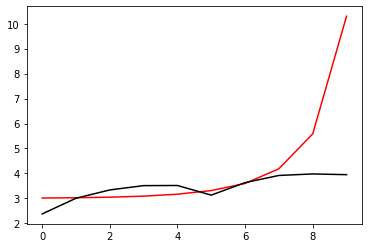

55000 0.010518344895702263
[2.59456029 3.20298441 3.52845822 3.69261668 3.68952187 3.3010628
 3.78804485 4.06649366 4.11240439 4.11094416]


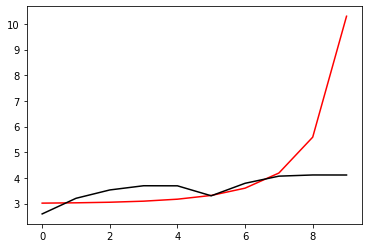

56100 0.05651855658916503
[2.51770421 3.12975807 3.4740137  3.65690255 3.67358025 3.31599177
 3.82375831 4.13959836 4.23133974 4.19148334]


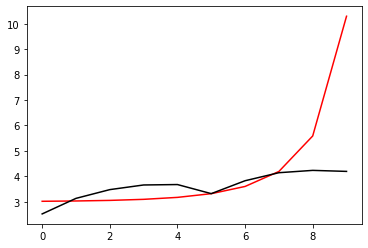

57200 0.032272213893421886
[2.57119461 3.18256991 3.5486477  3.7548166  3.79818386 3.48650456
 4.02985147 4.41128465 4.58442958 4.51785477]


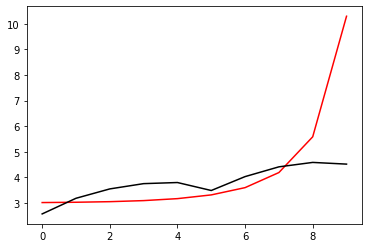

58300 0.05064495658788064
[2.44721625 3.04208279 3.39750363 3.58989402 3.61376542 3.27660555
 3.76764495 4.06924413 4.12405603 4.10716821]


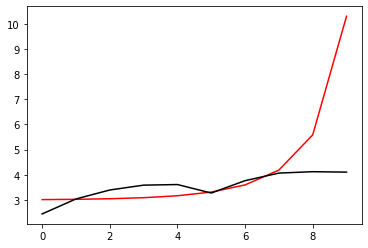

59400 0.011394120563339013
[2.51324518 3.10493768 3.46548297 3.66356295 3.69421846 3.3707128
 3.8699197  4.18675373 4.25055428 4.23019893]


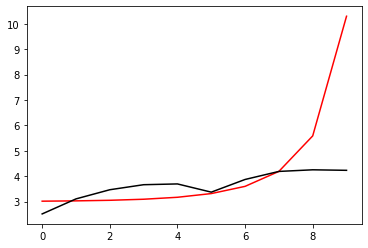

60500 0.1228267010972064
[2.24399072 2.83111779 3.19885961 3.4049298  3.44503603 3.14064732
 3.65190927 3.99249245 4.07478013 4.24160178]


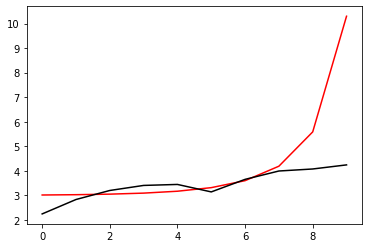

61600 0.03061276040241959
[2.47774393 3.04132996 3.39303232 3.58283331 3.60551364 3.28574987
 3.7691488  4.07829284 4.11587081 4.10379078]


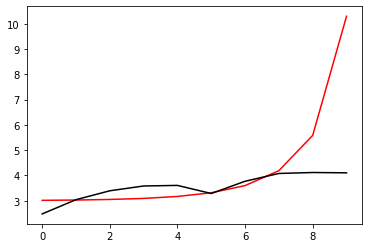

62700 0.0007071652532155496
[2.58153763 3.14152358 3.50113491 3.69977906 3.73265875 3.43263731
 3.92837649 4.26432202 4.33573708 4.29384373]


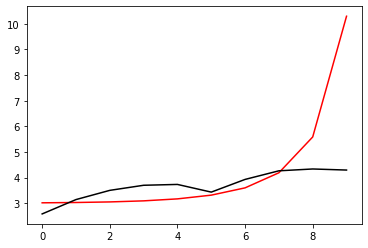

63800 0.11330327168223117
[2.34215293 2.89202657 3.25238729 3.45171333 3.48437088 3.18905436
 3.67539188 4.00415959 4.05879634 4.07662282]


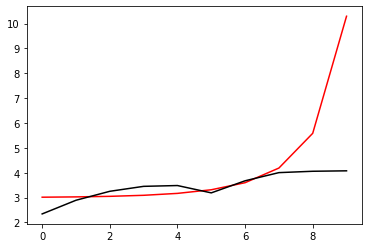

64900 0.0503648312890679
[2.52453833 3.05381269 3.4008691  3.58806459 3.60903705 3.3054099
 3.77612916 4.0905145  4.12604017 4.11757162]


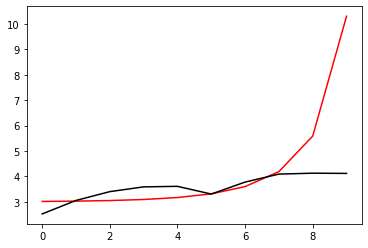

66000 0.010441920881314178
[2.61709038 3.14070008 3.49166604 3.68344728 3.70953229 3.41780889
 3.89248029 4.2203738  4.27326358 4.27369146]


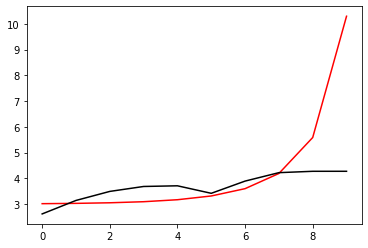

67100 0.06025629876663376
[2.49137768 2.99456452 3.33366689 3.5145438  3.52976817 3.23112149
 3.68855481 3.99988847 4.02765552 4.02580789]


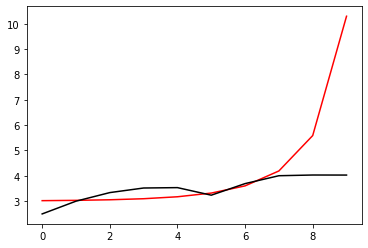

68200 0.03098939725856049
[2.65935043 3.15293586 3.49087895 3.67202189 3.68869355 3.39831193
 3.85755262 4.18014668 4.22344441 4.21028939]


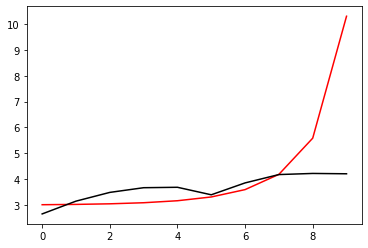

69300 0.05883033727717274
[2.59134815 3.09244951 3.44798046 3.64765765 3.68342729 3.42035375
 3.89699014 4.24934796 4.32809611 4.31669645]


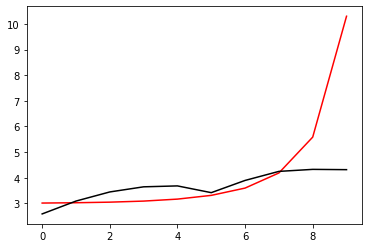

70400 0.08429300406518646
[2.30918124 2.81985481 3.20041271 3.42895352 3.49766855 3.28342548
 3.80267992 4.22362244 4.38648027 4.78791464]


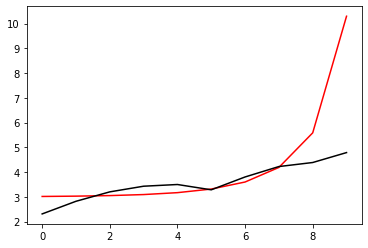

71500 0.010362278125648303
[2.57750003 3.05831005 3.41609444 3.62204841 3.66678982 3.43060354
 3.91384869 4.29601545 4.40867303 4.39531477]


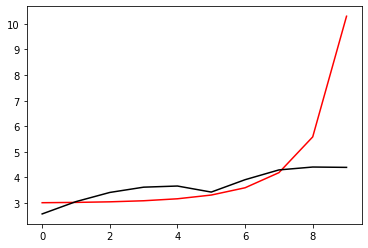

72600 0.0822992734804881
[2.33475379 2.81133349 3.17285913 3.38310168 3.43136234 3.20275068
 3.68060763 4.05950294 4.16213165 4.26411942]


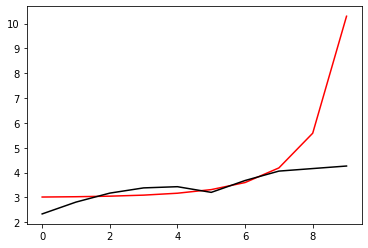

73700 0.010355480673135567
[2.54203215 2.99504442 3.3387089  3.53262974 3.56490015 3.32225673
 3.77859356 4.13416957 4.20579394 4.20277639]


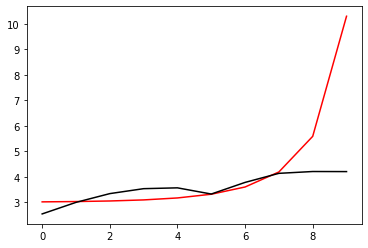

74800 0.030457263788584005
[2.64630497 3.09624495 3.44338369 3.64210176 3.68003753 3.44867968
 3.91045917 4.27965355 4.368576   4.36648607]


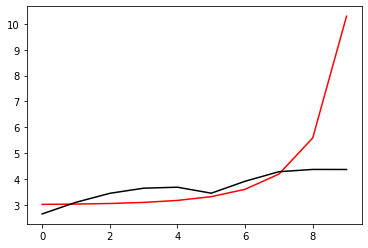

75900 0.09871991018009506
[2.46851846 2.90699518 3.24929553 3.44412164 3.47787416 3.24555182
 3.69598433 4.05452856 4.12533876 4.10703605]


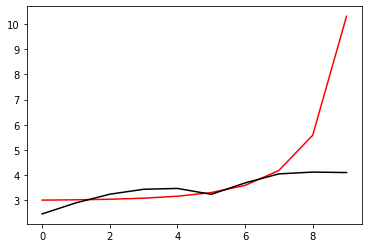

77000 0.010311105008773032
[2.68382078 3.10576748 3.43781587 3.62444828 3.65121398 3.41673239
 3.8584471  4.21277225 4.27763664 4.27346992]


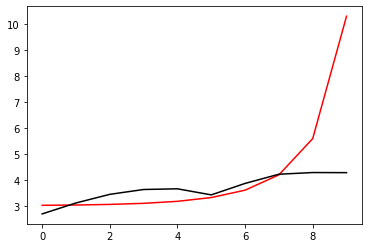

78100 0.054580155996722494
[2.60431271 3.0357604  3.38518695 3.59190032 3.64127277 3.43884741
 3.90865211 4.30791589 4.43073723 4.3790239 ]


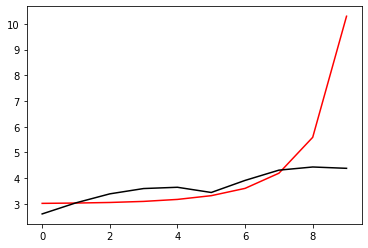

79200 0.030613439809270847
[2.63550713 3.07176889 3.43839099 3.66706888 3.74289779 3.58190106
 4.08772899 4.54837521 4.74902591 4.76068134]


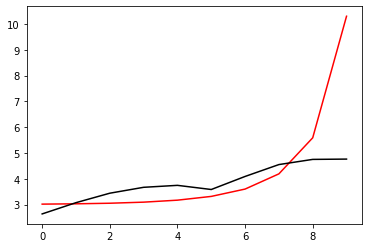

80300 0.05983341947702232
[2.58525378 2.99950506 3.34906528 3.56067746 3.61709628 3.43535234
 3.90419394 4.31691919 4.44765107 4.44330993]


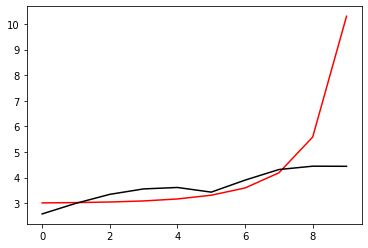

81400 0.08966281131491921
[2.36185769 2.7789235  3.13780839 3.36137489 3.43199684 3.27202434
 3.75843025 4.20075806 4.36873631 4.70043925]


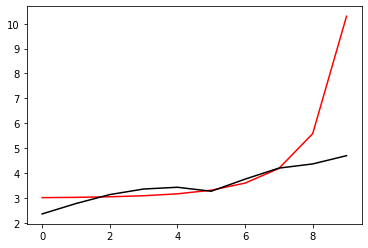

82500 0.010330803238572125
[2.59045726 2.98583989 3.32685077 3.53279078 3.58435543 3.40542856
 3.86014311 4.26411888 4.3776416  4.3727716 ]


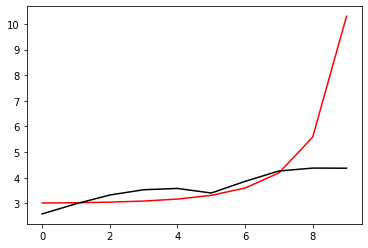

83600 0.08129660080718057
[2.39452232 2.79089371 3.13839468 3.35290168 3.41444293 3.25128301
 3.71599503 4.13835129 4.27381453 4.32665283]


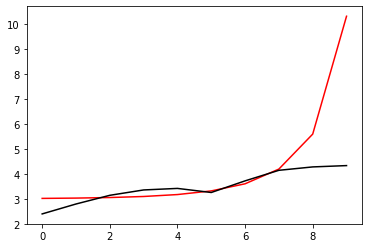

84700 0.01023308861596935
[2.59099564 2.97134534 3.30745959 3.51215501 3.56434491 3.39501571
 3.84541236 4.25473243 4.3720548  4.36893098]


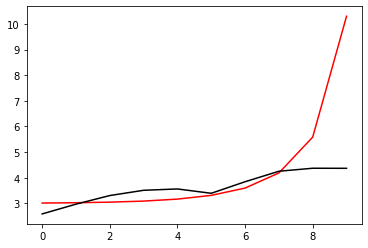

85800 0.0341669580552564
[2.60101355 2.98878103 3.33936975 3.56181058 3.63469261 3.49585126
 3.97314513 4.42788074 4.60680063 4.57179306]


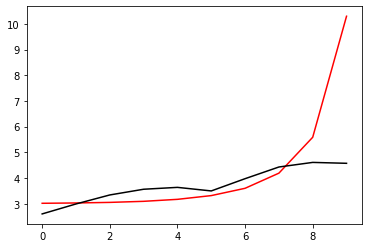

86900 0.09189848367608285
[2.48875133 2.86962428 3.21899227 3.44188432 3.5154696  3.38128265
 3.85264267 4.30344609 4.47068249 4.45721941]


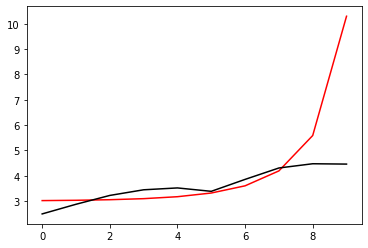

88000 0.010279539399693368
[2.67635814 3.0466597  3.39016266 3.60921851 3.68005671 3.54728371
 4.01363596 4.46383221 4.63026998 4.62792042]


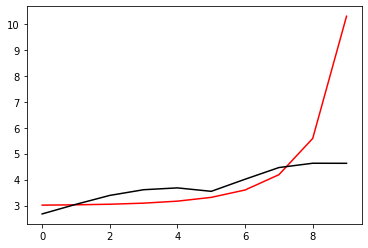

89100 0.05693271625064131
[2.60534532 2.95900698 3.29091742 3.50078729 3.56378125 3.42727663
 3.88245184 4.32345671 4.47506945 4.46964816]


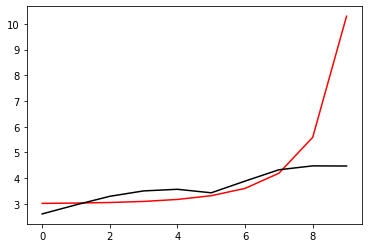

90200 0.030543573459447703
[2.70336468 3.05772219 3.39555192 3.61425556 3.68859809 3.57118266
 4.04169618 4.51194563 4.70453911 4.69919758]


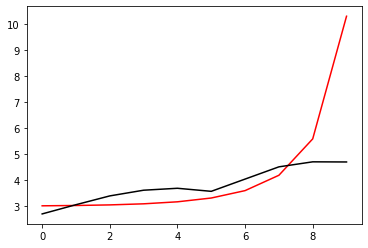

91300 0.05037972472608424
[2.60127013 2.93457924 3.25495192 3.45702975 3.51334156 3.37574102
 3.8135691  4.23949214 4.36795037 4.36472206]


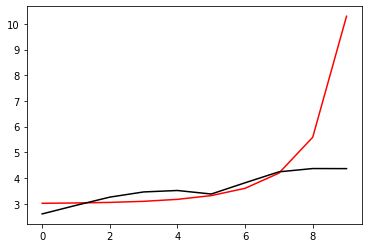

92400 0.011154514273660508
[2.6702343  3.00332662 3.32673856 3.53366386 3.59620518 3.46902174
 3.91436475 4.35435677 4.50075725 4.48467904]


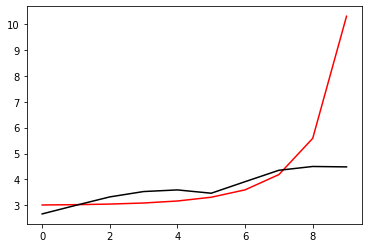

93500 0.12322185352065076
[2.40325262 2.73589142 3.06338373 3.27679683 3.34742992 3.23350981
 3.68693964 4.1423676  4.30701048 4.48083028]


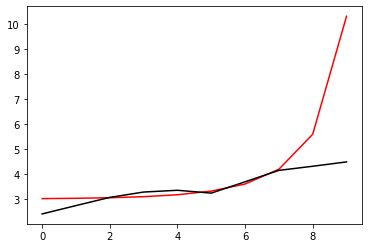

94600 0.029973459495483776
[2.63478919 2.94736547 3.25818807 3.45632145 3.51146743 3.3823361
 3.81151298 4.23751784 4.36103533 4.34683276]


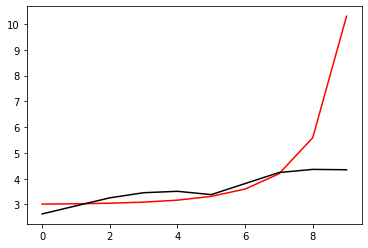

95700 0.007987467000212039
[2.66816919 2.98654048 3.30695854 3.5172627  3.58697069 3.47918394
 3.92806514 4.38701461 4.55565972 4.5429947 ]


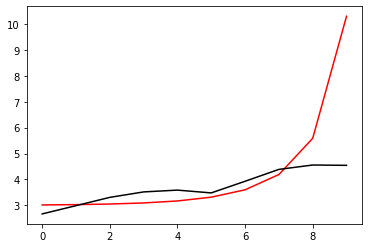

96800 0.11132546216862313
[2.4859076  2.80277424 3.12472326 3.3373422  3.40844146 3.30260031
 3.74194805 4.1873509  4.33053796 4.34506949]


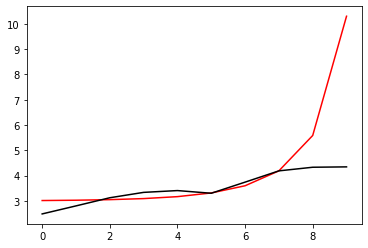

97900 0.050181704189737886
[2.65119132 2.95098922 3.25963297 3.46142456 3.52323621 3.41062113
 3.83951967 4.27533949 4.40627232 4.39790544]


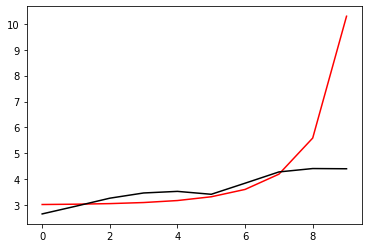

99000 0.010217074751129677
[2.7465614  3.04514914 3.35566079 3.5613177  3.62839682 3.52525494
 3.95971336 4.40742826 4.55361827 4.5539063 ]


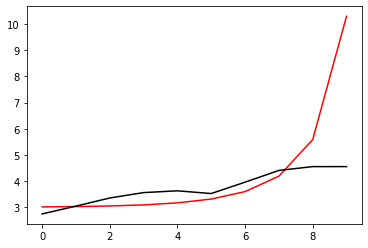

100100 0.057817779693672966
[2.67009874 2.9524431  3.25055118 3.4463621  3.50512454 3.39718026
 3.82068821 4.25929183 4.39209445 4.37623983]


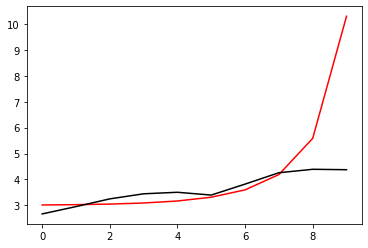

101200 0.03057679777649545
[2.76954484 3.05400476 3.35764171 3.56176852 3.63123037 3.54029414
 3.9776334  4.44135844 4.60892232 4.60325503]


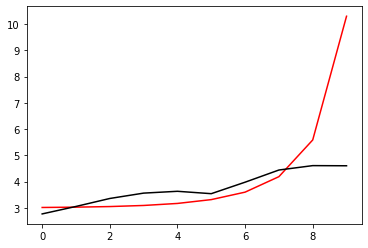

102300 0.058844397249714006
[2.68754056 2.95244586 3.23972788 3.42912636 3.48364382 3.37740412
 3.78910711 4.21937895 4.33720342 4.32294815]


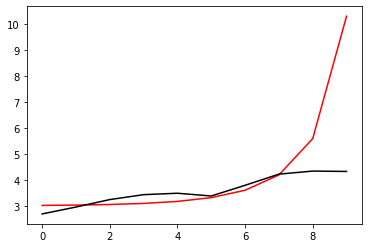

103400 0.020456463362520935
[2.6236454  2.90199693 3.2050383  3.41239096 3.48691308 3.40623601
 3.84191562 4.3074581  4.4714928  4.59358967]


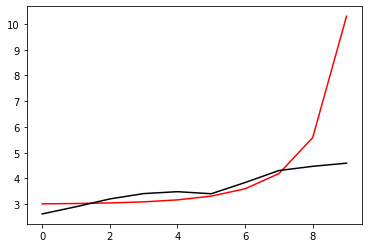

104500 0.010188213621310055
[2.7061413  2.98802678 3.29924872 3.51922168 3.61076103 3.55640776
 4.01796136 4.52654807 4.74928106 4.75198262]


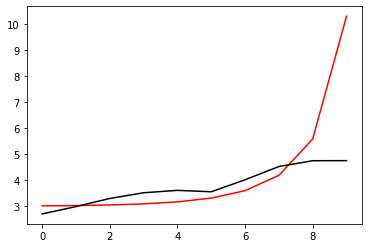

105600 0.0808717098155512
[2.46758676 2.75300673 3.07231652 3.30383388 3.40917268 3.37481549
 3.84804138 4.37674509 4.62155187 4.70852709]


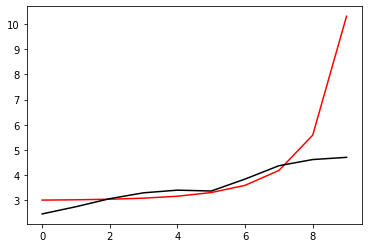

106700 0.0004592684934859983
[2.74437535 3.00861255 3.31001412 3.52620294 3.61778597 3.57280044
 4.02940536 4.5434109  4.7717739  4.72308434]


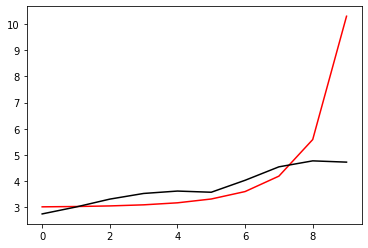

107800 0.11084632463076309
[2.52247293 2.78369027 3.08386127 3.29949216 3.38941829 3.34182493
 3.78386052 4.27604939 4.46925004 4.48127882]


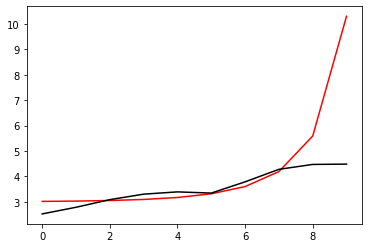

108900 0.05007715723641226
[2.694311   2.93834655 3.22466666 3.42922191 3.51000819 3.4559524
 3.88826958 4.37165042 4.55338689 4.54423449]


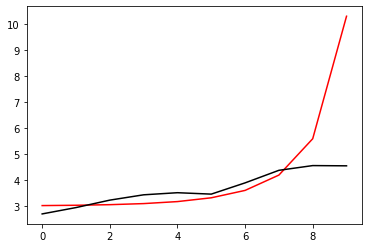

110000 0.010185001923257718
[2.77958006 3.02393159 3.31280993 3.52233281 3.6101817  3.56789646
 4.00935671 4.50938428 4.71236246 4.7126991 ]


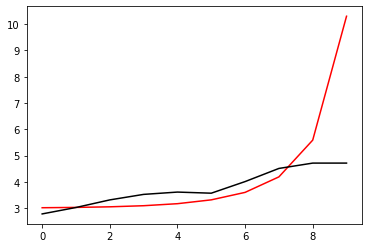

111100 0.05816014994253087
[2.68820682 2.91207349 3.18370276 3.37819418 3.45153766 3.39500909
 3.81322989 4.28330353 4.44121247 4.44070462]


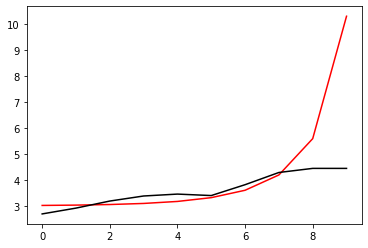

112200 0.038563188240015984
[2.75085939 2.98019083 3.258833   3.46249366 3.5472361  3.50679552
 3.94090399 4.43585364 4.62710363 4.61259947]


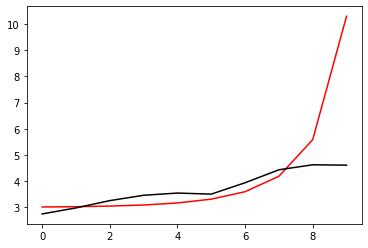

113300 0.2592290860302785
[2.85687329 3.09971035 3.39438253 3.61760483 3.72575194 3.71664743
 4.18263515 4.72441207 4.97484742 4.85519736]


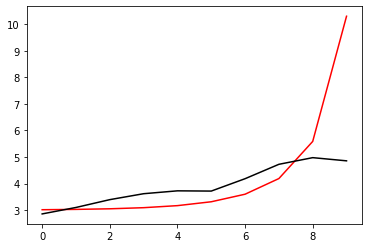

114400 0.020283171204690267
[2.67858951 2.89849362 3.17170911 3.37335055 3.45737516 3.41910144
 3.84185556 4.32318026 4.49035765 4.48828127]


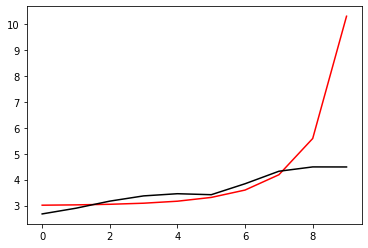

115500 0.010141048346594185
[2.75031964 2.97134404 3.24717413 3.45340649 3.54396239 3.51592251
 3.94811586 4.44429479 4.62844943 4.62335037]


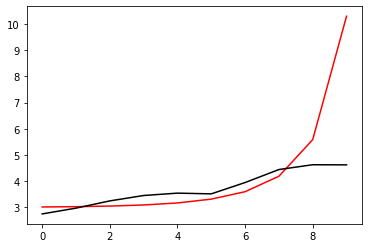

116600 0.08010172564759181
[2.55054075 2.77652294 3.05874331 3.27338042 3.37413484 3.36032807
 3.80413684 4.31869795 4.52528172 4.53725266]


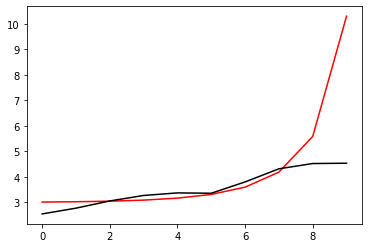

117700 0.0004132934973999852
[2.79409151 3.0101183  3.28372178 3.49136117 3.58584388 3.56742952
 3.99865625 4.4982808  4.68037197 4.63001596]


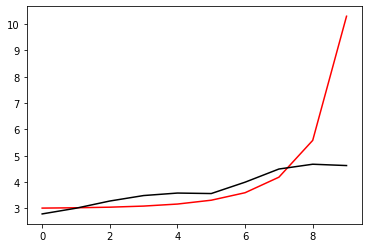

118800 0.10976184616741066
[2.56381624 2.77878795 3.05262658 3.26164226 3.35733609 3.34023975
 3.7631877  4.24973838 4.40715326 4.41870717]


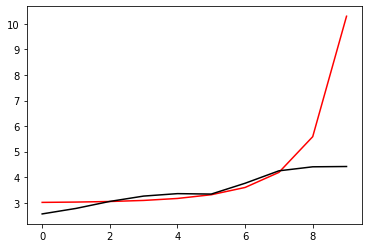

119900 0.050096633393258594
[2.72690247 2.92616166 3.18717409 3.38621675 3.47414698 3.45202473
 3.8677119  4.34834716 4.49806147 4.48853075]


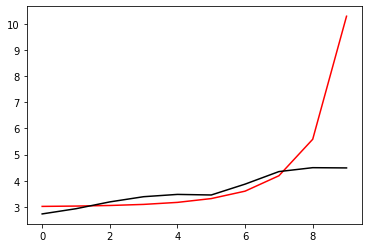

121000 0.010155884828591106
[2.82032797 3.02040881 3.28360461 3.48709983 3.58161688 3.57023457
 3.9945982  4.4905215  4.65986069 4.66024145]


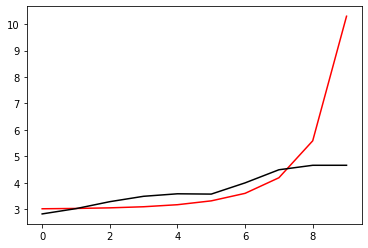

122100 0.057581751084923846
[2.73525606 2.9208549  3.1718827  3.36580574 3.45250324 3.43564094
 3.84928473 4.3339425  4.48559326 4.46056207]


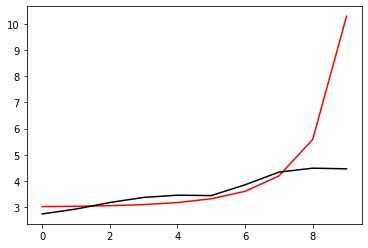

123200 0.030549023204022634
[2.8380114  3.02675367 3.2821925  3.48311143 3.57953152 3.57753207
 4.00541305 4.51413901 4.69995708 4.68916376]


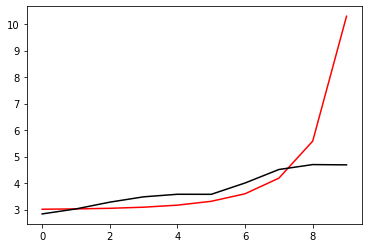

124300 0.050423296911071794
[2.70908156 2.89298021 3.14464742 3.34355525 3.43904964 3.43800634
 3.86071479 4.36417481 4.54028577 4.52351626]


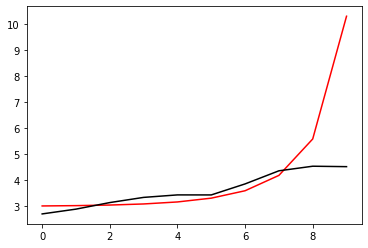

125400 0.062344297739889865
[2.57156022 2.77183929 3.04222215 3.26439778 3.38866455 3.42617387
 3.89135993 4.45809    4.72073419 4.89996055]


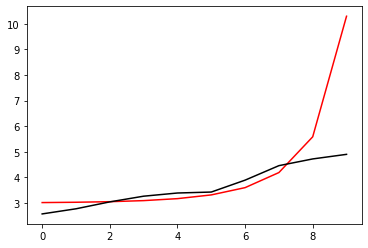

126500 0.010144422486766802
[2.74225229 2.94148293 3.21471678 3.44600364 3.58720949 3.65466344
 4.15731586 4.78547978 5.12245448 5.11095215]


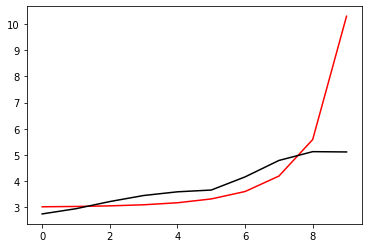

127600 0.0801229448394148
[2.52902723 2.73666492 3.01929815 3.26201196 3.4160353  3.49941292
 4.00798049 4.64079544 4.96537222 5.06970921]


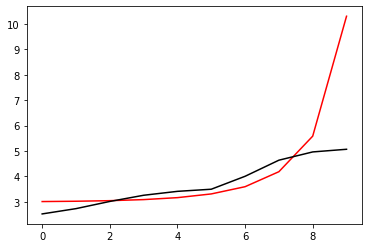

128700 0.0013621477552043701
[2.74724291 2.9412134  3.21219732 3.4458055  3.59295224 3.67236825
 4.17363695 4.80007791 5.11552543 5.07445382]


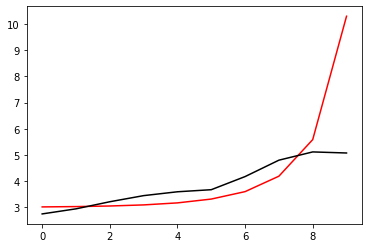

129800 0.10570687257939583
[2.58153855 2.77501413 3.04583261 3.28001458 3.42763583 3.50723692
 3.99933335 4.60924976 4.8928173  4.90624308]


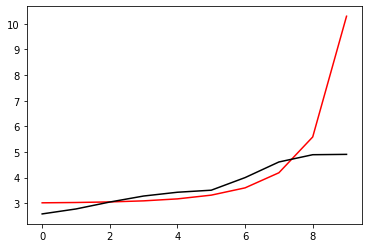

130900 0.03869902486948323
[2.78787117 2.97430007 3.2395391  3.47064277 3.61784851 3.70120923
 4.19545587 4.81228213 5.10278534 5.08703846]


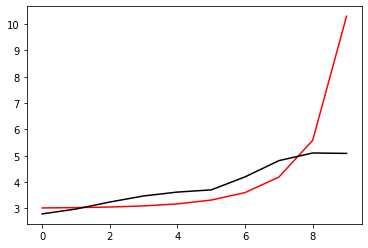

132000 0.014288862006596587
[2.70376721 2.88361253 3.14208522 3.36571462 3.50255705 3.56960884
 4.02815019 4.58189278 4.77154792 4.74856367]


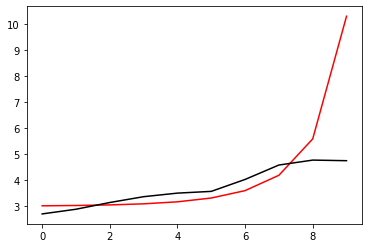

133100 0.049529681839343774
[2.73218876 2.91501104 3.17789528 3.40881012 3.55699851 3.64256828
 4.12591027 4.71942365 4.95445518 4.88870485]


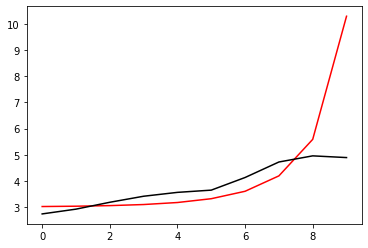

134200 0.03032112483155264
[2.79384863 2.9785475  3.24490078 3.48258973 3.64172116 3.74547509
 4.24882703 4.87387045 5.14026161 5.14146372]


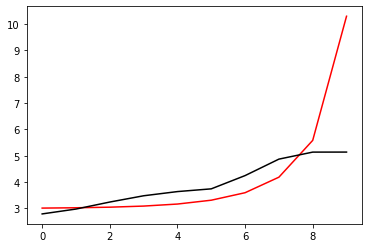

135300 0.05927337011703867
[2.72970212 2.9056115  3.16279795 3.38938299 3.53225483 3.60891593
 4.05835489 4.58338007 4.69808521 4.69127674]


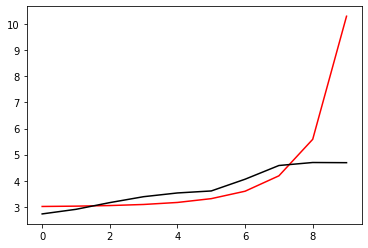

136400 0.019788804752257493
[2.80250136 2.98074023 3.24222375 3.47651259 3.63203891 3.72962722
 4.2088061  4.77270886 4.90746303 4.86701923]


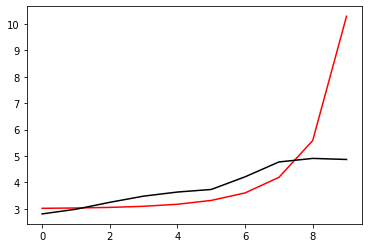

137500 0.1037348402827108
[2.55605437 2.74173897 3.01052541 3.25293171 3.41776822 3.52787617
 4.02051551 4.60907832 4.77994292 4.85147751]


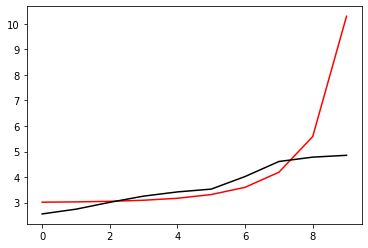

138600 0.020143976359185356
[2.7945649  2.96316225 3.21788458 3.45043754 3.610061   3.7210412
 4.21561296 4.80963685 4.97455345 4.97987739]


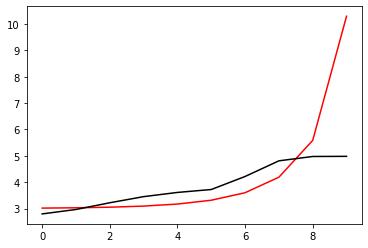

139700 0.013312189720942409
[2.67392726 2.84281043 3.09654465 3.3264884  3.47950663 3.5760859
 4.03259379 4.55394446 4.60386302 4.67189909]


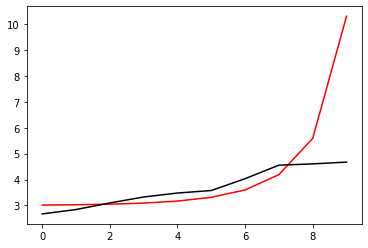

140800 0.030359731640520565
[2.79286855 2.95303935 3.20005106 3.42585989 3.5775089  3.67626768
 4.13533092 4.65850455 4.69703538 4.68227368]


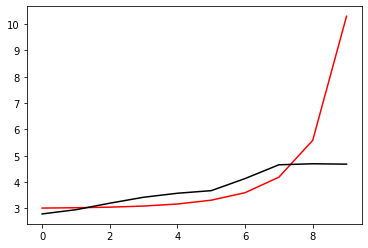

141900 0.03838119656914542
[2.80780671 2.97186408 3.22466287 3.460069   3.62685461 3.75030369
 4.24433001 4.82064724 4.90766678 4.89082271]


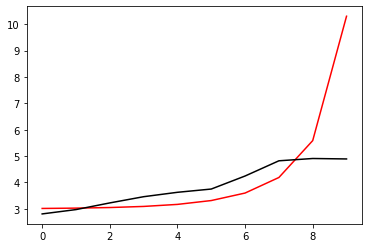

143000 0.0381772802723869
[2.64252617 2.80160155 3.04910097 3.27926446 3.44013586 3.55659821
 4.03608179 4.59038825 4.63502312 4.62780872]


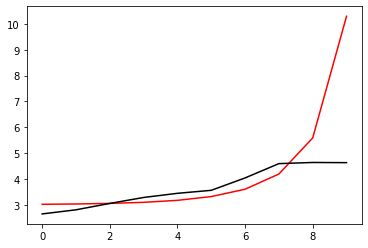

144100 0.04665656814574905
[2.838639   2.98304946 3.21808798 3.4391604  3.59447567 3.7097775
 4.18776518 4.74433718 4.78996767 4.73636034]


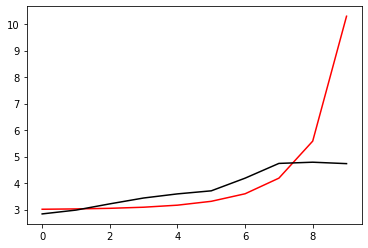

145200 0.035897491145623656
[2.79568255 2.93849345 3.17319559 3.39673416 3.55785653 3.68382327
 4.17334758 4.74957115 4.82145548 4.78339113]


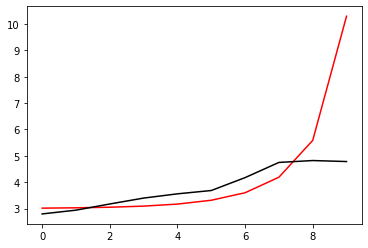

146300 0.24681822182275515
[2.87575277 3.03617218 3.28991235 3.5367608  3.72748801 3.89355936
 4.43191472 5.08049025 5.24792548 5.11616768]


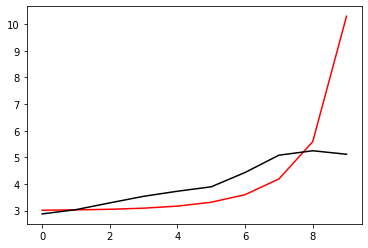

147400 0.017150187842565518
[2.72849557 2.87789565 3.11955834 3.35161291 3.52142965 3.65424021
 4.13165387 4.67305802 4.68797232 4.67463645]


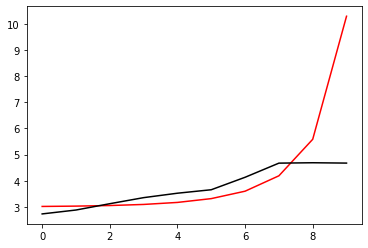

148500 0.010121527334459238
[2.76259774 2.91539042 3.16107913 3.39911804 3.57798114 3.72515007
 4.22189549 4.78899404 4.81815194 4.81651955]


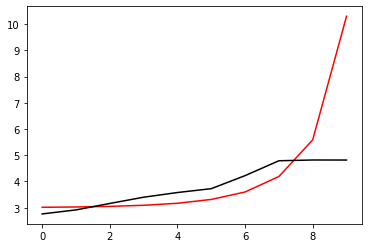

149600 0.021045894748038977
[2.72700895 2.88487331 3.13742812 3.38634544 3.58227247 3.75736676
 4.29527657 4.92621465 5.01729987 4.97680949]


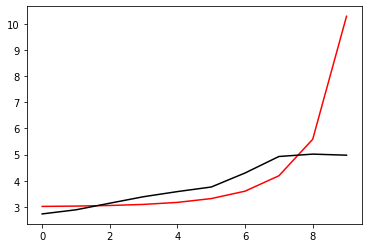

150700 0.00995484168774367
[2.70526947 2.86620622 3.12006999 3.3686057  3.5604815  3.72362087
 4.22297293 4.76199023 4.69257776 4.74562222]


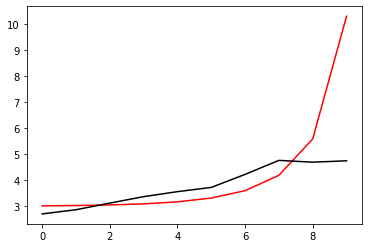

151800 0.030212310616770183
[2.7512276  2.9169023  3.17642827 3.43320711 3.6378075  3.82214208
 4.35409588 4.94299651 4.90023205 4.88456795]


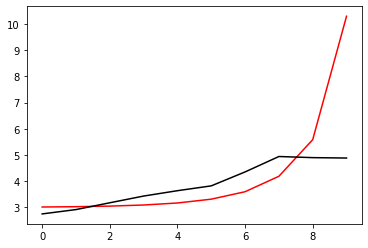

152900 0.036523554024746746
[2.7605112  2.92973337 3.19516981 3.46242899 3.68460721 3.89924297
 4.478135   5.14398972 5.16408211 5.13403372]


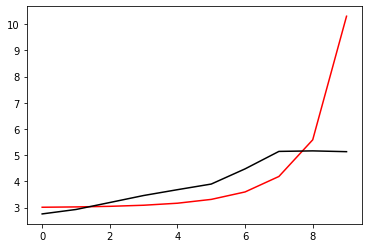

154000 0.010103280957539535
[2.72493337 2.8982477  3.16551398 3.43191329 3.64817732 3.84604895
 4.37311064 4.89843561 4.69576356 4.68718756]


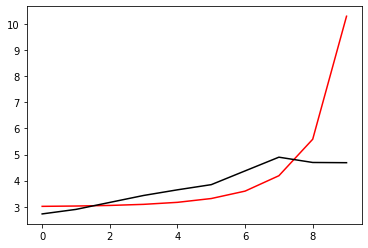

155100 0.04311358488410108
[2.73925126 2.91820708 3.19195869 3.46720949 3.69689895 3.91791525
 4.48545989 5.07377511 4.87181884 4.84110066]


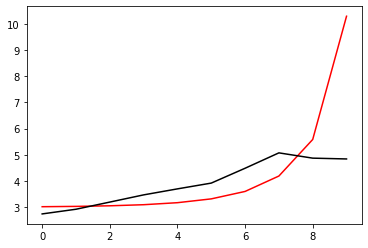

156200 0.030312460955373675
[2.74552783 2.92656419 3.20410851 3.48635037 3.72818114 3.97138392
 4.57541456 5.22341501 5.03524178 5.03394199]


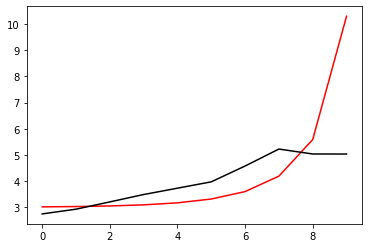

157300 0.04160975760814937
[2.80557762 2.96922207 3.23287991 3.50516049 3.74089896 3.98267105
 4.58654496 5.24073308 5.05284372 4.94538774]


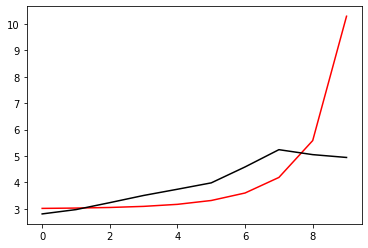

158400 0.32301889327205424
[2.40546934 2.56996859 2.83657738 3.11591776 3.3645865  3.62900944
 4.26593837 4.98119446 4.88200867 5.29255529]


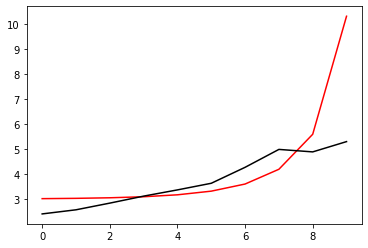

159500 0.01015399984551967
[2.69637338 2.85898387 3.12150269 3.39339896 3.62822629 3.86551919
 4.4410512  5.02108357 4.71336591 4.69812209]


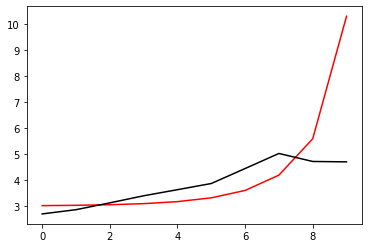

160600 0.020288298693430445
[2.76365631 2.927921   3.1940172  3.47321361 3.72144214 3.98326944
 4.59925636 5.23430394 4.9301088  4.93631971]


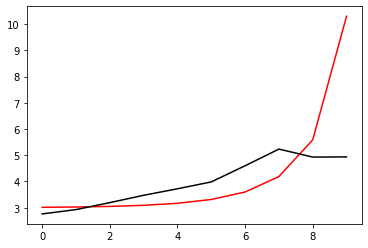

161700 0.008843860777460081
[2.69841313 2.84895711 3.1034569  3.3733885  3.61415372 3.87029174
 4.4778055  5.10941893 4.80510195 4.83604833]


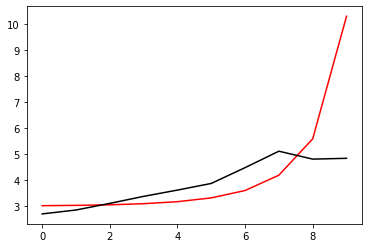

162800 0.030182305504818176
[2.74702002 2.89937418 3.15780539 3.43614772 3.69203219 3.97421211
 4.62011084 5.31535114 5.08558177 5.08067556]


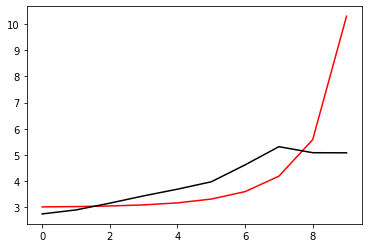

163900 0.04700983828392992
[2.72470868 2.86927946 3.11925252 3.38757063 3.6286549  3.88432317
 4.47025185 5.04442993 4.63464722 4.64209322]


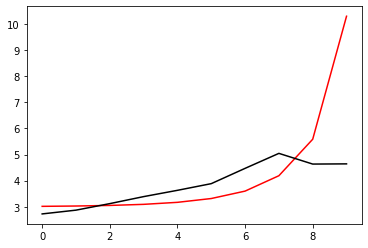

165000 0.010147900972537812
[2.76009656 2.90567508 3.1572215  3.42875933 3.6756716  3.94158289
 4.54208587 5.13652466 4.73418924 4.72859989]


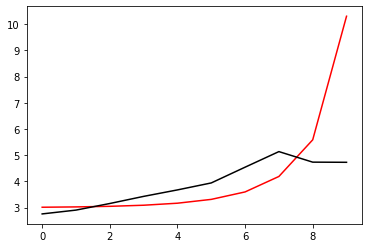

166100 0.04193921218269363
[2.77353948 2.92225893 3.17833856 3.45771766 3.71772665 4.00583291
 4.63965442 5.28492648 4.91858615 4.90610664]


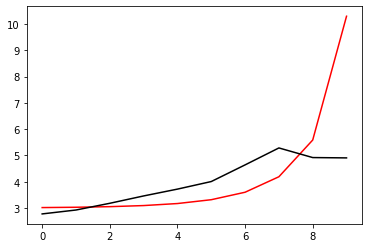

167200 0.030295888758350147
[2.78406994 2.91636189 3.15856369 3.42731631 3.67976579 3.9634321
 4.59181685 5.23673678 4.87567325 4.81529743]


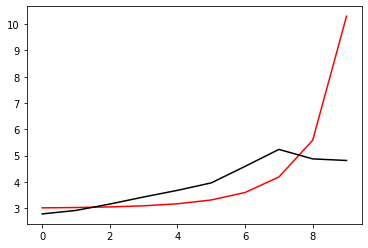

168300 0.11644808980732686
[2.83231304 2.96700817 3.21375653 3.49200948 3.76124315 4.07311862
 4.74288489 5.45840025 5.19726778 5.09635651]


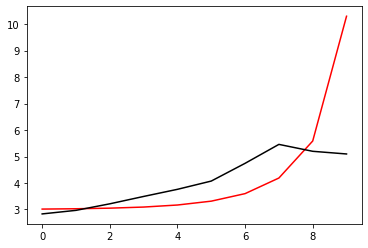

169400 0.009412483347732297
[2.75086118 2.88647244 3.1314968  3.40449286 3.6620809  3.94899439
 4.55818904 5.12421855 4.62594561 4.60514373]


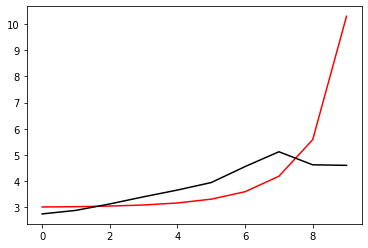

170500 0.010404636685726684
[2.7833113  2.92136843 3.17005637 3.44970502 3.71912011 4.02779225
 4.67511119 5.29730928 4.80042658 4.79909255]


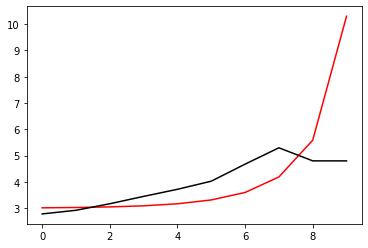

171600 0.07220647661879628
[2.58300226 2.72116518 2.97012788 3.25128623 3.52392585 3.83921539
 4.49726014 5.1501921  4.70078881 4.66164977]


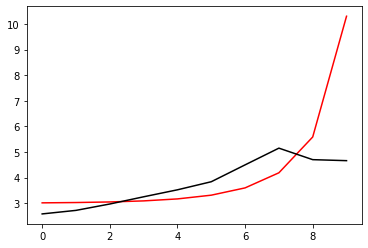

172700 0.00990035769343682
[2.72816786 2.83265278 3.05226226 3.30863584 3.55983893 3.85482054
 4.48497053 5.09830275 4.5905359  4.60519381]


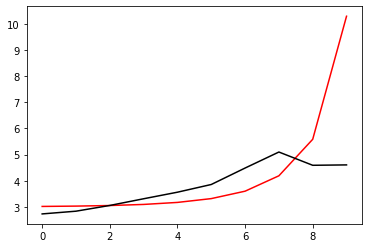

173800 0.030157547228398744
[2.78642242 2.89456024 3.11826393 3.3817539  3.64486272 3.95931277
 4.61663836 5.27723407 4.83989288 4.83845702]


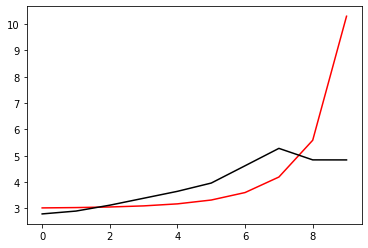

174900 0.04987731774968225
[2.74528797 2.84694289 3.06257526 3.31581731 3.56315738 3.84882075
 4.44369158 4.98638158 4.38835351 4.42784545]


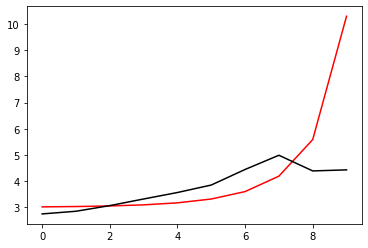

176000 0.01012504134043174
[2.79687858 2.90181528 3.12099904 3.37961687 3.63562754 3.9356556
 4.55184643 5.12273678 4.53646941 4.52588662]


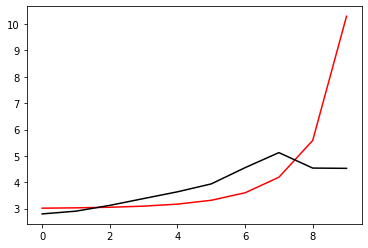

177100 0.04248720985081864
[2.8177741  2.92672973 3.15093223 3.41780427 3.6873922  4.00993172
 4.65994012 5.28045582 4.73103351 4.7151609 ]


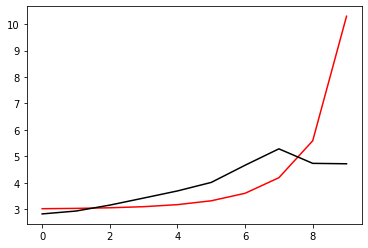

178200 0.030405650980503816
[2.83443822 2.92196672 3.12655384 3.37638134 3.63088698 3.93907814
 4.56999136 5.16932245 4.59827281 4.55630523]


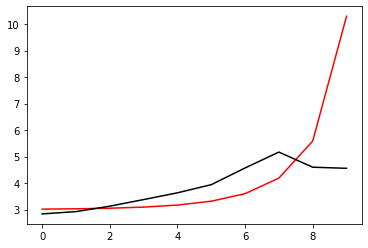

179300 0.12869677901791926
[2.8747874  2.97209084 3.18769675 3.45331073 3.73140789 4.0758461
 4.75923874 5.44196854 4.97561596 4.86444107]


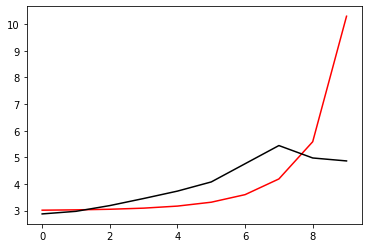

180400 0.009721907668549969
[2.79488741 2.89363021 3.10808671 3.36924045 3.63692645 3.95846592
 4.58605038 5.13027778 4.43422399 4.39383377]


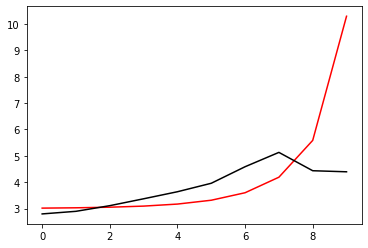

181500 0.01036926612018208
[2.82077014 2.92287694 3.14156566 3.40975527 3.68951693 4.03262965
 4.69744179 5.29616532 4.61036418 4.60592012]


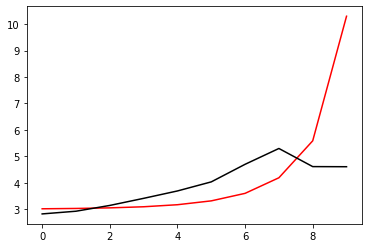

182600 0.07706525570732896
[2.59462773 2.69864206 2.91873198 3.18909768 3.47238385 3.82179175
 4.49677503 5.12342773 4.48265495 4.46952735]


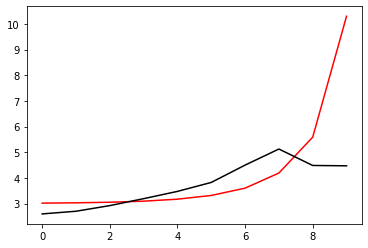

183700 0.00024042059246890822
[2.80739745 2.89752583 3.10547706 3.3674125  3.64695654 3.99822649
 4.6774003  5.31195725 4.66888355 4.60327009]


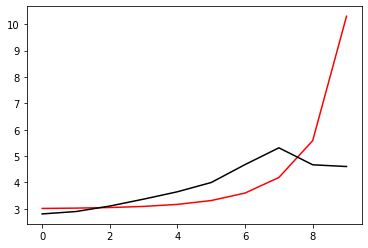

184800 0.03876523993164309
[2.72444678 2.81435611 3.01967384 3.27632234 3.54514862 3.87347662
 4.49827105 5.02507819 4.22678522 4.27451981]


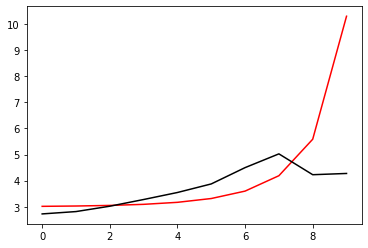

185900 0.04059907926592392
[2.79779418 2.88885925 3.09614008 3.35706348 3.634086   3.97710618
 4.6248083  5.18013393 4.38768947 4.35328536]


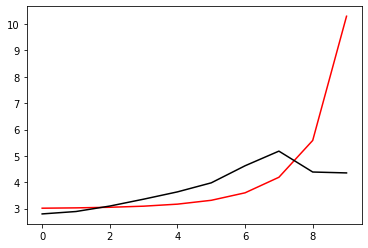

187000 0.010477137147882057
[2.83146098 2.92645667 3.13835676 3.40660034 3.6955742  4.05825204
 4.73518557 5.33088231 4.56187016 4.56721874]


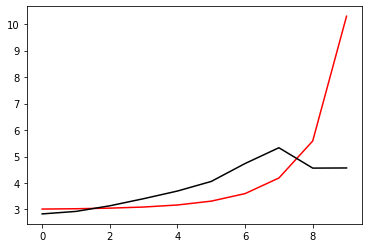

188100 0.04300342943508913
[2.79687369 2.88473088 3.09082194 3.35610531 3.64578841 4.01402455
 4.70082011 5.31934802 4.58415677 4.54325665]


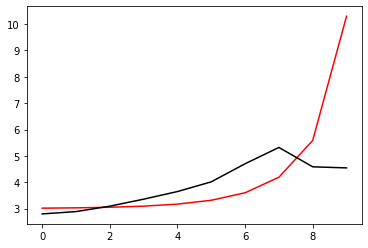

189200 0.03025262238201805
[2.805974   2.89786749 3.10902451 3.38344823 3.68890557 4.08327814
 4.80885216 5.49246236 4.84288573 4.84370945]


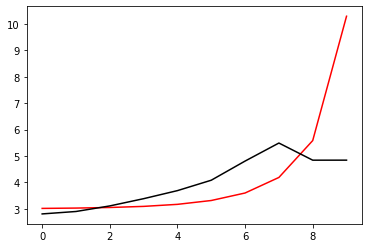

190300 0.044782256444963316
[2.82529336 2.91081254 3.1146134  3.37985976 3.67149312 4.04048335
 4.70946101 5.26803095 4.41459543 4.35885842]


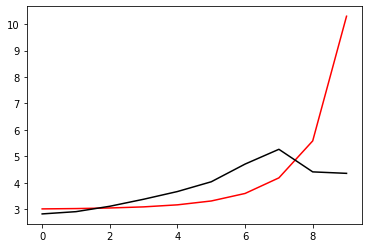

191400 0.016512016029876907
[2.82586386 2.91789037 3.128492   3.40270173 3.70755743 4.09765164
 4.79987757 5.40786611 4.58710274 4.54103954]


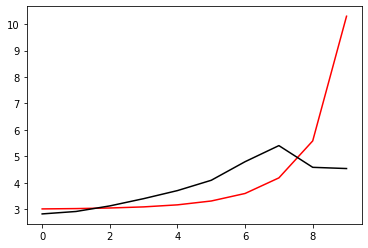

192500 0.09282066729623084
[2.61393583 2.70467351 2.91417972 3.18870921 3.49588811 3.89134218
 4.60227613 5.23587249 4.4654257  4.51513044]


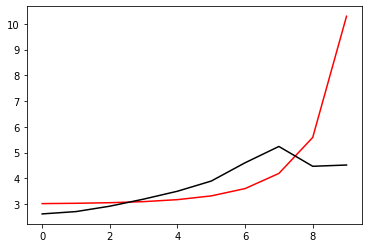

193600 0.020325531204421016
[2.76294873 2.84533979 3.04856363 3.32093984 3.63150765 4.03752361
 4.76514427 5.42640511 4.68373696 4.67723057]


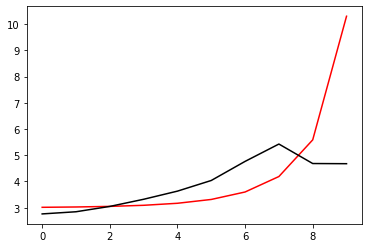

194700 0.02701714406440299
[2.67465846 2.76114292 2.96512342 3.23505958 3.53757461 3.92338604
 4.6004021  5.16162724 4.27771938 4.37541641]


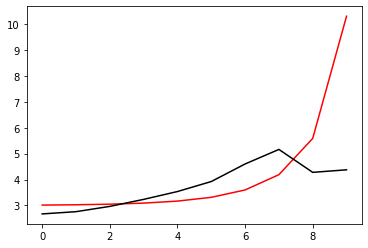

195800 0.03064720720258672
[2.76626859 2.84933003 3.05115781 3.32143356 3.62800392 4.02338373
 4.71601779 5.29587494 4.41067434 4.38420497]


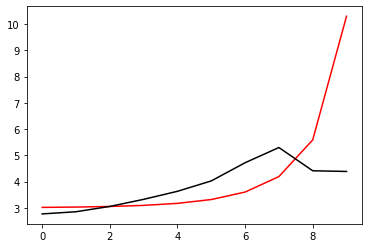

196900 0.03251659943928499
[2.8309807  2.91899739 3.12649099 3.4053969  3.72595614 4.14430814
 4.87148997 5.49668615 4.63182313 4.58778834]


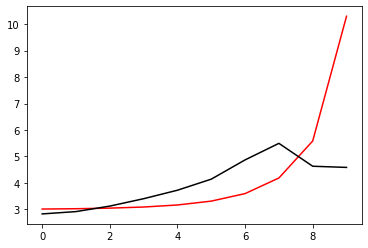

198000 0.010152371907243184
[2.81679047 2.88751594 3.07909101 3.34413687 3.65233886 4.05834061
 4.76839157 5.37698263 4.50278315 4.49399215]


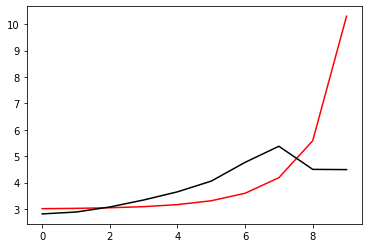

199100 0.0413464032944542
[2.82144554 2.89376998 3.08856414 3.3617531  3.6860714  4.12067755
 4.87647016 5.56422743 4.79860352 4.78675726]


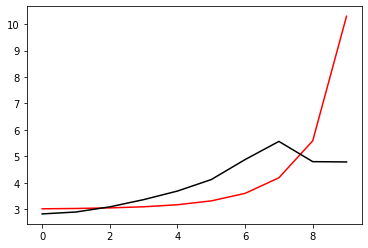

200200 0.030840027914620594
[2.83067605 2.89367088 3.07792611 3.3384403  3.64465714 4.04773441
 4.73730356 5.28932684 4.32175824 4.29547569]


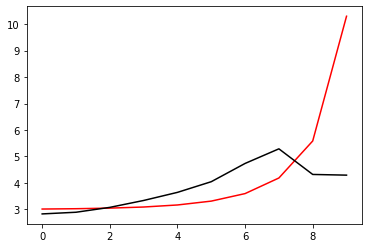

201300 0.0388982153196428
[2.87141782 2.94032977 3.13068061 3.39928641 3.7175063  4.13948462
 4.85753202 5.44651164 4.49095782 4.43391202]


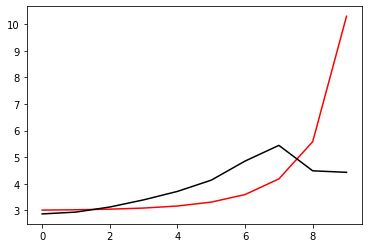

202400 0.014830279710034389
[2.72220122 2.79253406 2.98500802 3.2584877  3.58624832 4.02596558
 4.77609275 5.43262934 4.57212119 4.65716493]


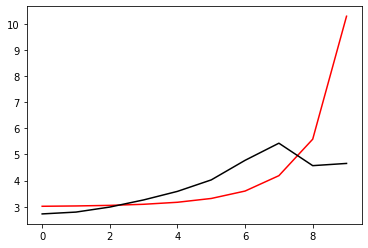

203500 0.0828747450503626
[2.65284928 2.72484367 2.9161048  3.18625354 3.50686488 3.93006964
 4.63707328 5.20186726 4.20089806 4.57825936]


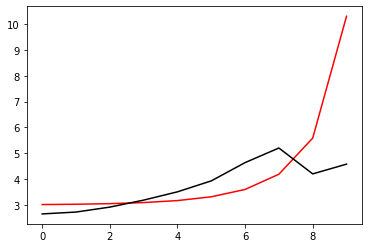

204600 0.020218257138263095
[2.84706118 2.90686604 3.08870431 3.35300516 3.67202264 4.09851555
 4.8106423  5.36573587 4.31105972 4.30744489]


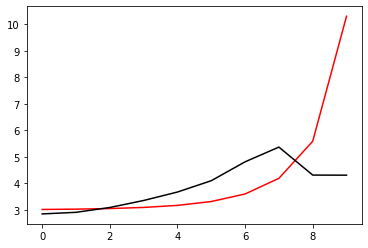

205700 0.0004586300292096139
[2.80641431 2.86858385 3.05302291 3.32183348 3.64887869 4.0896832
 4.82661396 5.42750602 4.41878448 4.40570881]


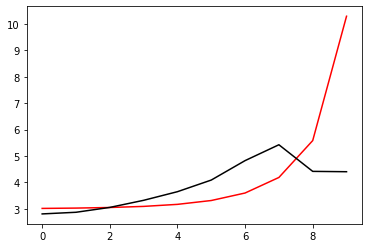

206800 0.030186112002159867
[2.80950675 2.87155179 3.05703639 3.33085902 3.66968067 4.13357234
 4.91077492 5.58033852 4.63267451 4.63688706]


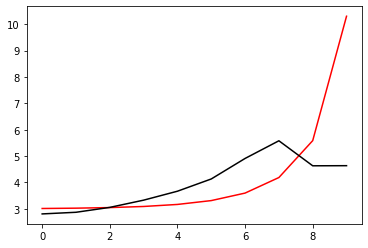

207900 0.04980606053373874
[2.76011396 2.81715685 2.99563619 3.25996505 3.58391224 4.02027498
 4.73819533 5.29006426 4.16519768 4.18754222]


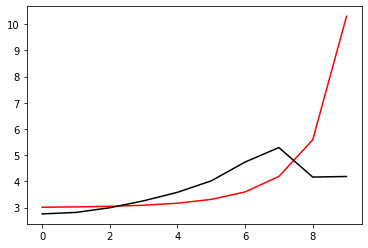

209000 0.010142217370692048
[2.80483064 2.86666007 3.04992977 3.32086564 3.65524828 4.10891448
 4.85411185 5.44289361 4.33634539 4.32339969]


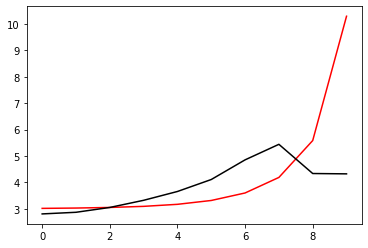

210100 0.04159039451292289
[2.82419526 2.89054866 3.07871662 3.35714864 3.70388381 4.17800687
 4.95465911 5.58918708 4.51592075 4.50747561]


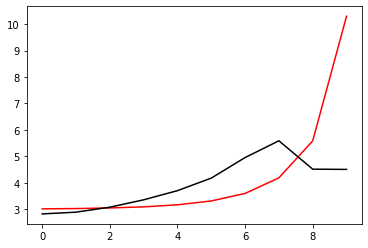

211200 0.030333711032212222
[2.83606757 2.88586881 3.05879049 3.32424331 3.66005171 4.12404624
 4.88728466 5.5093679  4.43019221 4.41388688]


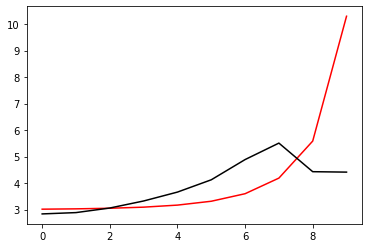

212300 0.13705710641026594
[2.88663743 2.94119291 3.11990358 3.39571307 3.74970292 4.2440423
 5.0541275  5.75346207 4.77522983 4.66880636]


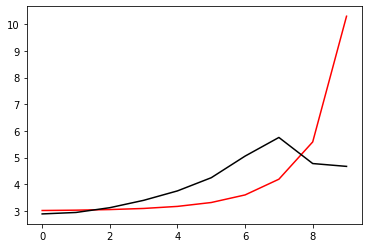

213400 0.009309575373561224
[2.82607539 2.87156257 3.03975953 3.30229811 3.6367895  4.09740053
 4.83990069 5.40521717 4.22937315 4.2038004 ]


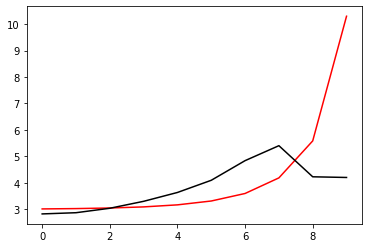

214500 0.010410505023700882
[2.85150516 2.90049554 3.07252058 3.34109195 3.68577966 4.1637136
 4.9338996  5.53919868 4.38853895 4.38908503]


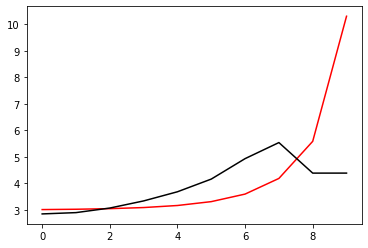

215600 0.07599609678482336
[2.63039589 2.68049997 2.85302143 3.12286073 3.4702851  3.953105
 4.73072324 5.35623948 4.24401812 4.2317251 ]


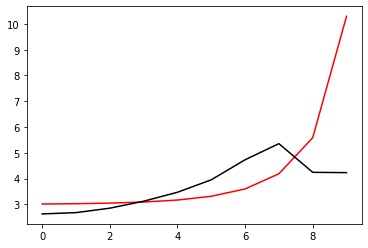

216700 0.0035168000849851353
[2.81100794 2.83918532 2.99295317 3.24908986 3.58889673 4.07095539
 4.85374346 5.49529098 4.40774507 4.36856804]


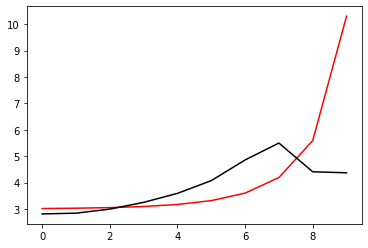

217800 0.08980424677131518
[2.71122709 2.73265767 2.87906418 3.1287666  3.46313958 3.93954475
 4.71206489 5.34015269 4.2317313  4.2510031 ]


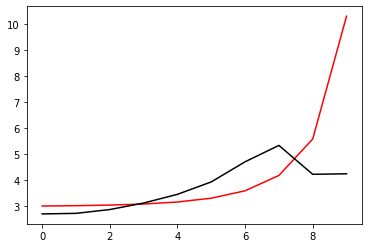

218900 0.037219727200883346
[2.87511307 2.89171926 3.03331095 3.280853   3.61721622 4.10086051
 4.88524903 5.53693498 4.46820835 4.43444572]


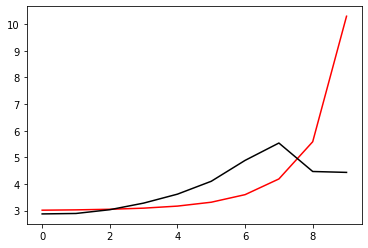

220000 0.010162654899292073
[2.82193615 2.83150939 2.96404796 3.19993491 3.51872503 3.97074823
 4.69076439 5.22505162 4.0043359  4.00931048]


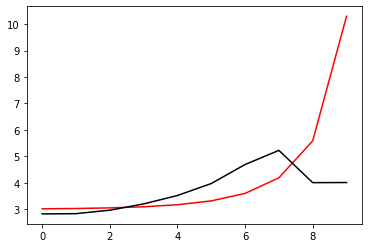

221100 0.04429108764668665
[2.8722464  2.88621048 3.02310823 3.26519057 3.59393374 4.06241409
 4.80811315 5.37639641 4.17438612 4.14246593]


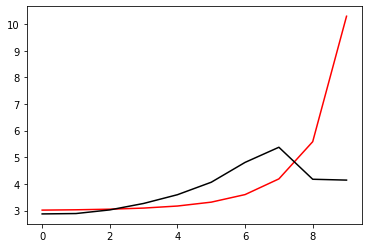

222200 0.030324544428653642
[2.88818245 2.90715685 3.04893189 3.29809778 3.63820949 4.12507505
 4.89861939 5.50686908 4.33690587 4.3365863 ]


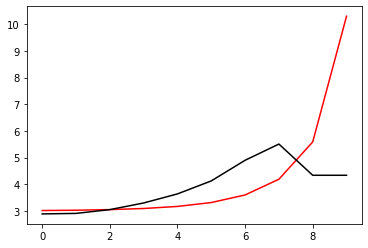

223300 0.039506699198956274
[2.90581662 2.91509215 3.04781222 3.2901435  3.62639848 4.11268354
 4.88800086 5.50439182 4.34934996 4.26572392]


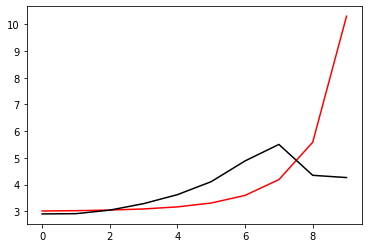

224400 0.280114676991693
[2.536694   2.55374469 2.69364524 2.94525486 3.29490328 3.80076928
 4.60324942 5.26344359 4.17189591 4.57308052]


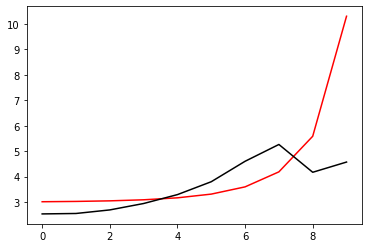

225500 0.010153697597564598
[2.80728044 2.83004907 2.97174327 3.22047461 3.55970601 4.03986786
 4.77956388 5.29371565 3.98779371 3.97248597]


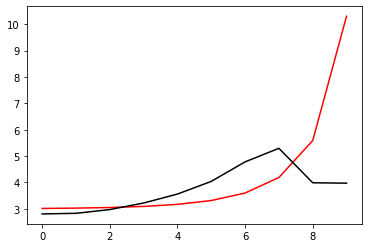

226600 0.02029114156450918
[2.87714701 2.90328411 3.04942407 3.30610696 3.66010767 4.16796444
 4.95830505 5.5388298  4.2263811  4.23232415]


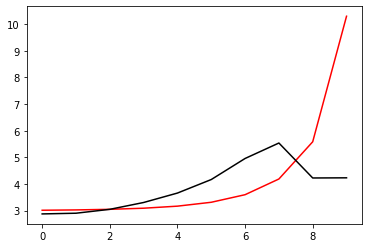

227700 0.06558349362932406
[2.66519466 2.69215666 2.83760715 3.09310284 3.44572505 3.95215798
 4.74205442 5.33262869 4.03994499 4.05320362]


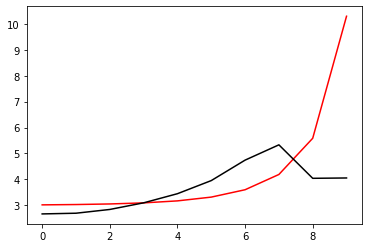

228800 0.030190754846893424
[2.8574322  2.87793365 3.01840521 3.27297271 3.63112235 4.15227672
 4.96800892 5.60035059 4.35199433 4.3431942 ]


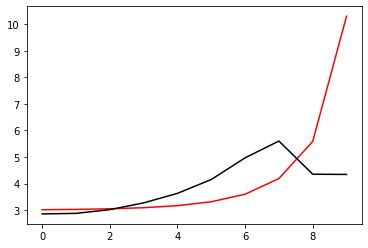

229900 0.04941616068299172
[2.81229116 2.83094406 2.96710048 3.21428248 3.55893299 4.05223963
 4.8050947  5.31182944 3.8922018  3.90906343]


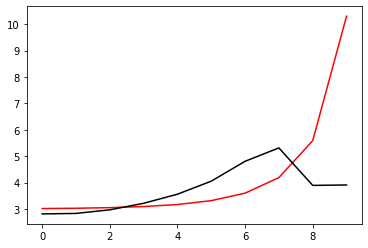

231000 0.010154942021347847
[2.8558913  2.87724563 3.01608321 3.26733778 3.61902521 4.12453033
 4.89690308 5.4290058  4.0175192  4.00868291]


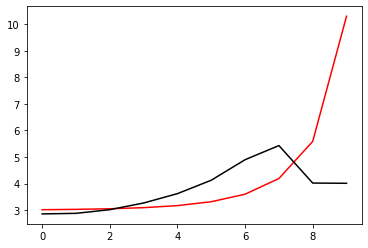

232100 0.042283031871828955
[2.87453089 2.90079261 3.04496516 3.30417706 3.66903025 4.19675823
 5.00520669 5.58943286 4.21176354 4.19708585]


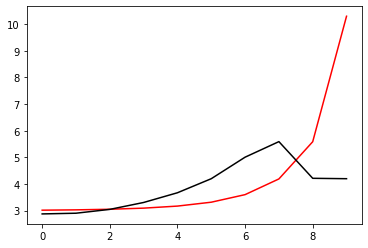

233200 0.039619365414965135
[2.80129376 2.81545214 2.94862497 3.19908475 3.55801694 4.0828642
 4.89141849 5.48698936 4.13890278 4.11542545]


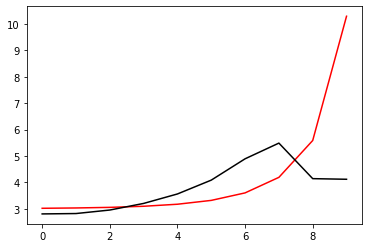

234300 0.16659418113451996
[2.92823031 2.95242491 3.09445033 3.3553584  3.72882721 4.27451115
 5.11047347 5.74412165 4.43344803 4.31922474]


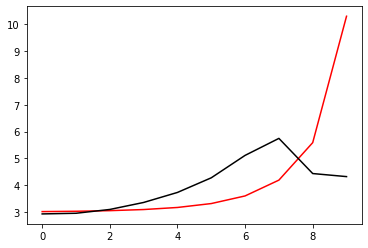

235400 0.0174863007987871
[2.78433466 2.80284491 2.93677159 3.18557118 3.53922268 4.04922629
 4.81616684 5.32493617 3.8463794  3.82859857]


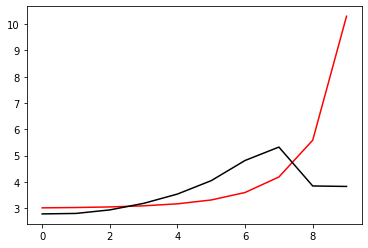

236500 0.010171632588219896
[2.83927014 2.85999309 2.99644957 3.24966998 3.61142511 4.13558514
 4.92475476 5.46224873 3.99663393 3.99585647]


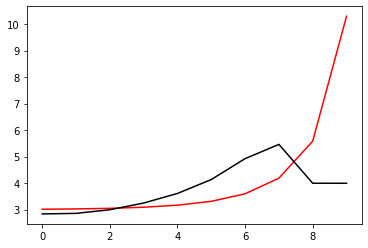

237600 0.020637407056445914
[2.8025827  2.82556322 2.9652433  3.22499536 3.59943315 4.14668957
 4.97555368 5.57827081 4.18017422 4.12851329]


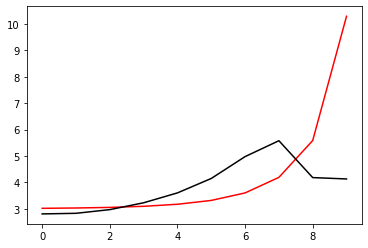

238700 0.011573253805562449
[2.7507683  2.77923073 2.92080128 3.178729   3.54536551 4.07147658
 4.8452702  5.32740046 3.75786485 3.85278179]


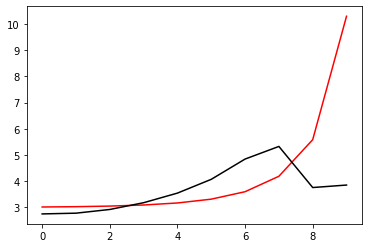

239800 0.03036649085945441
[2.8219897  2.84962713 2.99141822 3.25193165 3.6253602  4.16540465
 4.96379071 5.4762984  3.90664461 3.89052873]


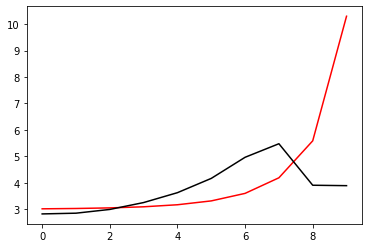

240900 0.03269690094937452
[2.87525251 2.90789248 3.05533571 3.32420329 3.71150819 4.27529733
 5.1126223  5.67538056 4.11911813 4.07530441]


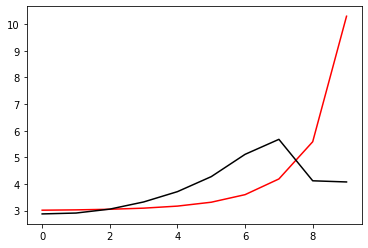

242000 0.010189524292327525
[2.85166376 2.87288585 3.00965778 3.26914896 3.64832283 4.20420421
 5.03188136 5.59010643 4.03962387 4.03056665]


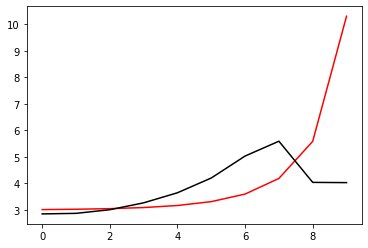

243100 0.041410340859775976
[2.85295949 2.87953738 3.02242201 3.29149821 3.68695305 4.27002644
 5.1413033  5.77240486 4.31531963 4.30136017]


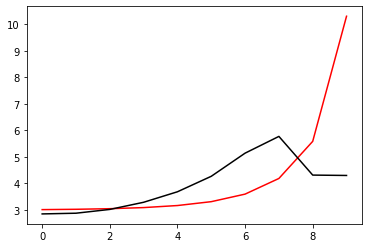

244200 0.03983309747388478
[2.77587204 2.79967235 2.93764969 3.19862049 3.57981114 4.13505856
 4.94752258 5.46428661 3.84436104 3.819293  ]


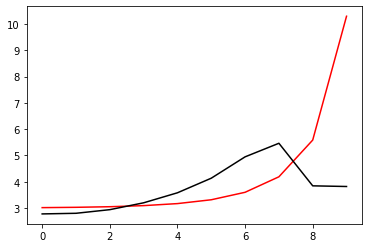

245300 0.03552622923283437
[2.87606045 2.90388725 3.04649138 3.31448774 3.70749029 4.28263914
 5.12578689 5.67724987 4.06024907 3.99077999]


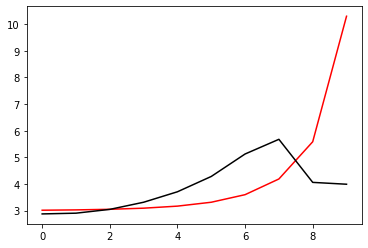

246400 0.06749893124823816
[2.630308   2.66135531 2.80681812 3.07862652 3.47791195 4.06396428
 4.9270286  5.52247681 3.9777795  4.2100702 ]


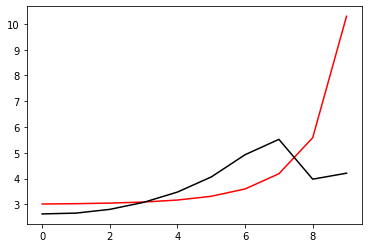

247500 0.010200862825302066
[2.78889158 2.8075079  2.94281707 3.20810595 3.60562368 4.19520972
 5.06606932 5.67609136 4.14646545 4.16072678]


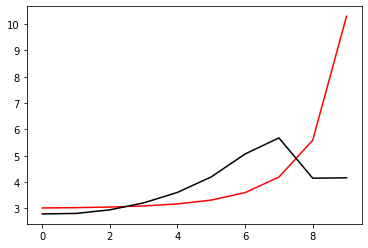

248600 0.07023103659351759
[2.6852453  2.71321686 2.85374342 3.12026317 3.51323538 4.08621389
 4.91255715 5.433778   3.78578131 3.95874485]


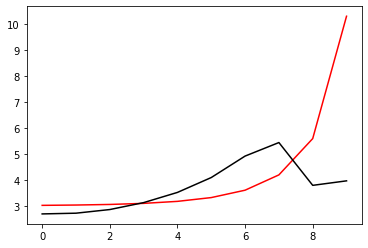

249700 0.00029733269344048676
[2.87506511 2.88937243 3.0190146  3.27811508 3.66782332 4.2420744
 5.07165175 5.58563125 3.89911993 3.8992041 ]


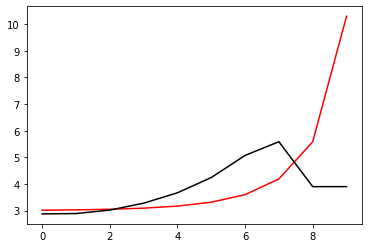

250800 0.030214669475167606
[2.8383318  2.8553759  2.98789703 3.25145817 3.64896174 4.23693914
 5.09055756 5.64754997 4.00752782 4.0051124 ]


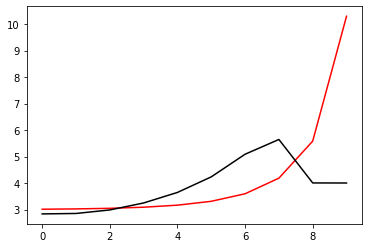

251900 0.03234073913137787
[2.86642694 2.88560808 3.02149201 3.29227157 3.70422996 4.31883336
 5.21826205 5.84818156 4.2735014  4.21831395]


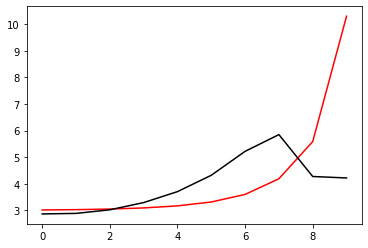

253000 0.009964698975004693
[2.81239146 2.82437891 2.95107939 3.20949133 3.60247073 4.18283869
 5.01261758 5.51122898 3.75979846 3.76030665]


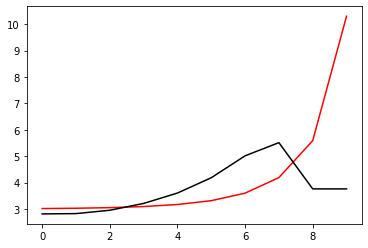

254100 0.04288048381524728
[2.85115566 2.86555118 2.99483174 3.25735758 3.65767753 4.25095712
 5.10185487 5.62935615 3.89278632 3.86505794]


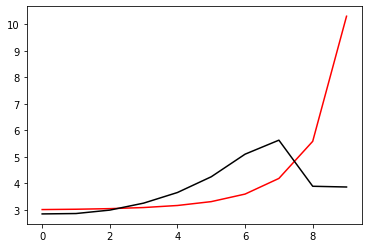

255200 0.03033766689141256
[2.85933567 2.87812264 3.0118708  3.28078445 3.6916528  4.30259486
 5.1818644  5.75209509 4.0496628  4.04792005]


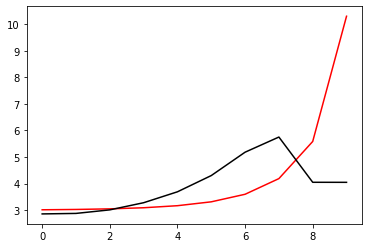

256300 0.04075167737183213
[2.91112759 2.91875485 3.04293922 3.30474018 3.71140444 4.32084088
 5.20021425 5.77585877 4.08444805 3.99425962]


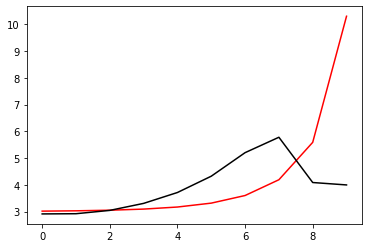

257400 0.3481295916617007
[2.50383071 2.51644674 2.64560354 2.91473471 3.33360293 3.96306675
 4.87437015 5.50698102 3.90405574 4.32407585]


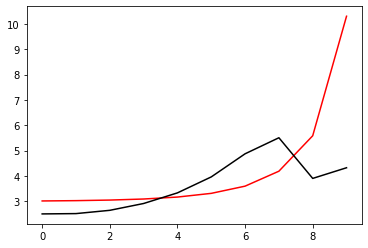

258500 0.010264963147134038
[2.87860992 2.88374738 3.00431696 3.2626125  3.66539223 4.26585539
 5.11511227 5.6126799  3.80048568 3.78297319]


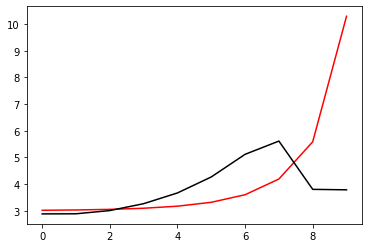

259600 0.020225676599304267
[2.84914041 2.85713517 2.98071349 3.24354274 3.65413136 4.26844334
 5.14259292 5.68379222 3.9127554  3.91404581]


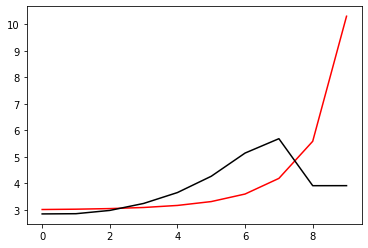

260700 0.017582703260386613
[2.79208044 2.76261926 2.85002894 3.07768866 3.45202228 4.02423409
 4.84290811 5.3170078  3.49305732 3.64067466]


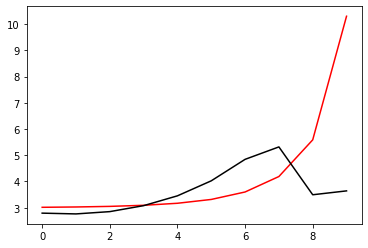

261800 0.030220179339436878
[2.92302009 2.88784778 2.97005313 3.19489057 3.57018522 4.14819592
 4.97759697 5.46952049 3.66631595 3.65391563]


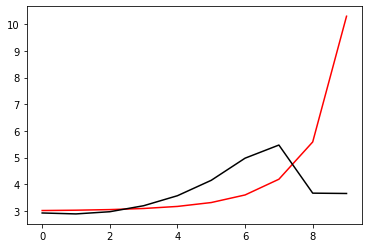

262900 0.048153949126516986
[2.87711447 2.84074549 2.92165121 3.14676068 3.52494545 4.10885439
 4.94626976 5.45053811 3.66062994 3.62858579]


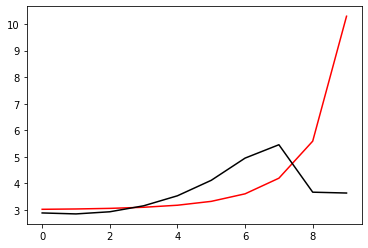

264000 0.01023008234518755
[2.9088893  2.88537819 2.97842024 3.21767329 3.61478854 4.22565915
 5.10184423 5.66638827 3.95908788 3.95728961]


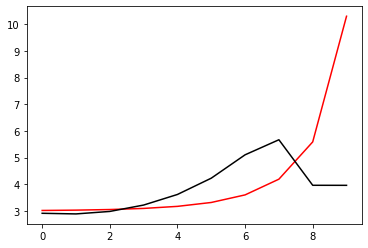

265100 0.05084409335360508
[2.83715601 2.8138367  2.90529218 3.14046635 3.52831618 4.11752961
 4.9422819  5.40157815 3.54902863 3.51484586]


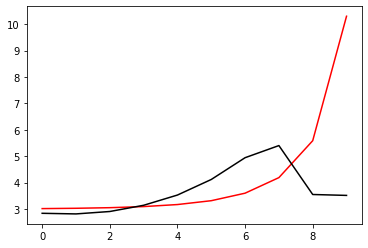

266200 0.03986902873036127
[2.82626631 2.80877278 2.90577323 3.14783251 3.54598641 4.15226219
 5.00611625 5.509224   3.68942221 3.66903864]


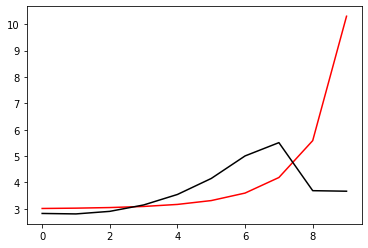

267300 0.041377878895904954
[2.93399822 2.92357741 3.02773091 3.27961921 3.69349658 4.32575864
 5.21952639 5.76662129 3.95069239 3.86500087]


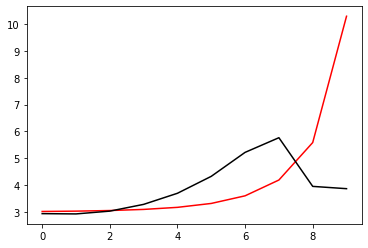

268400 0.34911943703762843
[2.52054511 2.5159586  2.62585039 2.88585877 3.31323003 3.96875449
 4.90281227 5.51774098 3.77288691 4.20146502]


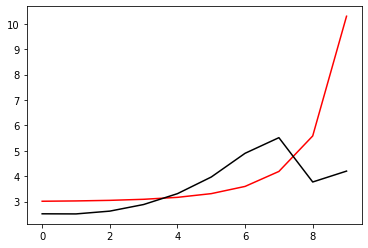

269500 0.010204851698823963
[2.85351316 2.84119998 2.94155851 3.18869264 3.59611974 4.21571195
 5.07705674 5.55091004 3.61191783 3.60756589]


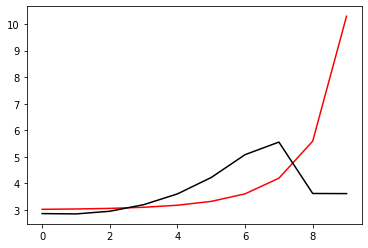

270600 0.020338510128292717
[2.89743352 2.88932521 2.99433645 3.2484088  3.66757116 4.30753993
 5.20298018 5.72282491 3.80550571 3.81158169]


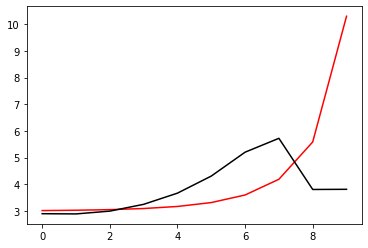

271700 0.056865820349845365
[2.69800456 2.69120037 2.79669382 3.05127447 3.47161622 4.11392169
 5.01446658 5.55139148 3.66730719 3.67234571]


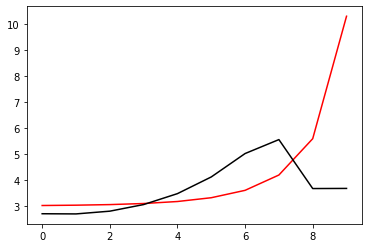

272800 0.030248848622047
[2.88447185 2.86977205 2.96837768 3.21916511 3.64086927 4.29162697
 5.20914121 5.77585566 3.9271361  3.92458999]


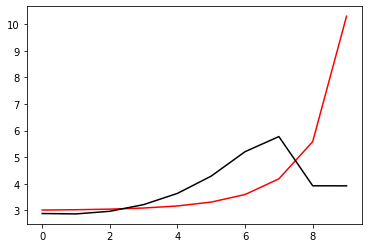

273900 0.050009127743757514
[2.8238444  2.80607898 2.89928878 3.14125122 3.54735901 4.16711396
 5.01898286 5.46400188 3.45833864 3.48774547]


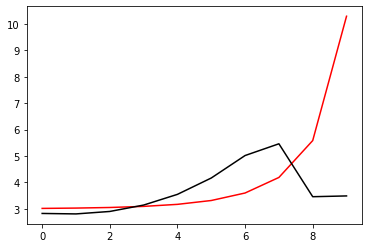

275000 0.01019914611721448
[2.87345411 2.86032908 2.95812414 3.20610236 3.62163407 4.25704893
 5.1339903  5.61093094 3.6194325  3.60731704]


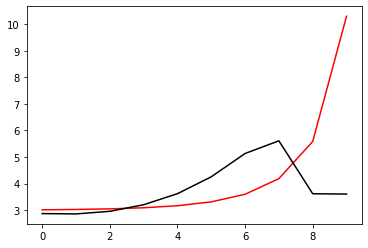

276100 0.042308762967258995
[2.89562981 2.88771411 2.99109203 3.24691928 3.67512737 4.33170662
 5.24300687 5.76855406 3.81216212 3.79831242]


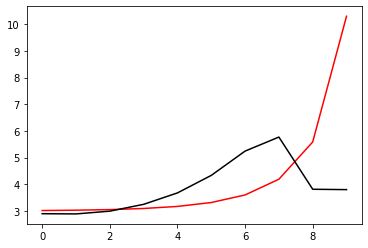

277200 0.03041340726968943
[2.88780866 2.87300103 2.96998405 3.22080856 3.64600032 4.30151974
 5.2134221  5.74664746 3.80748601 3.79230301]


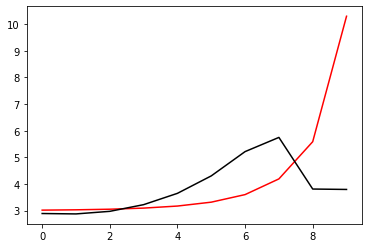

278300 0.13381983132590414
[2.93246864 2.9271256  3.03379548 3.29720174 3.74124279 4.42611055
 5.38343863 5.98859965 4.13855298 4.03226513]


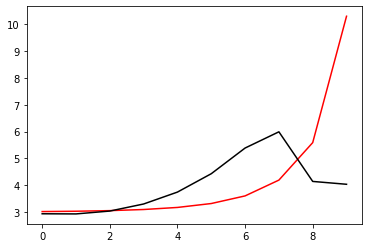

279400 0.010111904925451878
[2.83629153 2.82501744 2.92368573 3.17530994 3.59993497 4.24873139
 5.13262611 5.59574889 3.55562872 3.54189505]


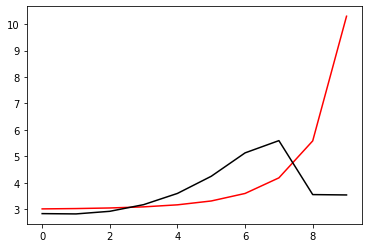

280500 0.010481595560563411
[2.89218282 2.88492707 2.98828778 3.2471163  3.68419951 4.35507101
 5.27660898 5.78909345 3.76614883 3.76553529]


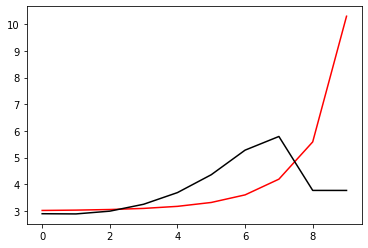

281600 0.07534921830503938
[2.67190949 2.6673153  2.77257571 3.0333499  3.47327869 4.14884204
 5.07973021 5.61756678 3.64058746 3.62025981]


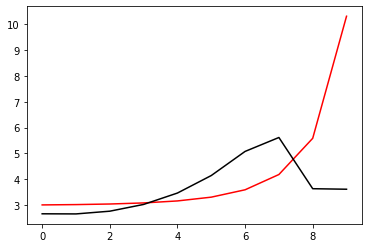

282700 0.0003306340431084965
[2.86781399 2.85417083 2.9516142  3.2074807  3.64706832 4.32813629
 5.27080285 5.82940185 3.87480801 3.82729752]


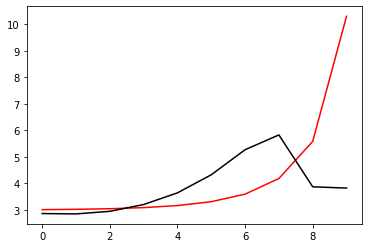

283800 0.11049503450032885
[2.6756275  2.67019437 2.77183785 3.02731993 3.45969635 4.12062092
 5.01798454 5.49723901 3.44003313 3.47939379]


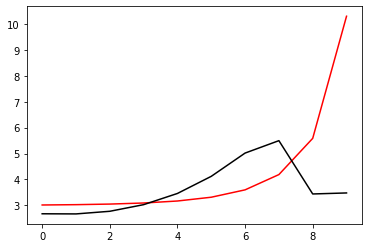

284900 0.0402027163152901
[2.87379403 2.85587018 2.94728325 3.19554463 3.62446743 4.28602876
 5.18618511 5.66306917 3.58495509 3.55397109]


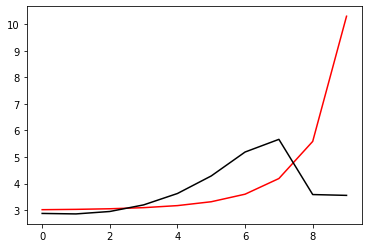

286000 0.010537068935662587
[2.90338185 2.89048527 2.98703823 3.24212923 3.68160798 4.36001714
 5.28615914 5.79992045 3.75479503 3.76273342]


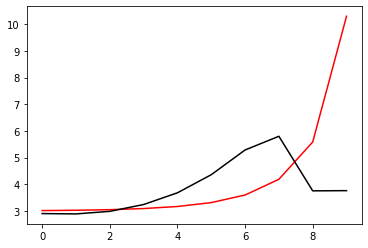

287100 0.042376535004525505
[2.88492626 2.86503927 2.95556624 3.20664384 3.64511129 4.32623946
 5.25990904 5.79258091 3.77921701 3.74825081]


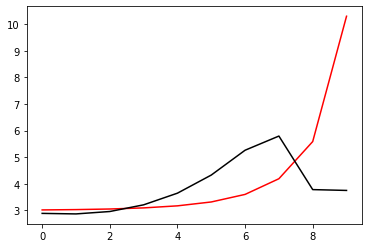

288200 0.030317346636837498
[2.88001564 2.86488114 2.96053392 3.21948797 3.67151148 4.37546261
 5.34642543 5.94311311 4.02174588 4.02026185]


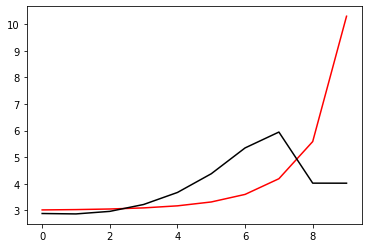

289300 0.041747096541323477
[2.9114224  2.88911715 2.97653524 3.2249393  3.66089795 4.33510561
 5.24237375 5.70608182 3.58699924 3.53106354]


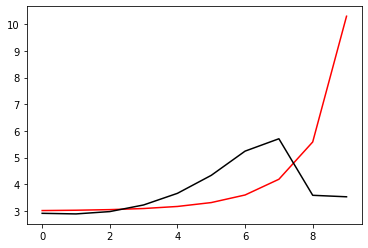

290400 0.009055602716547574
[2.86562578 2.84720232 2.9387085  3.19267078 3.6375241  4.32710937
 5.26232281 5.77485202 3.70611917 3.70031891]


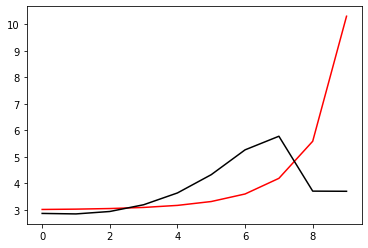

291500 0.01026678233650513
[2.79476532 2.77973791 2.87476341 3.13395914 3.58793837 4.29379555
 5.25863224 5.82594656 3.82286802 3.83560415]


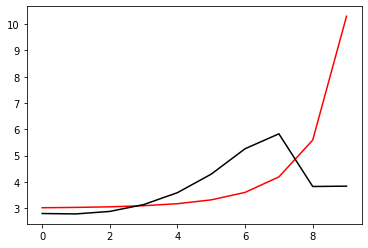

292600 0.07244971679324065
[2.69576148 2.68835505 2.7873789  3.0470415  3.49666335 4.18839982
 5.11682236 5.6073197  3.48015027 3.64748353]


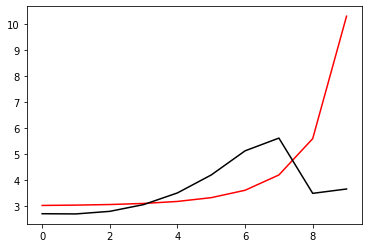

293700 0.0018587190306544098
[2.84875279 2.83124528 2.92225342 3.17669264 3.62476183 4.31936742
 5.25393774 5.74538059 3.5975684  3.56417947]


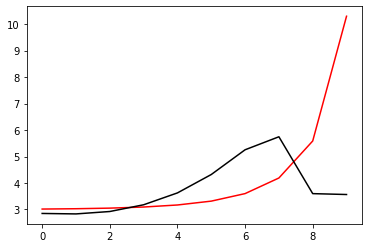

294800 0.030347699377523112
[2.88337064 2.86984109 2.96493967 3.22512834 3.68274875 4.39362605
 5.35477404 5.88334512 3.76067966 3.7618445 ]


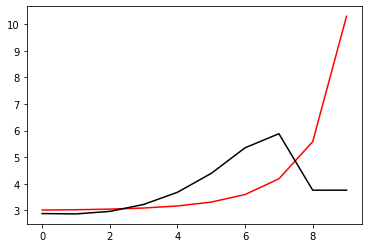

295900 0.0384384055805875
[2.87774844 2.85439176 2.94064308 3.19349067 3.64555871 4.35221238
 5.30972349 5.83908297 3.72108637 3.66937561]


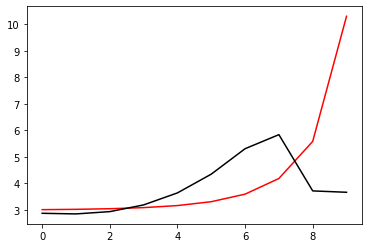

297000 0.010467015514829144
[2.88633937 2.86862704 2.96073462 3.22184824 3.68739829 4.41624512
 5.4096574  5.99909264 3.96270276 3.97419172]


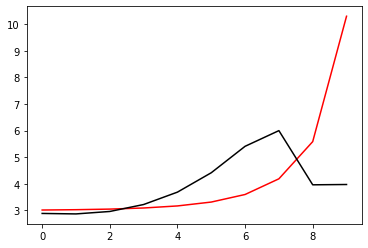

298100 0.046921894827333555
[2.82621882 2.80171779 2.88534043 3.13487268 3.58230174 4.27806006
 5.20516454 5.67331805 3.47829792 3.4464041 ]


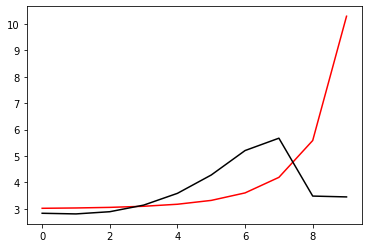

299200 0.030579617307651484
[2.87360157 2.85624381 2.94661549 3.20417277 3.66328595 4.37782882
 5.33492175 5.84169999 3.66612241 3.6372164 ]


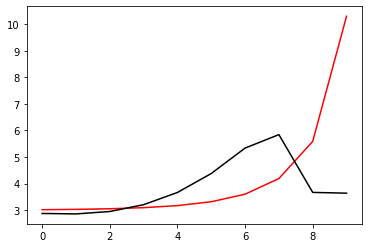

300300 0.06350106250351249
[2.9197193  2.9096274  3.0073152  3.27406327 3.74688208 4.48311985
 5.47369151 6.02463608 3.8770744  3.80241299]


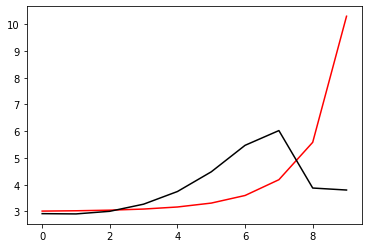

301400 0.012905345640655841
[2.80289131 2.77523583 2.85741639 3.11102048 3.57299518 4.30007288
 5.28417815 5.84563154 3.74502721 3.80632411]


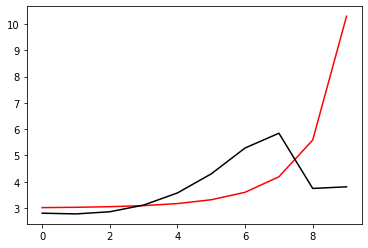

302500 0.07762891647087947
[2.72909782 2.7077431  2.79237296 3.04453319 3.49918895 4.20619847
 5.14075884 5.6063771  3.3950067  3.78279385]


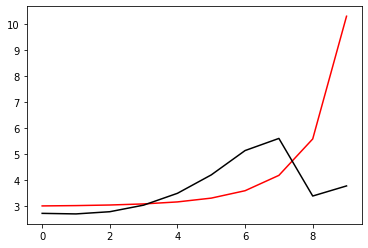

303600 0.020962560205080107
[2.83793386 2.81124062 2.89210335 3.14287668 3.59971792 4.31414909
 5.26219926 5.73726056 3.50620122 3.48628972]


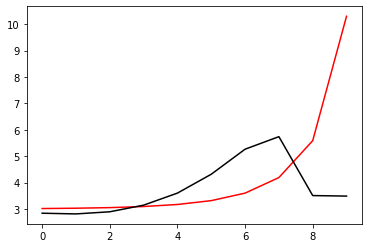

304700 0.00042081672269247847
[2.89206854 2.86937336 2.9546759  3.21214664 3.68066912 4.41612766
 5.40066096 5.92254533 3.70360621 3.70700021]


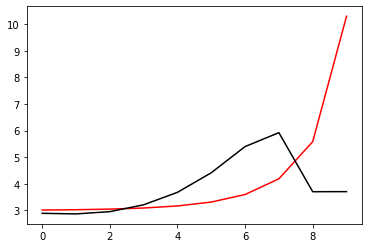

305800 0.03130457586609788
[2.83406554 2.80246496 2.87958322 3.12998423 3.59269742 4.32326108
 5.30428916 5.83016459 3.62210775 3.58051787]


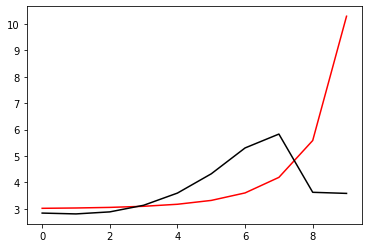

306900 0.032166944545228976
[2.90279675 2.87641605 2.95936135 3.21868121 3.69670936 4.45341869
 5.47752652 6.07186937 3.94644903 3.88843388]


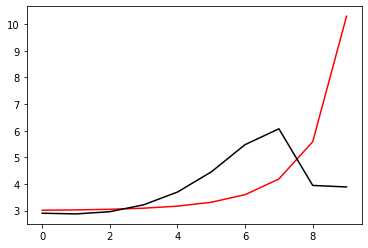

308000 0.010187820962538294
[2.8572534  2.82996985 2.90913231 3.16054698 3.62296002 4.34641929
 5.29388588 5.72741353 3.40826052 3.40011715]


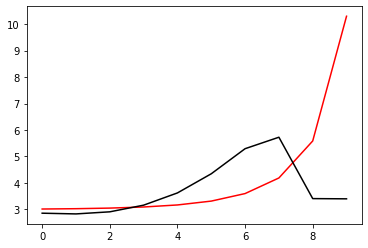

309100 0.04219551779093082
[2.867144   2.84850338 2.9359257  3.19691119 3.67298316 4.41920966
 5.40742827 5.89599118 3.58777395 3.56456624]


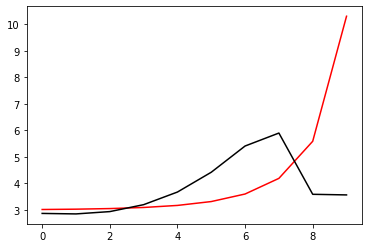

310200 0.03037208154038702
[2.8706981  2.85690157 2.9490323  3.21604518 3.70177675 4.46489882
 5.48352088 6.01809071 3.73221999 3.72954527]


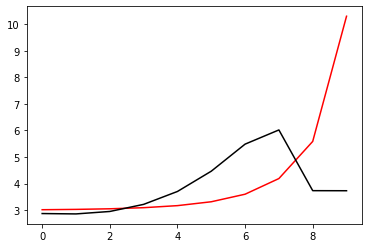

311300 0.04611561575214215
[2.93533345 2.90727866 2.98665738 3.24276756 3.71941619 4.47424354
 5.48380779 6.01155864 3.7219304  3.61934229]


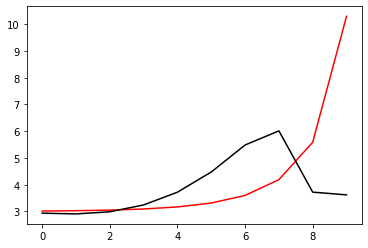

312400 0.36604821852987146
[2.53308318 2.5002496  2.57569075 2.83020821 3.30925615 4.07242539
 5.10012685 5.66912118 3.44871097 3.87990313]


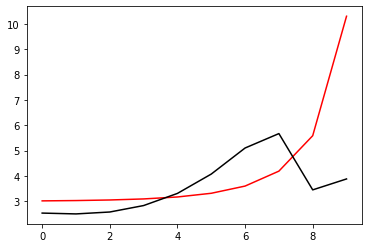

313500 0.010258657355944126
[2.83882012 2.79694544 2.86164926 3.10206507 3.55985893 4.28617314
 5.24418868 5.69002275 3.30523809 3.2932806 ]


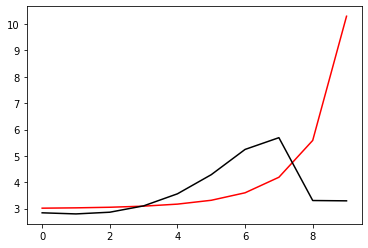

314600 0.020399726983801676
[2.91778206 2.87963232 2.94872611 3.19602938 3.66578659 4.41289835
 5.4047077  5.893981   3.5337421  3.53980813]


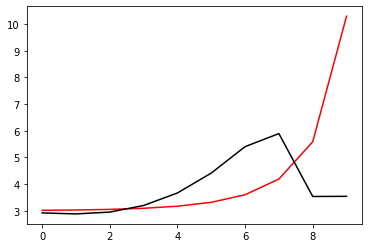

315700 0.009109203258740312
[2.84208901 2.79704272 2.85934582 3.10043107 3.56457442 4.30595096
 5.29127084 5.77880725 3.42609591 3.45596595]


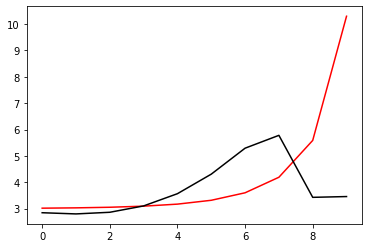

316800 0.03028357813308651
[2.87767955 2.83848293 2.90692939 3.15658425 3.63450137 4.39856908
 5.42082731 5.96861252 3.69406805 3.69153193]


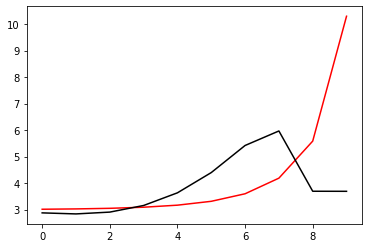

317900 0.04190977429786545
[2.86918482 2.83735322 2.90965692 3.15913989 3.63030347 4.3723962
 5.33065051 5.71576378 3.24130574 3.23328319]


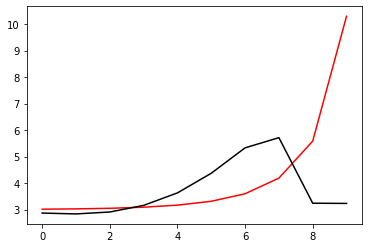

319000 0.010353981234693409
[2.89379911 2.8680005  2.94633878 3.20331224 3.68595389 4.44848663
 5.44614346 5.88256243 3.39777141 3.38809907]


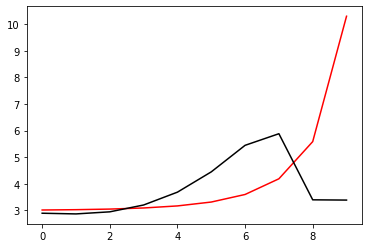

320100 0.04175652212583288
[2.88654397 2.86493249 2.94764524 3.21065126 3.70354315 4.48531034
 5.52168438 6.02138451 3.5586093  3.54867265]


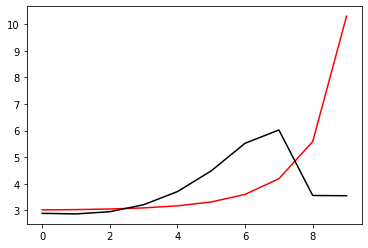

321200 0.03041501024878733
[2.89280796 2.85823929 2.92937594 3.18235059 3.66674586 4.44112975
 5.47238367 5.97681208 3.52966974 3.46109852]


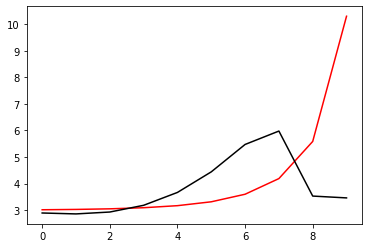

322300 0.11292261676168874
[2.93795898 2.90966372 2.98751637 3.24988518 3.74947072 4.54900121
 5.62131417 6.19345415 3.8325789  3.73493164]


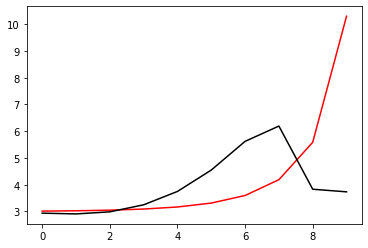

323400 0.009287051650709081
[2.86793547 2.84161481 2.91857493 3.17598439 3.66353591 4.43595467
 5.44357002 5.86089153 3.28097909 3.25087087]


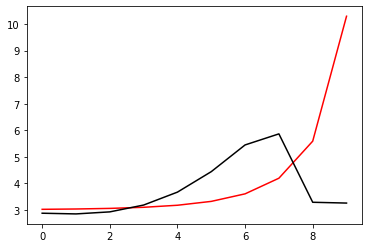

324500 0.010533904655216381
[2.88885938 2.86615172 2.94712392 3.21028686 3.70772192 4.49857993
 5.54148809 6.0083061  3.43585612 3.43517844]


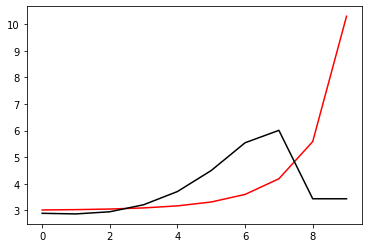

325600 0.07093547302601279
[2.70006454 2.6793517  2.76164705 3.02587636 3.52484027 4.31892858
 5.3720313  5.87221268 3.35424377 3.30667304]


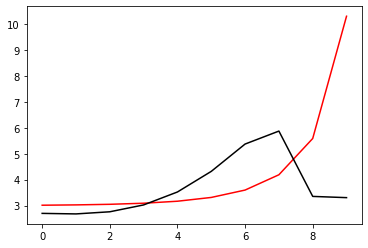

326700 0.0003786399699775741
[2.86893485 2.83860456 2.91341668 3.17361795 3.6737457  4.47595315
 5.54535973 6.07235236 3.57842542 3.51775503]


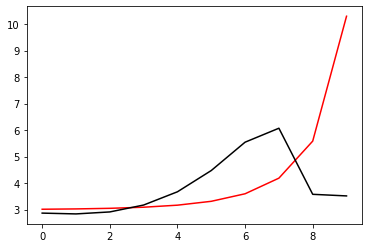

327800 0.030570510910697922
[2.86442255 2.82715775 2.89354535 3.14233643 3.62443079 4.3923299
 5.38828867 5.77535494 3.10944723 3.14962927]


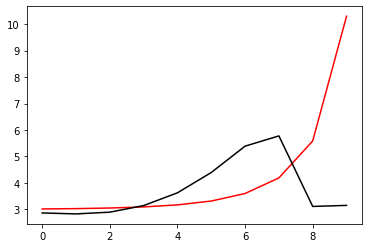

328900 0.03391026726087291
[2.91460875 2.88129603 2.95200441 3.20677014 3.698551   4.48319132
 5.50726192 5.92898985 3.27018681 3.24061935]


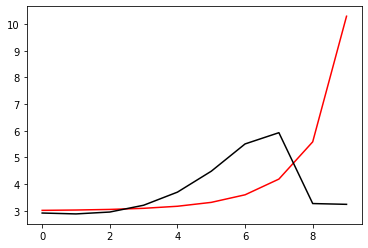

330000 0.010323231047426162
[2.87888401 2.84859201 2.92232404 3.1812725  3.68021148 4.47792007
 5.52685012 5.99528829 3.3854549  3.38210474]


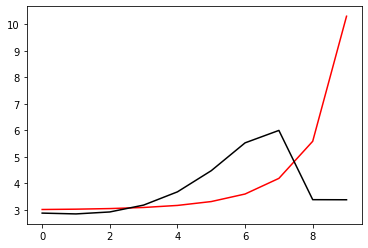

331100 0.041350446450302836
[2.88128476 2.85063546 2.92534459 3.1884941  3.69787678 4.51702876
 5.60676053 6.14690897 3.60998567 3.59829318]


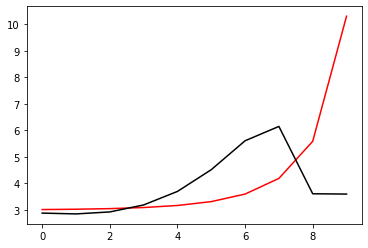

332200 0.03987149345580451
[2.82126205 2.78642193 2.85509044 3.10879468 3.60184803 4.38925146
 5.411822   5.82135725 3.11473715 3.09013555]


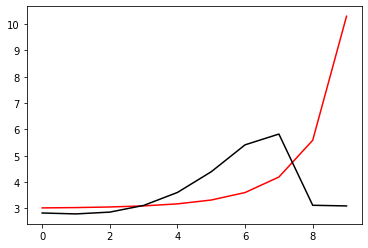

333300 0.035115963694154005
[2.90811901 2.87960097 2.95502591 3.21782276 3.72542748 4.53794709
 5.60219826 6.057714   3.34917571 3.27799018]


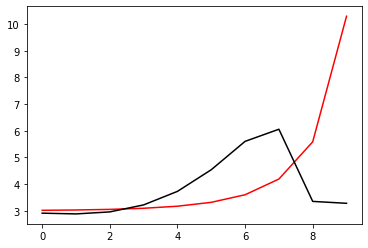

334400 0.07271577455501867
[2.65293398 2.62837423 2.70692763 2.97277822 3.48466414 4.30503613
 5.38756939 5.88997443 3.25585204 3.50169637]


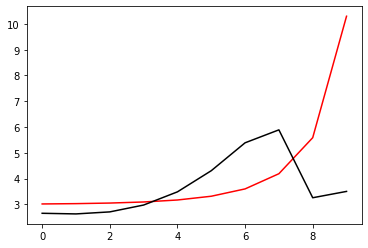

335500 0.0103202451409678
[2.81729912 2.78048875 2.849248   3.10859474 3.61819854 4.4409939
 5.53027237 6.04630235 3.42703049 3.44210316]


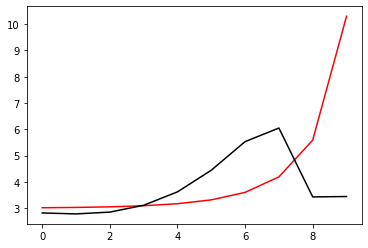

336600 0.026461172282507935
[2.81127565 2.77583679 2.84288869 3.09655573 3.59337182 4.38666462
 5.40514664 5.78139523 3.00988115 3.22706896]


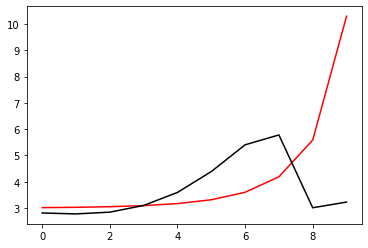

337700 0.0013143486403235398
[2.84941642 2.81961658 2.89234892 3.15324663 3.66139855 4.47474251
 5.52924172 5.95000389 3.18081628 3.14142384]


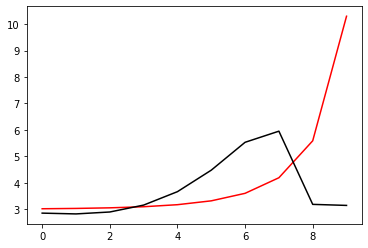

338800 0.030415513316791713
[2.87620095 2.85066039 2.9278437  3.19479556 3.71303507 4.54455858
 5.63176622 6.09760109 3.34323622 3.34443016]


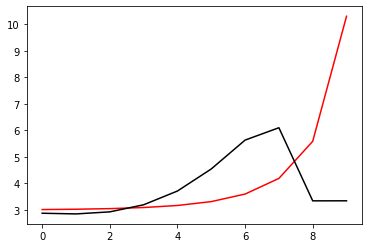

339900 0.038175607284562166
[2.88148438 2.8419874  2.90659665 3.16223428 3.67008186 4.49104976
 5.56708359 6.02697936 3.27032836 3.22026693]


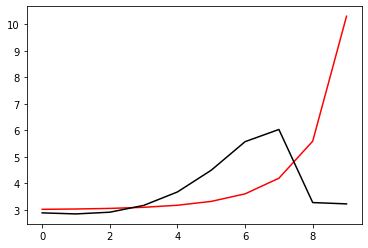

341000 0.010487180642385241
[2.89125215 2.85283102 2.91962821 3.18053136 3.69960096 4.54187378
 5.65584261 6.18300459 3.51555704 3.53098621]


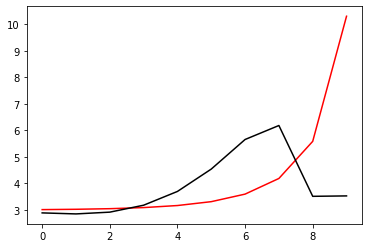

342100 0.04798249278981912
[2.81104193 2.77201242 2.83579551 3.08999673 3.59543838 4.40873559
 5.45836411 5.85983413 3.03637108 2.99203456]


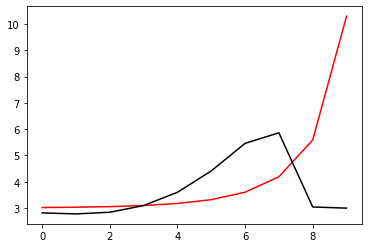

343200 0.030619597304005874
[2.88312263 2.84564311 2.91150841 3.16967059 3.68309083 4.51180996
 5.58839834 6.02036369 3.19442452 3.17247992]


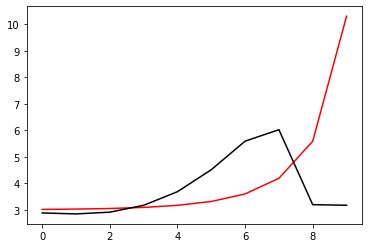

344300 0.06695850672125336
[2.92717593 2.89676209 2.96995958 3.23759919 3.76572946 4.61929043
 5.73735552 6.22261276 3.41550579 3.33791128]


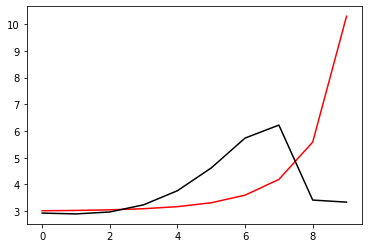

345400 0.009536231376289948
[2.83973483 2.79726051 2.86002751 3.11905331 3.64037429 4.48859921
 5.60485006 6.10983536 3.36156267 3.38138451]


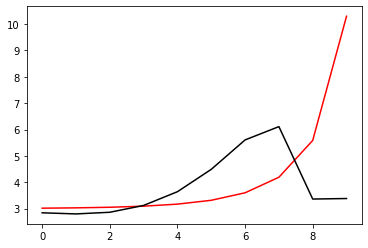

346500 0.07466100621831306
[2.73439699 2.69898751 2.76474417 3.02211813 3.53463465 4.35917345
 5.4190576  5.82130882 2.96068398 3.34673593]


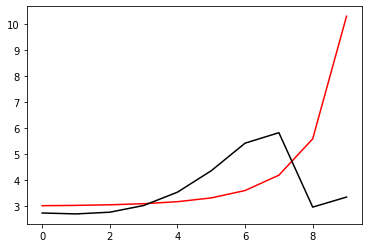

347600 0.021349924494728195
[2.83035    2.79238896 2.85665923 3.11437783 3.63028507 4.46295603
 5.53638669 5.94746178 3.06876327 3.03890002]


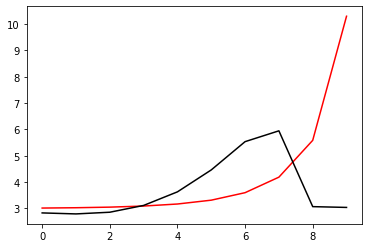

348700 0.0004947913145214648
[2.88452095 2.85079021 2.91977826 3.18435887 3.712046   4.56600465
 5.67652529 6.13466469 3.26862161 3.27178764]


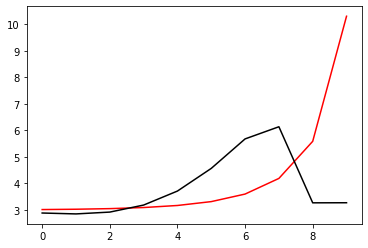

349800 0.030419676239499416
[2.86106511 2.81327512 2.86942868 3.1221448  3.63831644 4.47956614
 5.57518537 6.023539   3.15646917 3.14638222]


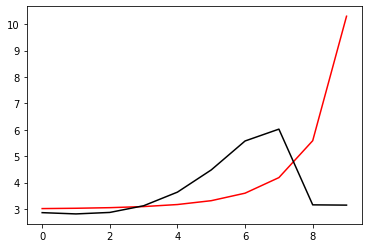

350900 0.03239424712977722
[2.90535729 2.86047661 2.92060995 3.18058708 3.71051319 4.57668632
 5.71539015 6.23603277 3.45936737 3.40023173]


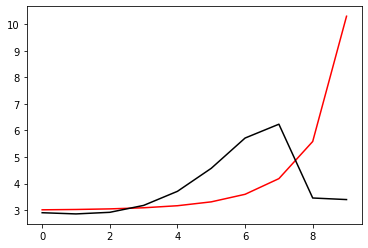

352000 0.010123078095506124
[2.85336565 2.80095624 2.85169517 3.09870809 3.60805972 4.43638179
 5.49968572 5.88774934 2.94976421 2.95029954]


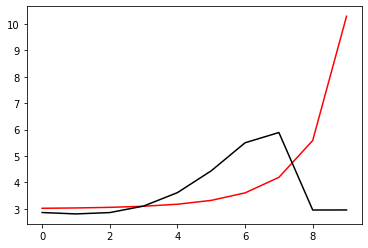

353100 0.04303097805255951
[2.89267435 2.84314718 2.89687211 3.14815175 3.66474738 4.50583633
 5.59062951 6.00802209 3.08709556 3.05854202]


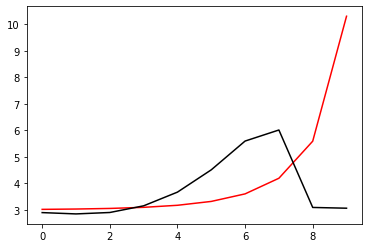

354200 0.030476743545574312
[2.89883654 2.85440675 2.91316121 3.17087868 3.69748418 4.55535513
 5.6684378  6.12953436 3.2463136  3.24417426]


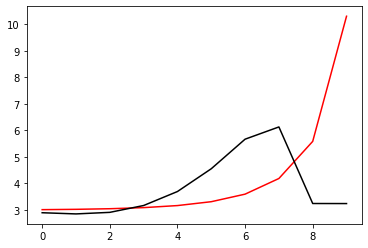

355300 0.050926924808949704
[2.79437954 2.74479182 2.79969213 3.05584482 3.58445948 4.4498526
 5.5802224  6.07958954 3.25871649 3.22837311]


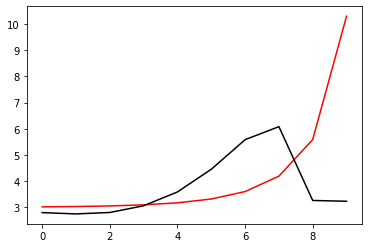

356400 0.37299512300002025
[2.52241531 2.48190463 2.54481518 2.80962369 3.34969311 4.23150476
 5.38536776 5.92126364 3.14481413 3.57080995]


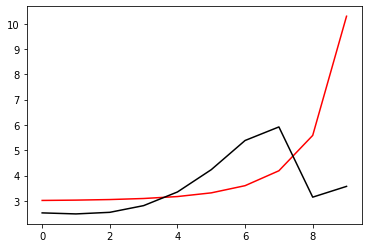

357500 0.010339258712585658
[2.82898789 2.78401446 2.84043791 3.09513185 3.6178415  4.46664672
 5.55386354 5.96679575 3.02483941 3.00858509]


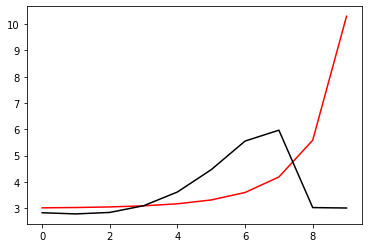

358600 0.020468915292453815
[2.89493964 2.85386102 2.91472256 3.17599438 3.70996985 4.57862925
 5.69893182 6.15488021 3.23566941 3.24190309]


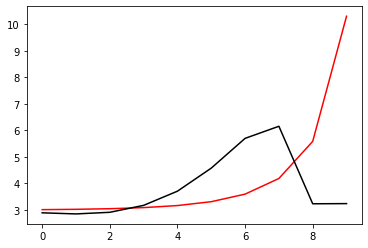

359700 0.004041152794097295
[2.86180501 2.8044507  2.85029802 3.09743095 3.6172184  4.46949455
 5.56917913 6.0075071  3.08253889 3.12354435]


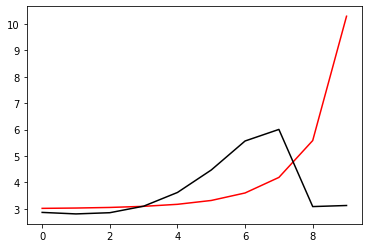

360800 0.030386205250860297
[2.90373464 2.84395732 2.88875166 3.13814396 3.66612825 4.53632157
 5.66968717 6.16879108 3.3278578  3.32099339]


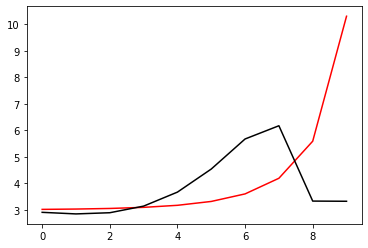

361900 0.044630752632920566
[2.87043934 2.81540126 2.86174644 3.10855584 3.62662882 4.47012924
 5.53383108 5.87796895 2.85848097 2.85343413]


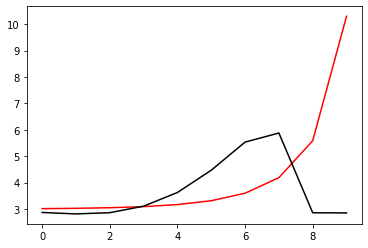

363000 0.010352491788851463
[2.8892626  2.84062383 2.89308548 3.14709365 3.67573913 4.53753982
 5.63522544 6.0234012  3.00474587 2.99718081]


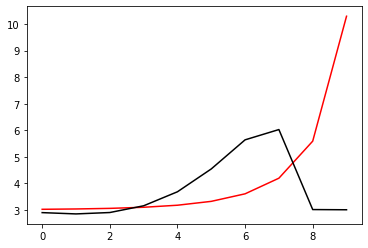

364100 0.04184721473117017
[2.89551307 2.85194721 2.90971462 3.17082067 3.7110928  4.59419144
 5.73287755 6.18191723 3.18426157 3.1733653 ]


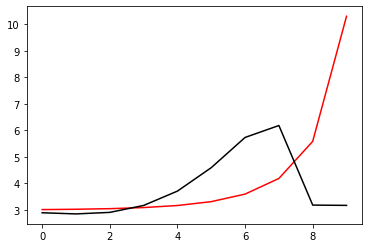

365200 0.030517530688120048
[2.90257086 2.84662853 2.893119   3.14411063 3.67512547 4.54885188
 5.67818164 6.12613023 3.14057623 3.12528618]


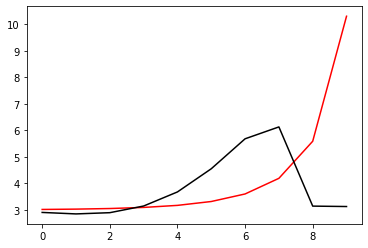

366300 0.12594648920997656
[2.94856521 2.89981886 2.95402998 3.2156014  3.76349327 4.66543929
 5.84194238 6.36730141 3.47266399 3.3690902 ]


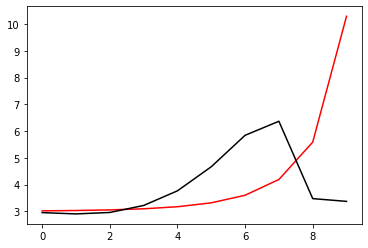

367400 0.014782868597405909
[2.81338897 2.76285257 2.8126319  3.06537922 3.5961913  4.46394398
 5.56995138 5.96422872 2.90526113 2.87443413]


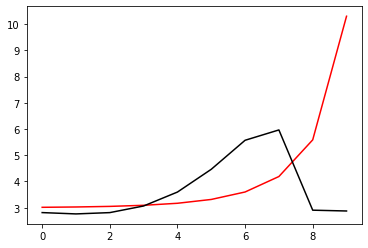

368500 0.01061425828125244
[2.90115956 2.85397849 2.90817451 3.1682785  3.71258457 4.60543176
 5.75509965 6.20111556 3.1503838  3.15003201]


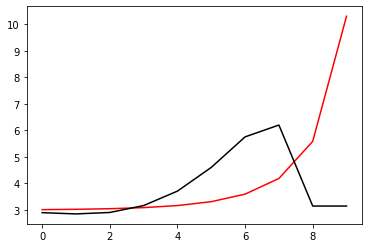

369600 0.07042748964791894
[2.72412608 2.6761585  2.72932371 2.98838983 3.53203496 4.42522124
 5.57986185 6.05059041 3.05023598 3.02083532]


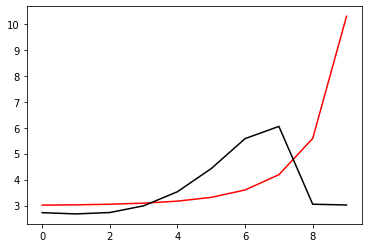

370700 0.0004364820070773785
[2.90430979 2.83885964 2.87728084 3.12545306 3.66314181 4.5561676
 5.7171322  6.20548037 3.22987155 3.15670984]


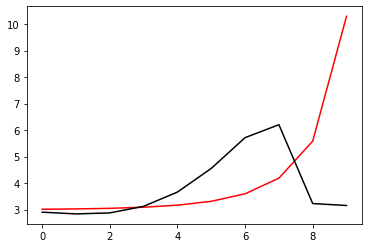

371800 0.031633680001943484
[2.86037974 2.80186403 2.84343683 3.0901363  3.61853638 4.48470248
 5.5736793  5.90195476 2.75359097 2.78324124]


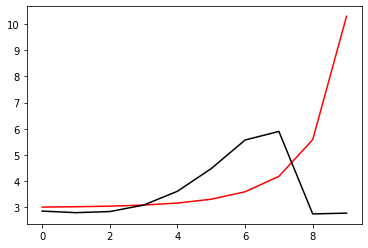

372900 0.038679825071039356
[2.88727848 2.83579182 2.88425401 3.13924026 3.68004965 4.56822461
 5.69924375 6.07972378 2.92282644 2.90439965]


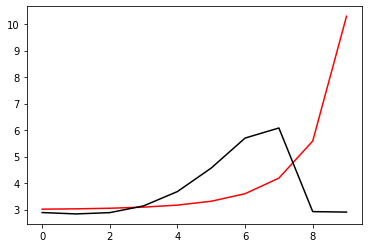

374000 0.01060404878740385
[2.899657   2.85315871 2.90673089 3.16835781 3.71987966 4.62768176
 5.79684138 6.23247481 3.0870655  3.09854387]


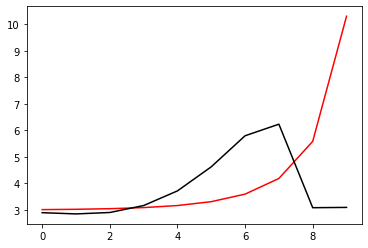

375100 0.042563348656030994
[2.90547959 2.84269185 2.88133648 3.12917391 3.66729968 4.56047762
 5.71370488 6.14256227 3.00400918 2.96450002]


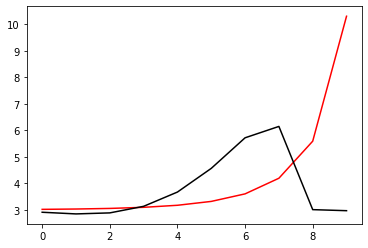

376200 0.03046471352026949
[2.90649009 2.84319587 2.88241694 3.13378061 3.6810109  4.5928876
 5.78148985 6.27720126 3.22861892 3.22182181]


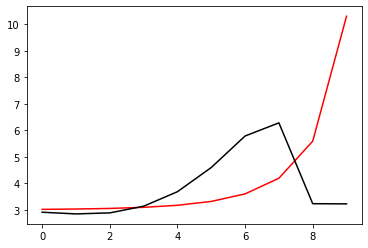

377300 0.04802101984228481
[2.90038796 2.84262496 2.88471275 3.13552559 3.6764516  4.56924443
 5.70352949 6.05069445 2.78472555 2.72805702]


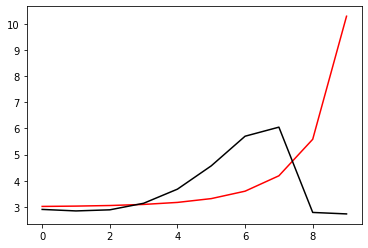

378400 0.01602378913000135
[2.91097002 2.86009279 2.90911497 3.16850096 3.72255342 4.63891702
 5.81883971 6.22867481 2.96997727 2.9203575 ]


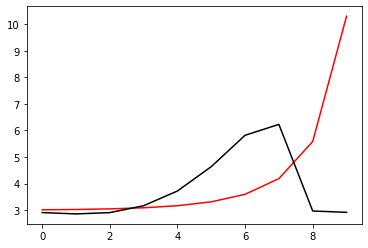

379500 0.0936990337132009
[2.7007088  2.65001643 2.69833903 2.95620651 3.50804817 4.42206359
 5.60507931 6.04494303 2.84473196 2.90200173]


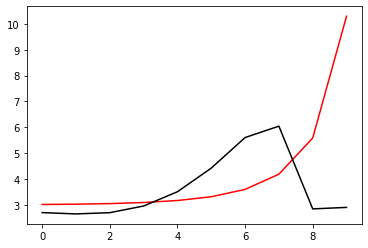

380600 0.020541060371607262
[2.85774971 2.79529517 2.83461027 3.08740896 3.63974437 4.56181013
 5.76251708 6.23378962 3.06534425 3.01320905]


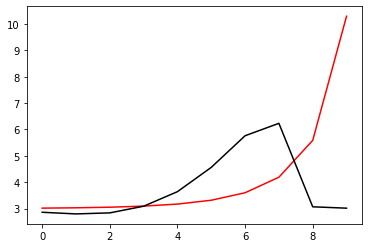

381700 0.021621495425745568
[2.77915343 2.72195202 2.76281674 3.01245719 3.55388954 4.44905025
 5.58851663 5.94950306 2.6506265  2.74590218]


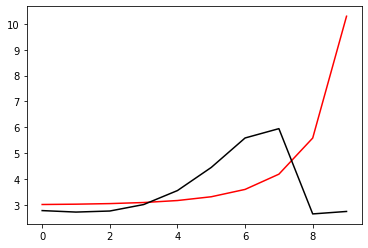

382800 0.03041621241627906
[2.89057651 2.82694355 2.86305753 3.11028993 3.65265443 4.55338903
 5.70318639 6.07196995 2.7610171  2.75146191]


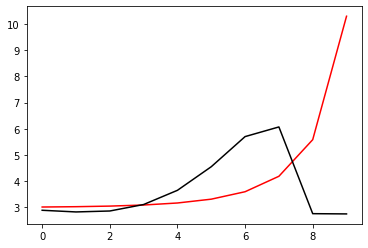

383900 0.03273727188739876
[2.92922302 2.87144698 2.91375953 3.16918222 3.72442744 4.64719814
 5.83427677 6.25336505 2.96857102 2.92050154]


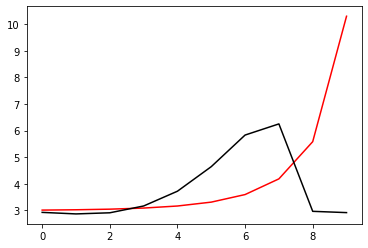

385000 0.010405757512466527
[2.92802216 2.84884127 2.87203248 3.11026558 3.64926806 4.5548116
 5.72265702 6.13060429 2.85081824 2.84290262]


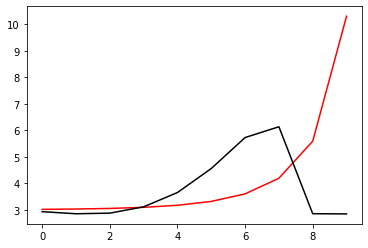

386100 0.041711524152528955
[2.92396543 2.84885471 2.877072   3.12369309 3.6777745  4.61028163
 5.8254409  6.31627872 3.15152914 3.13758686]


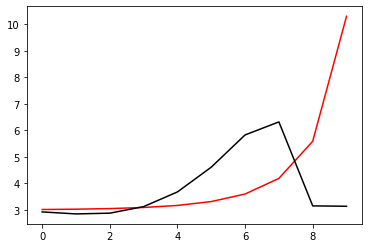

387200 0.031425230393187044
[2.91840298 2.84300529 2.86849238 3.10869154 3.64917677 4.55149297
 5.69427091 6.0250419  2.65693702 2.61808466]


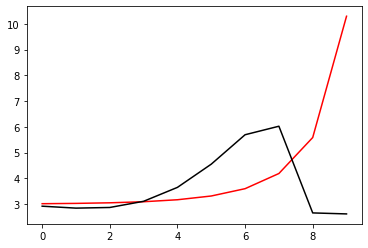

388300 0.03751630917617074
[2.95680811 2.88834844 2.92082705 3.16964371 3.72302108 4.647507
 5.82971448 6.20730903 2.83637736 2.77721852]


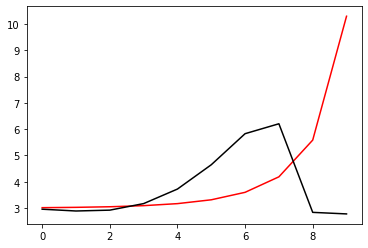

389400 0.059892785694966075
[2.72239669 2.65779057 2.69325248 2.94493345 3.5022539  4.43472662
 5.63988557 6.08319793 2.80645823 3.00816181]


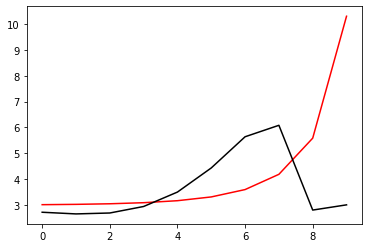

390500 0.03730811921920249
[2.80378101 2.71939951 2.73811487 2.97648654 3.52394896 4.44928068
 5.64826056 6.08906106 2.81218311 2.88731726]


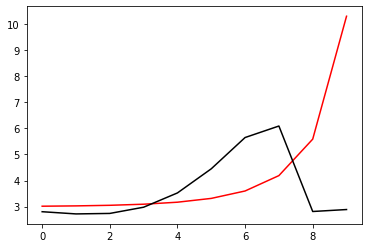

391600 0.027480896576888555
[2.87844871 2.78296643 2.78825043 3.00943364 3.53133823 4.41142875
 5.52103179 5.8051241  2.34371796 2.54818595]


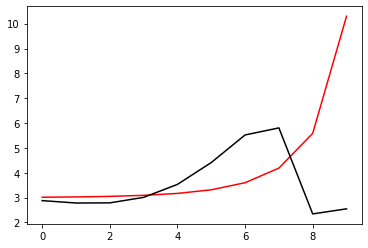

392700 0.002559001176555176
[2.92465668 2.83186313 2.83991245 3.06511917 3.59397399 4.48676209
 5.6186124  5.93042027 2.47372973 2.44128357]


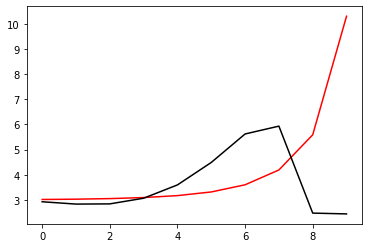

393800 0.030451440951522604
[2.9473799  2.85988401 2.87361831 3.10680816 3.6488579  4.56534345
 5.73997767 6.11302975 2.68881177 2.68886451]


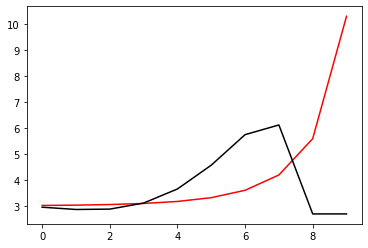

394900 0.07117047219537831
[2.81016704 2.71724903 2.72431045 2.94973406 3.48239743 4.38681568
 5.54667429 5.90531606 2.4599073  2.4241896 ]


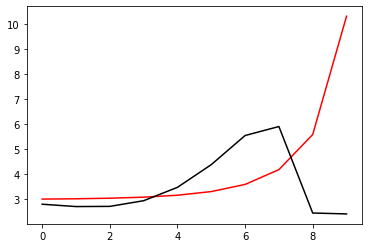

396000 0.010418927189870832
[2.96091725 2.86404751 2.86714621 3.08982552 3.62188144 4.52835285
 5.69305547 6.06407267 2.63848567 2.63555705]


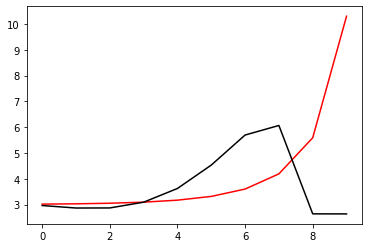

397100 0.05271834906069126
[2.88351202 2.78247659 2.78033704 2.99667037 3.52017025 4.41293433
 5.55358714 5.88843123 2.41241886 2.34952832]


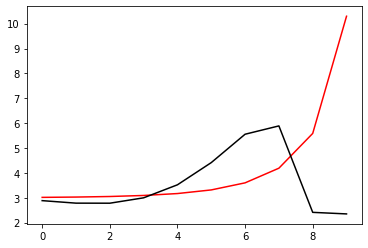

398200 0.030638769964513264
[2.9662398  2.8692992  2.87074188 3.09171214 3.62267805 4.5278718
 5.68842565 6.05596287 2.62234857 2.60062137]


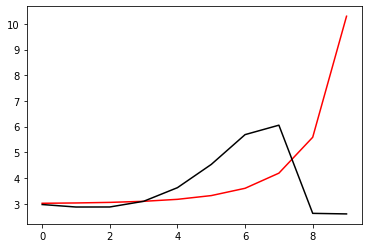

399300 0.08150966132235593
[3.01411623 2.91992298 2.92460682 3.15100843 3.6915971  4.6131585
 5.8000642  6.21050543 2.82973056 2.70872985]


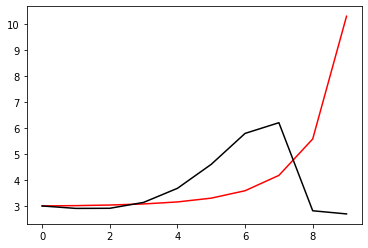

400400 0.01017377758297237
[2.93866726 2.8267649  2.81394227 3.02350552 3.54741908 4.45079168
 5.61625481 6.00855372 2.62368509 2.61039936]


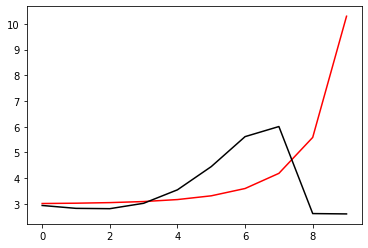

401500 0.06443061416959157
[2.81113304 2.70981273 2.70341541 2.9147784  3.4333604  4.31765851
 5.4378035  5.75672916 2.30284464 2.67364062]


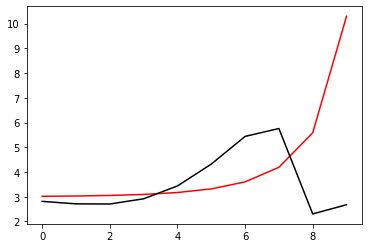

402600 0.028916162538172106
[2.87662347 2.77532774 2.76917548 2.98164928 3.50293269 4.39226301
 5.51933071 5.84211206 2.38023908 2.37199691]


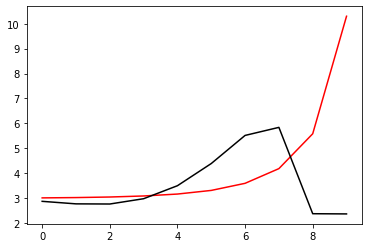

403700 0.0017654999622483906
[2.92992738 2.83438298 2.83396923 3.05395806 3.58715629 4.49693604
 5.65768209 6.02182688 2.57900897 2.54293844]


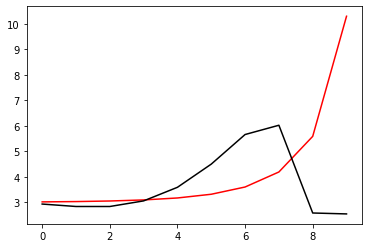

404800 0.030564135221765223
[2.89986181 2.81162575 2.81888963 3.04910918 3.59851867 4.53631849
 5.74598808 6.18404833 2.80612517 2.77642112]


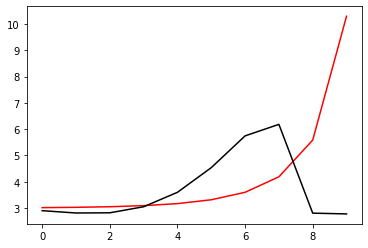

405900 0.04221823930848411
[2.91564364 2.83032617 2.83790467 3.06534424 3.60692689 4.52586916
 5.68975795 6.02786031 2.50060081 2.460877  ]


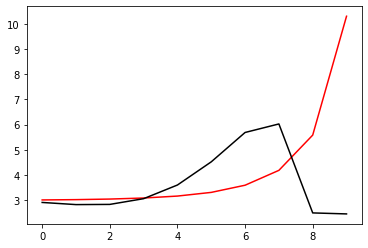

407000 0.010749105885171566
[2.95345598 2.87383952 2.88755803 3.12309484 3.67739281 4.61830577
 5.82081674 6.21552922 2.72291043 2.71953497]


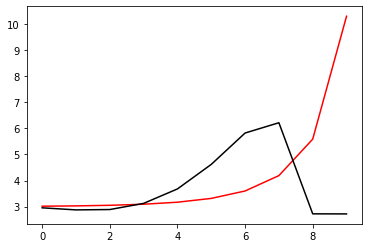

408100 0.043086017529649794
[2.93625844 2.85026759 2.85843347 3.08985664 3.64226817 4.58455754
 5.79484702 6.21466575 2.76287811 2.72025046]


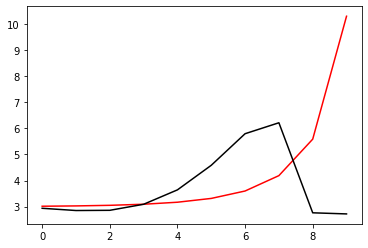

409200 0.03052731917971083
[2.92648577 2.84260903 2.85359488 3.09031724 3.653253   4.61551602
 5.86290189 6.35336026 3.00448284 2.99421408]


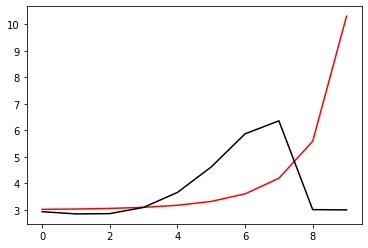

410300 0.04222038018809551
[2.94555098 2.85529039 2.86015061 3.09077437 3.64668677 4.59816701
 5.82475919 6.27692514 2.86081776 2.76803996]


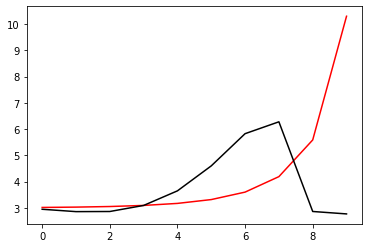

411400 0.07271976586631183
[2.69787934 2.61951701 2.6351563  2.87689829 3.4467008  4.41862077
 5.67923234 6.19360715 2.86838244 3.10816708]


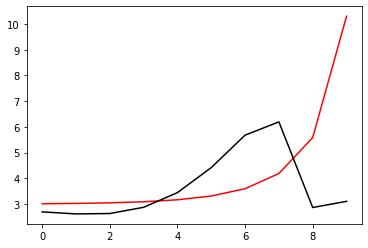

412500 0.01391338646404483
[3.0077254  2.89731763 2.88313948 3.09722013 3.64000945 4.58114184
 5.79907041 6.25567616 2.86209045 2.97413131]


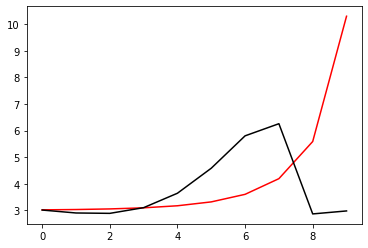

413600 0.028722330731071652
[2.87834529 2.7722967  2.75913668 2.96963207 3.5008979  4.41468802
 5.57386675 5.92912451 2.41840252 2.5931514 ]


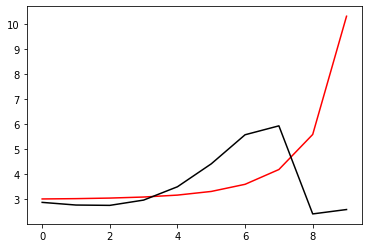

414700 0.010122038649305654
[2.87822621 2.77863295 2.77144561 2.98867852 3.52936033 4.45854635
 5.64482878 6.04351816 2.57084684 2.55944881]


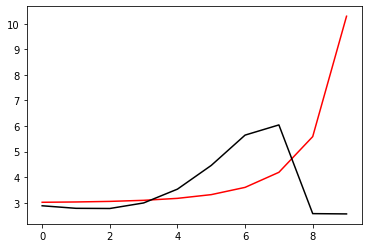

415800 0.030432421144139885
[2.93000266 2.83666913 2.83553571 3.06029139 3.61253224 4.56134202
 5.7812261  6.22973615 2.79289875 2.78929502]


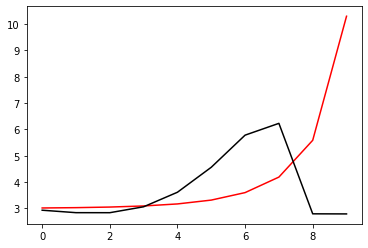

416900 0.04999983897137203
[2.87411347 2.7907694  2.79563655 3.02146328 3.56700319 4.49272456
 5.64821271 5.94934963 2.33825451 2.34892942]


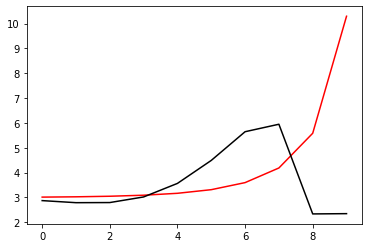

418000 0.010415792521850655
[2.92176432 2.84236643 2.851429   3.08297496 3.63819474 4.58233966
 5.77349646 6.11721474 2.49679662 2.4863035 ]


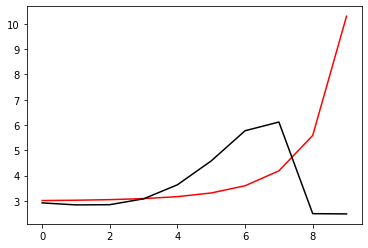

419100 0.04253015859319089
[2.93331928 2.85973273 2.87531291 3.11569918 3.68546919 4.65674286
 5.90124317 6.32147782 2.72195403 2.70470175]


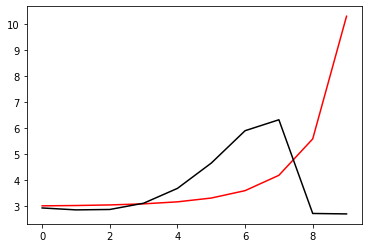

420200 0.03977659761896035
[2.87085191 2.78268609 2.78546902 3.01493029 3.57587721 4.54096534
 5.78570882 6.22439206 2.66635441 2.63712831]


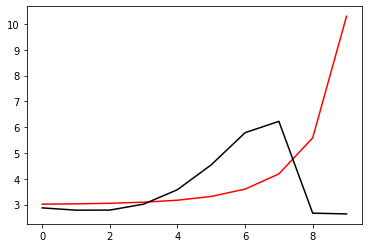

421300 0.1332376194005591
[2.98304551 2.90727558 2.92131326 3.16255736 3.73846416 4.72494106
 6.00100116 6.48623326 2.97781971 2.87335648]


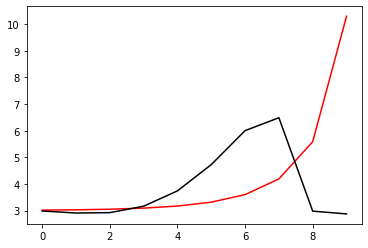

422400 0.01352795261259435
[2.85094932 2.77587131 2.78756737 3.02159844 3.58145457 4.53365958
 5.73606205 6.08075659 2.4007889  2.37305261]


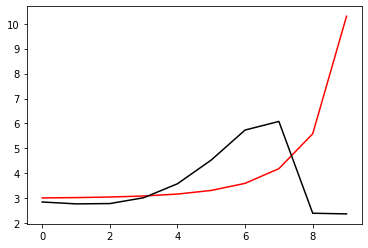

423500 0.010693155356018478
[2.93125482 2.85968414 2.87621077 3.11808744 3.69219232 4.67129216
 5.92178549 6.32220887 2.64704276 2.64399826]


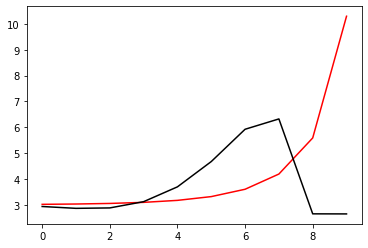

424600 0.06753380608645271
[2.76053054 2.68850415 2.70444474 2.94555251 3.51907497 4.4986421
 5.75534724 6.18441294 2.5641223  2.53880265]


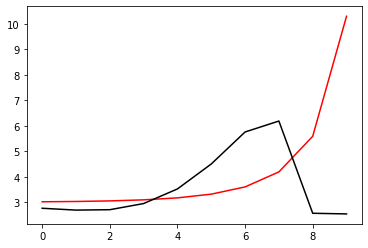

425700 0.0005335383356492014
[2.91129112 2.82950696 2.83848323 3.07663969 3.65336236 4.6452995
 5.92763255 6.40173924 2.83294537 2.75842211]


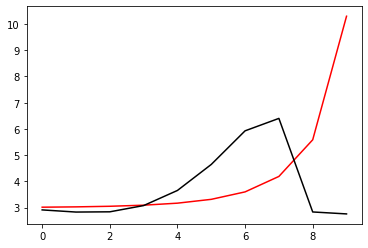

426800 0.038025624063194846
[2.84151278 2.76334049 2.77255217 3.00592999 3.56902321 4.52834391
 5.735714   6.07167571 2.35591835 2.39427963]


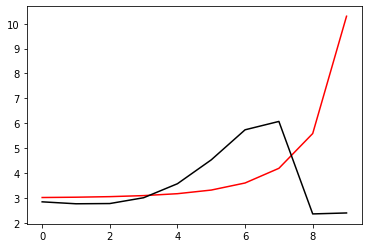

427900 0.039776612285524614
[2.90440329 2.82887952 2.84138985 3.07997873 3.65260947 4.63017556
 5.870575   6.24481143 2.53021478 2.50160146]


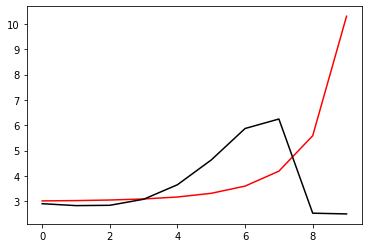

429000 0.010708438768446238
[2.92513386 2.8549171  2.87307091 3.11885648 3.7027449  4.7000914
 5.97594318 6.39966093 2.70834786 2.71805957]


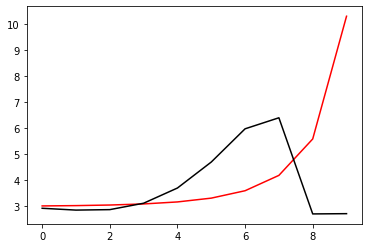

430100 0.042786342117405035
[2.92436024 2.84043718 2.84635498 3.08111536 3.65480776 4.64186541
 5.90790208 6.33241137 2.65685439 2.61754511]


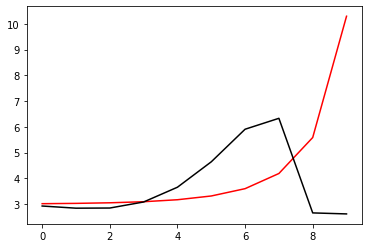

431200 0.03055085575946102
[2.91991698 2.8390279  2.84897717 3.09046021 3.67656578 4.6865198
 5.99424062 6.49455969 2.92064349 2.91802636]


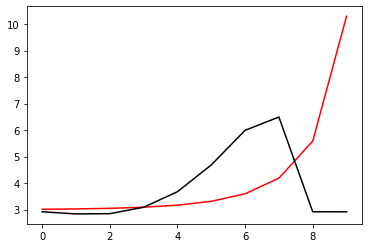

432300 0.05040972146211286
[2.82728092 2.75128545 2.76270964 3.00067879 3.5746393  4.55462552
 5.79287174 6.15722165 2.42042644 2.39948797]


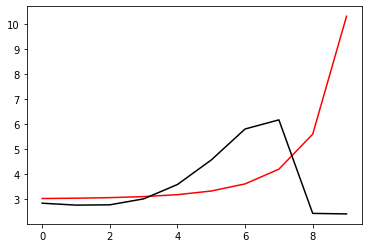

433400 0.01616449639750635
[2.92920531 2.85716466 2.87397452 3.12067865 3.71053165 4.72071442
 6.0130803  6.43577631 2.69214149 2.64201533]


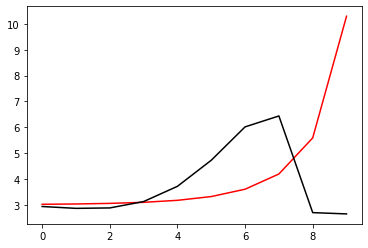

434500 0.08765755376009517
[2.73678207 2.66311933 2.67793458 2.92197636 3.50842075 4.51460182
 5.80676009 6.25327692 2.56510554 2.62772614]


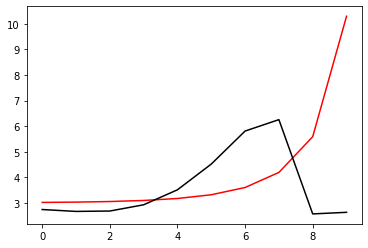

435600 0.020614618557162793
[2.89482831 2.80028643 2.79765932 3.02807827 3.60512557 4.60608469
 5.89679935 6.35080733 2.67878715 2.64192717]


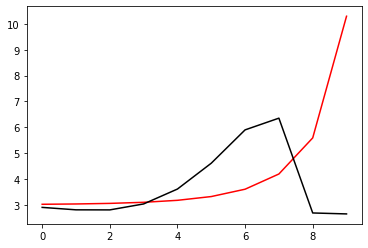

436700 0.020331834342736194
[2.81047552 2.72282659 2.72328823 2.95187265 3.51909327 4.49425268
 5.72651362 6.07886956 2.29012309 2.3887457 ]


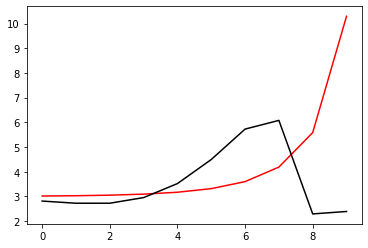

437800 0.03049710755914471
[2.92756155 2.83283865 2.82776102 3.05286864 3.61939507 4.59736864
 5.83513548 6.1890662  2.38681848 2.37849336]


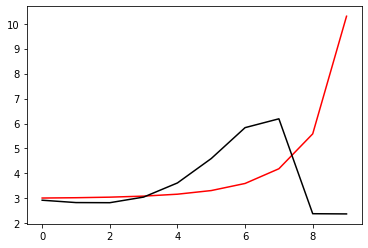

438900 0.03317441502425541
[2.96319901 2.87464372 2.87613942 3.10973113 3.68928083 4.6893132
 5.96435952 6.36869314 2.59679404 2.55324203]


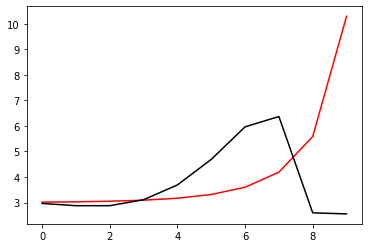

440000 0.010426650254589024
[2.91413957 2.81874549 2.81382091 3.04146909 3.6154037  4.60968747
 5.88000418 6.29093704 2.54161751 2.53122975]


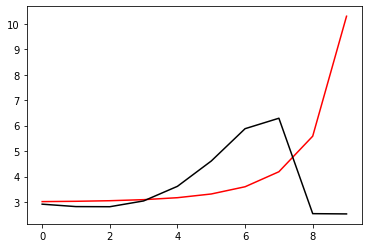

441100 0.04173998289996666
[2.93238466 2.84406546 2.84694154 3.08514694 3.67575316 4.69816172
 6.01644772 6.50751213 2.86011187 2.84559227]


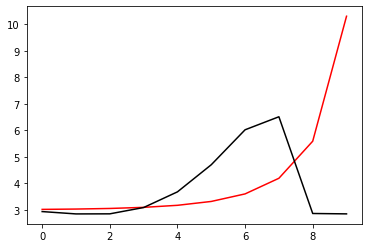

442200 0.03174510704148929
[2.92387574 2.83565396 2.83629232 3.06846236 3.64567873 4.63779108
 5.8830921  6.21426027 2.36913725 2.32795146]


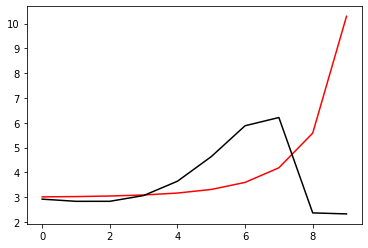

443300 0.03558723085482656
[2.95578097 2.87573978 2.88454814 3.12631066 3.71732508 4.73286172
 6.02004927 6.40062118 2.55489347 2.49296931]


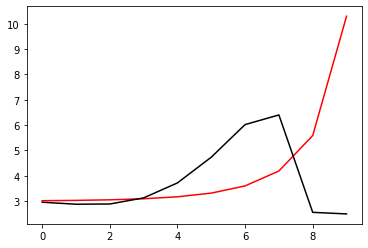

444400 0.06842287446972029
[2.69965038 2.62356631 2.63547817 2.87978047 3.47372844 4.49530003
 5.80216437 6.24052105 2.47806119 2.71996434]


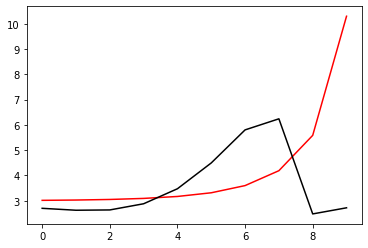

445500 0.010480116168643815
[2.85945972 2.77212654 2.77546973 3.01455129 3.60767112 4.63393235
 5.95200131 6.41141095 2.67057616 2.68326796]


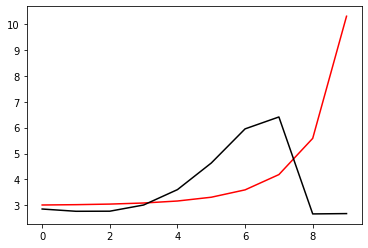

446600 0.027642864394236466
[2.84451395 2.76012733 2.76321709 2.99751404 3.57779669 4.5731877
 5.81802709 6.14028259 2.25720119 2.47495792]


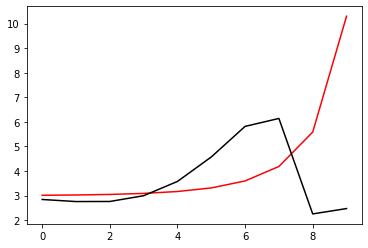

447700 0.006973395626002498
[2.86252035 2.78361794 2.79205754 3.03273884 3.62262829 4.63502773
 5.91130775 6.27486374 2.40301307 2.3770968 ]


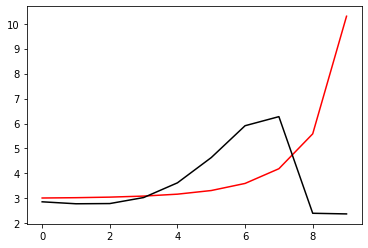

448800 0.030582439248689326
[2.9124987  2.83856189 2.85249504 3.10063365 3.70284427 4.73776332
 6.05477852 6.4689469  2.60705412 2.6081917 ]


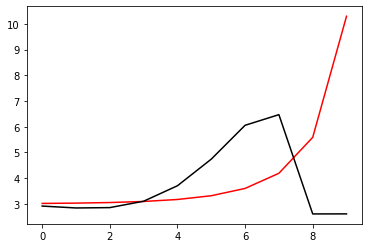

449900 0.038571391968445515
[2.92372105 2.83266732 2.83118985 3.06491846 3.65263614 4.67091403
 5.96824894 6.36889964 2.50504445 2.46036504]


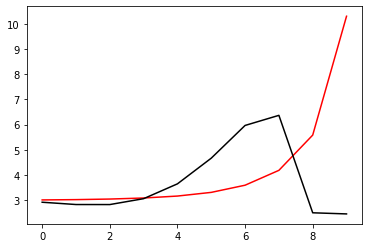

451000 0.040665341989252174
[2.82145447 2.68857252 2.64765238 2.84348106 3.39229983 4.36571901
 5.6058672  5.938927   2.01352937 2.01990415]


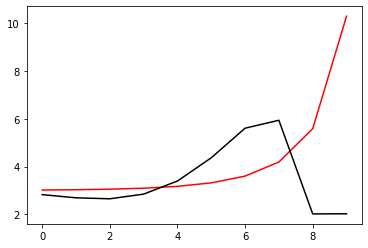

452100 0.051659767235330924
[2.94878771 2.80946668 2.76252832 2.95377297 3.50003862 4.47334013
 5.71632379 6.05884231 2.15206184 2.10060832]


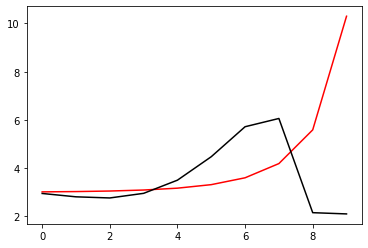

453200 0.0306805324644025
[3.01419545 2.88094117 2.83854533 3.03437942 3.58646158 4.56786853
 5.82261256 6.18689668 2.31546574 2.31071184]


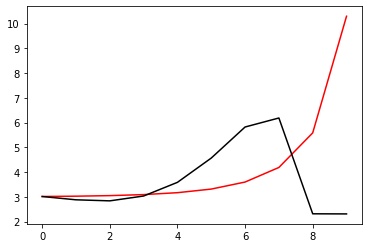

454300 0.06015992853899086
[2.95829285 2.80976509 2.75158099 2.93026642 3.46134865 4.41322288
 5.62399965 5.93074086 1.99343042 1.98824585]


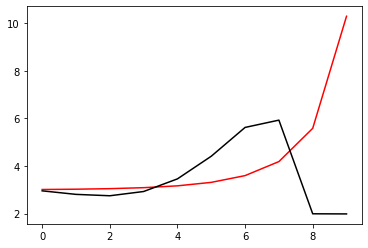

455400 0.025539895425336107
[2.85372671 2.72162076 2.67870878 2.87334847 3.42323049 4.39984787
 5.6454294  6.00371582 2.13578861 2.25521539]


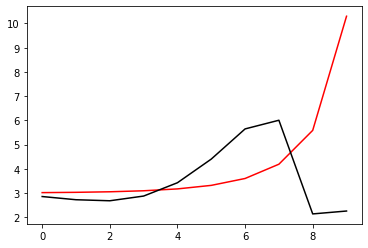

456500 0.09147991963497726
[2.81880321 2.67802819 2.62579618 2.81069209 3.34952688 4.31157014
 5.53621155 5.87130434 1.98252113 2.08202207]


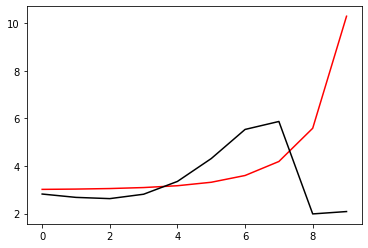

457600 0.020798644303933578
[2.96890341 2.83100218 2.78079415 2.96817477 3.51109246 4.479928
 5.71547308 6.07149664 2.21590624 2.18793353]


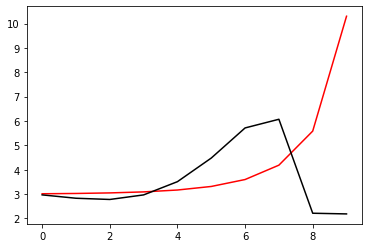

458700 0.017175373260362985
[2.87073537 2.73769981 2.68984406 2.87605046 3.4115424  4.36084399
 5.55568911 5.85063806 1.92900752 2.00539431]


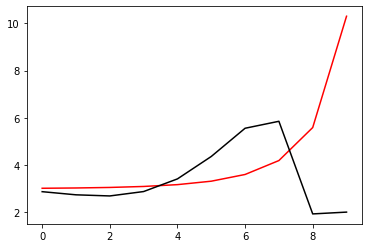

459800 0.03086807718878585
[3.00291806 2.86062957 2.80494226 2.98509267 3.51632908 4.4626075
 5.65359236 5.94144125 2.00831225 1.99227378]


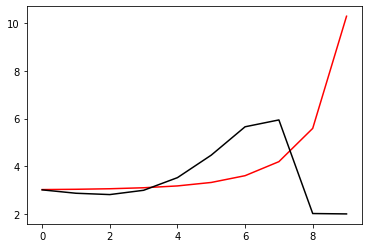

460900 0.03890198696872253
[3.02227166 2.88645758 2.83729311 3.02576471 3.56943361 4.53575325
 5.75845959 6.09017086 2.19894853 2.18425379]


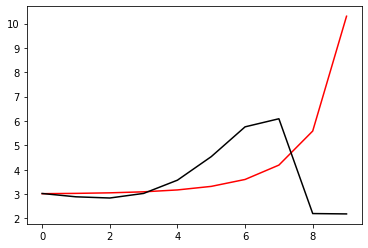

462000 0.01064521535472141
[2.95689473 2.81754336 2.76377407 2.94714147 3.48521758 4.44501542
 5.66040916 5.98868701 2.09927219 2.04680035]


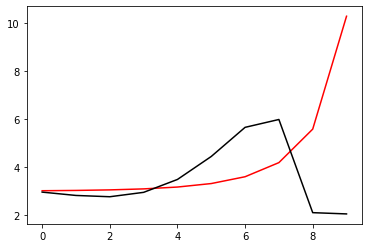

463100 0.04525913186633675
[3.01709211 2.88661549 2.84104109 3.0337025  3.58439078 4.56306192
 5.80747213 6.18187898 2.35489365 2.29389533]


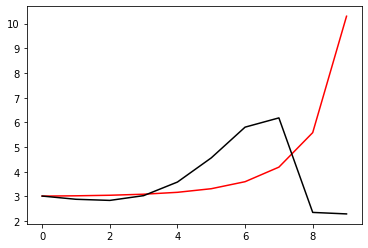

464200 0.04045546117562313
[2.96301872 2.82139771 2.76372036 2.94153122 3.4708043  4.41411781
 5.59818432 5.88331853 1.94953998 1.93254596]


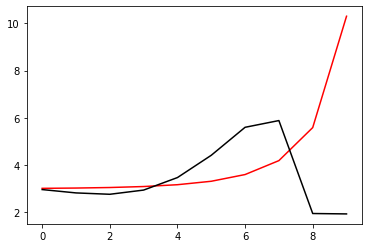

465300 0.04039848967272699
[3.0620246  2.92657195 2.87489231 3.05996226 3.59950316 4.55820377
 5.7640183  6.07528174 2.16293168 2.09586231]


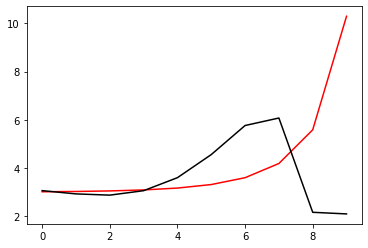

466400 0.09510161972413891
[2.71249288 2.59012159 2.55073039 2.74900306 3.30520715 4.28823107
 5.5326059  5.90407061 2.06663681 2.40076646]


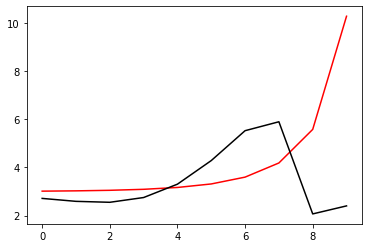

467500 0.01046525779302372
[2.9312924  2.79559498 2.74200703 2.92487295 3.46293127 4.42176543
 5.63180315 5.96085838 2.07823195 2.0806485 ]


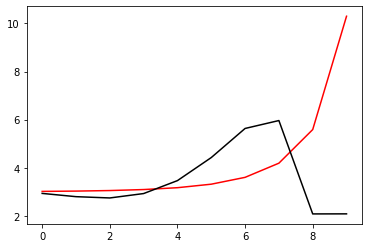

468600 0.08118032301054925
[2.75146935 2.62285903 2.57526651 2.7638451  3.30813795 4.27443392
 5.49421927 5.84007763 1.98281292 2.04837887]


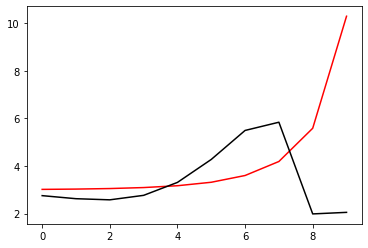

469700 0.0038616356525777336
[2.99047433 2.85144489 2.79317468 2.97116981 3.50467138 4.45874547
 5.66354648 5.99530077 2.12965362 2.09427102]


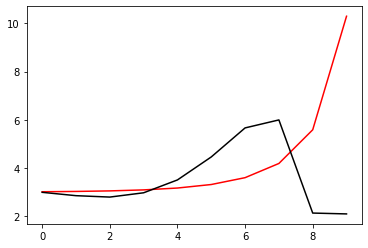

470800 0.10136559561505337
[2.82030536 2.68356803 2.62663168 2.80546079 3.33946889 4.29345205
 5.49763316 5.83298814 1.97852178 1.98928926]


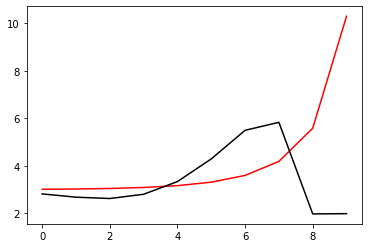

471900 0.03985118448853143
[3.02915778 2.88816874 2.82650941 3.0011152  3.53211203 4.48471793
 5.69004757 6.03484996 2.20442473 2.18449977]


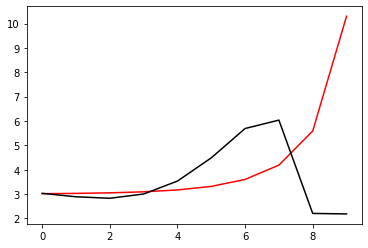

473000 0.02630524886017612
[2.87945394 2.73167549 2.66298087 2.83017383 3.35255341 4.29362777
 5.48300082 5.8111295  1.96709219 1.9621199 ]


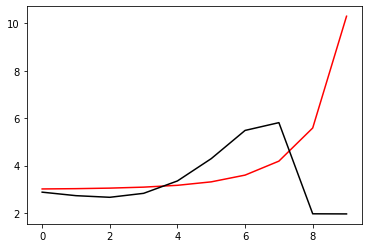

474100 0.04897466708898542
[3.06394151 2.90864962 2.83236492 2.99268161 3.50915814 4.44508668
 5.6300591  5.95865235 2.124607   2.07416464]


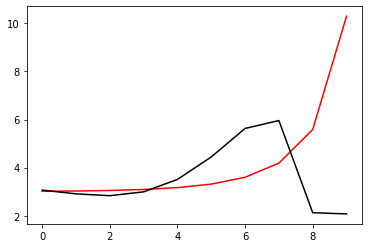

475200 0.030798909224765587
[3.05592508 2.90891986 2.83944509 3.00591818 3.52855818 4.47104879
 5.66358753 6.00566336 2.19467557 2.1793724 ]


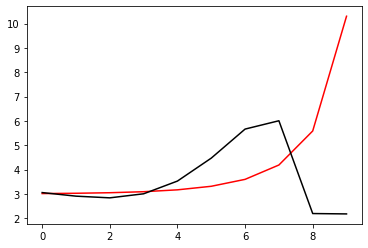

476300 0.05921156483460127
[2.99868033 2.85653683 2.79139838 2.96214335 3.48929503 4.43660499
 5.63484465 5.9888281  2.20050378 2.18630289]


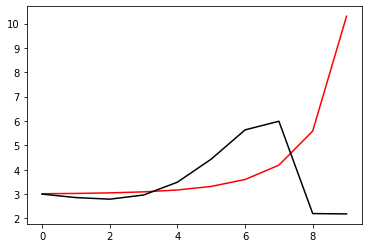

477400 0.21192184656516222
[2.66423893 2.53882786 2.49064928 2.68007539 3.23031064 4.20912154
 5.45292201 5.87517653 2.17858066 2.60987829]


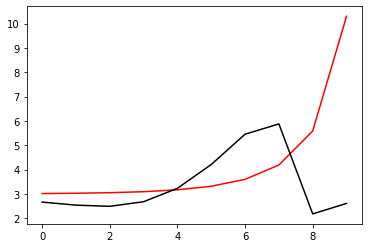

478500 0.010424833613487883
[2.98528669 2.84357169 2.77817052 2.94711956 3.46897918 4.40264769
 5.57108827 5.88194079 2.05588606 2.04692172]


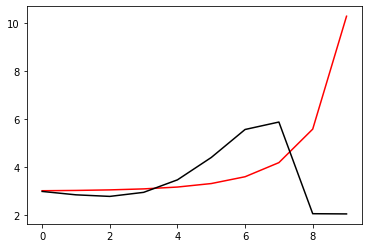

479600 0.02045198457741937
[3.02343146 2.88708746 2.82754184 3.00434595 3.53836984 4.49198615
 5.69184479 6.0438838  2.2547464  2.25743102]


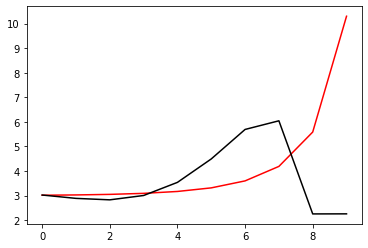

480700 0.010515016629617973
[2.90209527 2.77071401 2.71430282 2.89268897 3.42679841 4.3787085
 5.57545637 5.92757128 2.14458176 2.1743621 ]


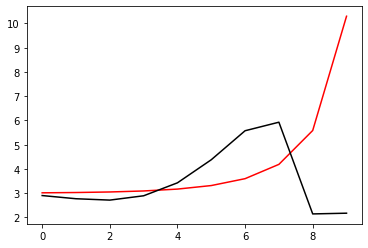

481800 0.030471559306156696
[3.00117257 2.87711406 2.82781397 3.01451487 3.56039947 4.53054389
 5.75552489 6.14963383 2.41740381 2.41488359]


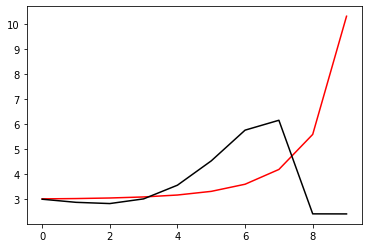

482900 0.050497863959565514
[2.90352006 2.77975236 2.72887737 2.9105131  3.44468565 4.38950603
 5.56330523 5.87400022 2.04317377 2.04647902]


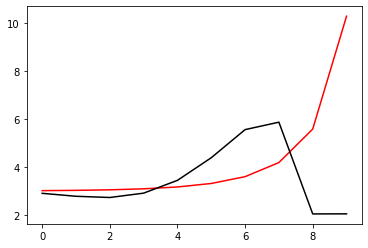

484000 0.011878588498259629
[2.91608127 2.79779793 2.75224407 2.9399671  3.48259624 4.44072483
 5.63564408 5.97427208 2.16660328 2.13479312]


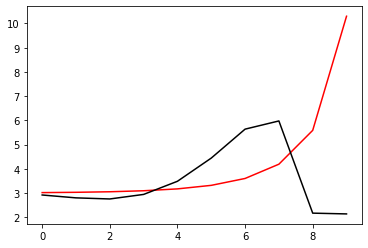

485100 0.04542791366295736
[2.98766178 2.87446194 2.8342638  3.02904415 3.58292283 4.56006066
 5.78510981 6.16106052 2.37980589 2.33616982]


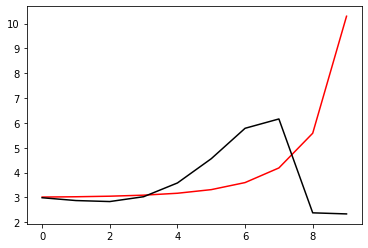

486200 0.030651376112254707
[2.9908886  2.87937651 2.84056096 3.03719629 3.59477678 4.57917865
 5.81762809 6.21725879 2.46524862 2.45943474]


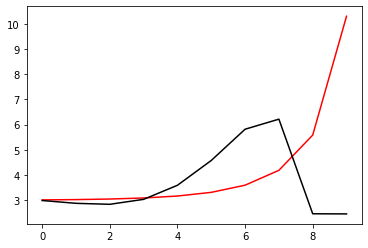

487300 0.059189340821683006
[2.94636818 2.82600981 2.77911462 2.96869318 3.52066784 4.50126422
 5.7391827  6.14776582 2.41874744 2.40345778]


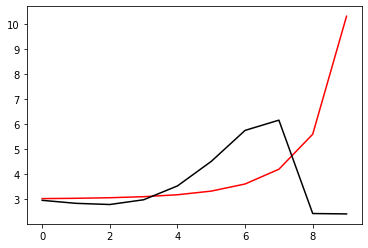

488400 0.27571175184117824
[2.63097801 2.52133045 2.48503277 2.68593277 3.25186831 4.25188364
 5.51913376 5.97540512 2.31391589 2.74755966]


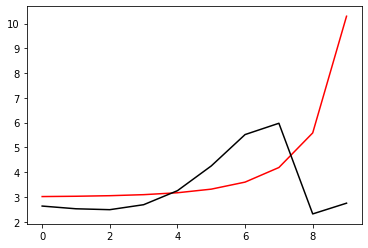

489500 0.01049710686044752
[2.88737096 2.77635687 2.7358926  2.92790564 3.4762767  4.4415017
 5.64084897 5.98284805 2.18289436 2.17844697]


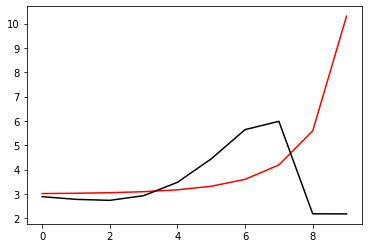

490600 0.021149274625570934
[2.92462799 2.8183471  2.78282602 2.98107736 3.53909877 4.52082767
 5.74767745 6.12447233 2.34582122 2.321334  ]


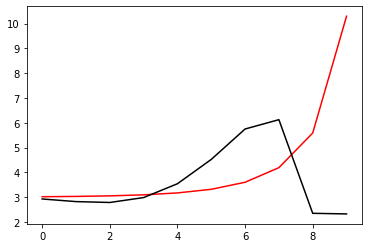

491700 0.0005957420238685917
[2.94550626 2.84571392 2.81798705 3.02716535 3.60313868 4.61659838
 5.89828513 6.35044061 2.62973332 2.57828824]


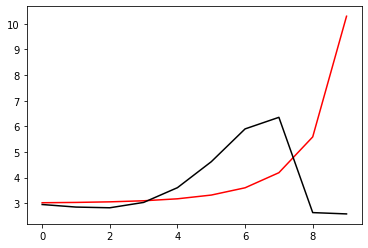

492800 0.037860820155238166
[2.88250203 2.79146913 2.76865104 2.97717031 3.5434154  4.52841781
 5.73783705 6.04024586 2.15379582 2.18260312]


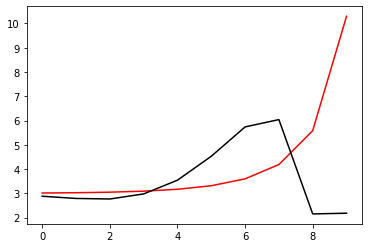

493900 0.040199651459271235
[2.93234352 2.84564735 2.82760872 3.04237972 3.61878751 4.62267772
 5.86763243 6.21107862 2.3195163  2.28862383]


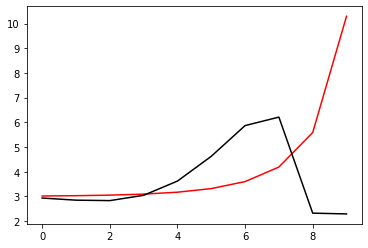

495000 0.010782363223650865
[2.95352584 2.87236936 2.86075581 3.0838098  3.67326331 4.70084557
 5.99095269 6.39605054 2.52316596 2.52916227]


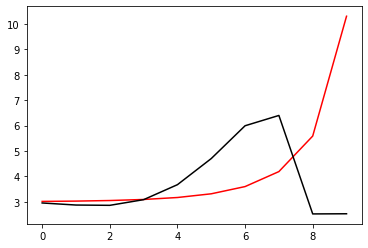

496100 0.04687228585681321
[2.89024307 2.79355205 2.76848959 2.97951605 3.55809978 4.57597404
 5.86122938 6.27807296 2.43591064 2.35176848]


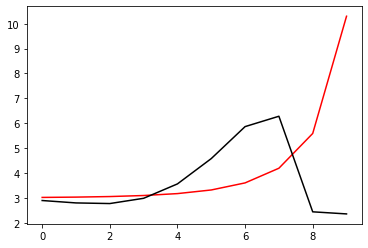

497200 0.03061719663525599
[2.94464361 2.85749914 2.84148209 3.06179476 3.65206758 4.68710595
 5.99963603 6.46224168 2.67888685 2.67854619]


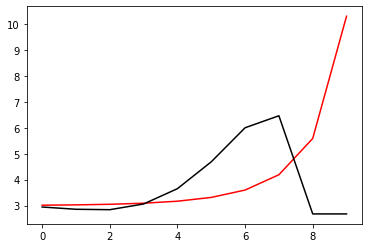

498300 0.0513312779304959
[2.87154113 2.77948726 2.75666559 2.96596792 3.53664427 4.53400269
 5.77288005 6.11134153 2.17719028 2.16415081]


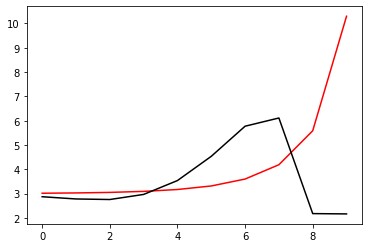

499400 0.01849477286361271
[2.96293201 2.87583373 2.85914731 3.07712055 3.66187618 4.68343533
 5.9614396  6.34583172 2.43386646 2.3871738 ]


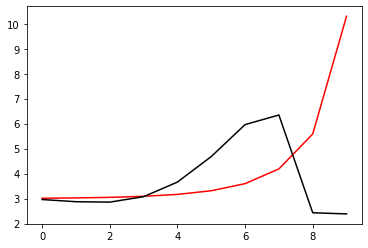

In [13]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for j in range (5000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, Positive[j%10], Negative[j%10])
        gradients=g.gradient(loss, [h])
    for i in range (100):
        optimizer.apply_gradients(zip(gradients, [h]))
    if j%11==0: 
        print(j*100, Error_func(h, Positive[j%10], Negative[j%10]).numpy()), print(h.numpy())
        plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

0 0.010033396681396977
[2.8694279  2.78418631 2.76922081 2.98881649 3.57544433 4.5995434
 5.88137059 6.27248895 2.36862795 2.450218  ]


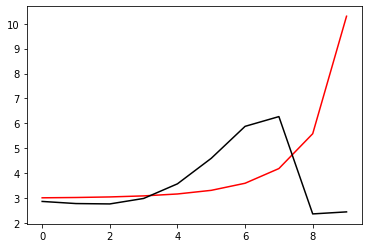

1100 0.04279845679858926
[2.93162846 2.8594088  2.85696941 3.08777743 3.68413568 4.71331318
 5.99328551 6.38402283 2.48759831 2.46097433]


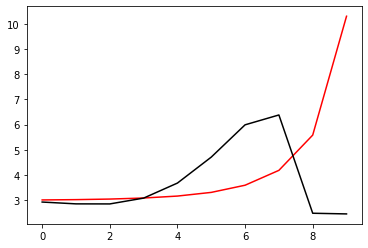

2200 0.040794549396609356
[2.85924005 2.76993625 2.75003778 2.96084788 3.53150622 4.52419374
 5.75176406 6.07655296 2.10741911 2.09649368]


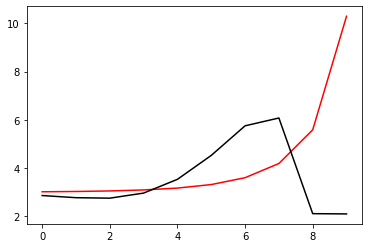

3300 0.03812118345440817
[2.97512234 2.89015649 2.87480243 3.09077578 3.66814725 4.67019648
 5.91079257 6.25407146 2.30982312 2.25592781]


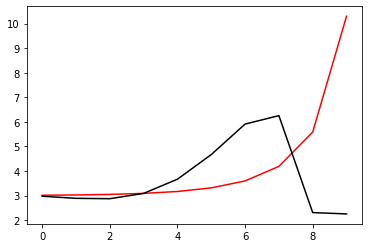

4400 0.06415259126656322
[2.72061214 2.64375265 2.6370701  2.86296843 3.45349587 4.47504064
 5.7461167  6.13810894 2.26412903 2.47596325]


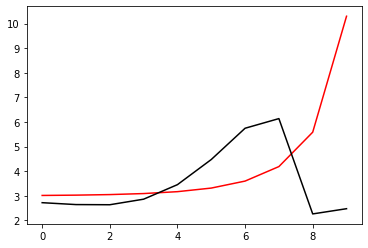

5500 0.010477792651790151
[2.86612793 2.78435776 2.7749183  3.0006084  3.59478801 4.62582121
 5.91539809 6.34149528 2.51931869 2.52905576]


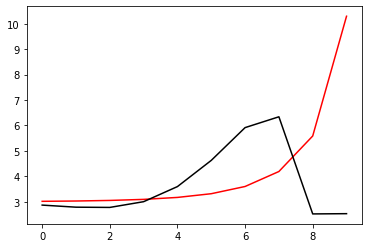

6600 0.026156202752152018
[2.85582433 2.78133219 2.77575894 2.99995622 3.58350487 4.58432266
 5.79759744 6.07294872 2.10614264 2.30936404]


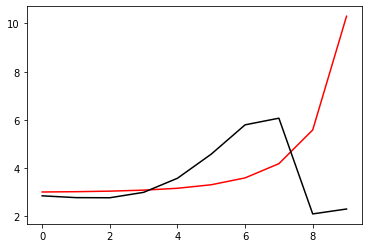

7700 0.0014902817380303694
[2.89909512 2.82705794 2.82458182 3.05322354 3.64445782 4.66011723
 5.90213935 6.21118888 2.23917293 2.20455573]


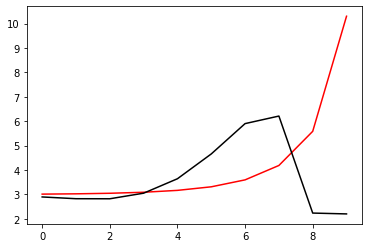

8800 0.030571542283611468
[2.92073927 2.85285702 2.85549002 3.0910231  3.69356534 4.73057741
 6.0148675  6.38286192 2.42688143 2.42761324]


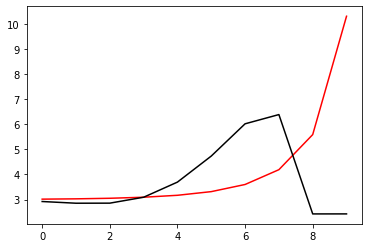

9900 0.04808700678118208
[2.87034474 2.7911501  2.78429025 3.01114851 3.60534108 4.6342952
 5.91441641 6.28957442 2.34488469 2.32477793]


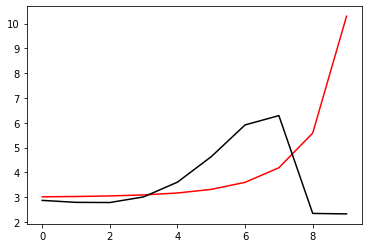

11000 0.01069470889243735
[2.90440854 2.84312796 2.85396141 3.0997027  3.71767712 4.7814972
 6.11644234 6.57434936 2.72179972 2.72035264]


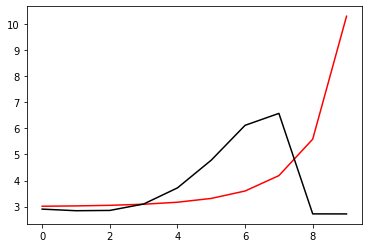

12100 0.04518425038923648
[2.88613623 2.82076845 2.82623835 3.06298224 3.66419949 4.69323795
 5.94979608 6.25133143 2.22078223 2.18997072]


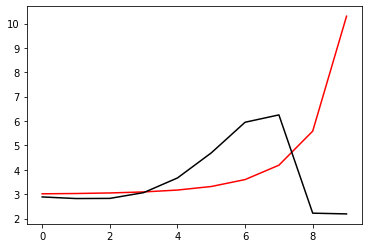

13200 0.03066576964423236
[2.90318789 2.8449221  2.85760838 3.1024915  3.71506204 4.76326051
 6.05443446 6.39945189 2.37794266 2.36724234]


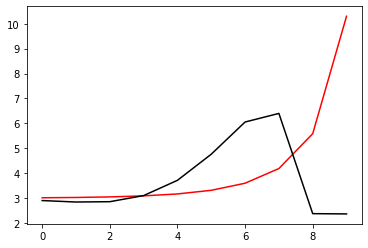

14300 0.06618901594553403
[2.93750648 2.88552    2.9055549  3.15960784 3.78609305 4.85876752
 6.19433077 6.59718754 2.59487505 2.5180954 ]


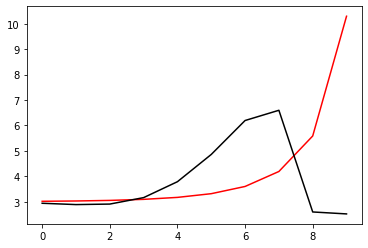

15400 0.010314626828125352
[2.83767903 2.77140549 2.77978349 3.02368698 3.64078618 4.70422101
 6.03433537 6.45969942 2.52841991 2.5597179 ]


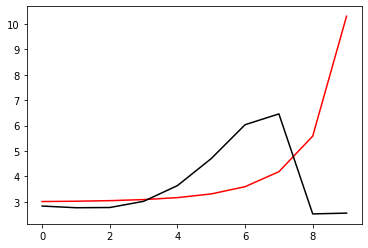

16500 0.07451882917290498
[2.75191044 2.6895397  2.69918978 2.9398852  3.54624837 4.58378683
 5.85672674 6.18565459 2.1564908  2.5440754 ]


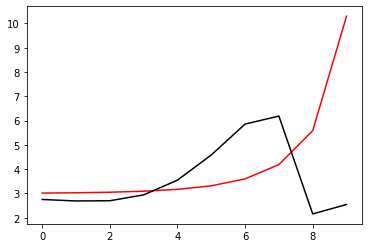

17600 0.021866511561880922
[2.84706993 2.7822051  2.79065827 3.03177491 3.64118662 4.68600886
 5.97088939 6.30600044 2.26095934 2.23093898]


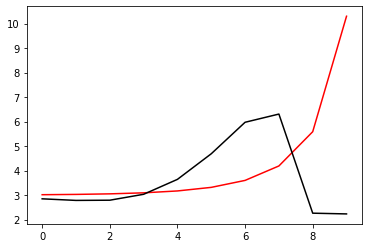

18700 0.0006666975841784591
[2.9009759  2.84045594 2.85421996 3.10261111 3.72391028 4.79024868
 6.11323196 6.49547495 2.46595453 2.46883373]


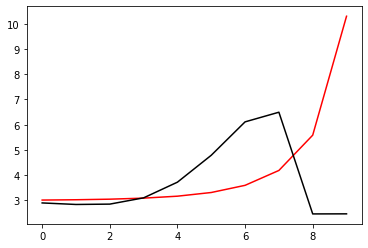

19800 0.030580077261051622
[2.8867754  2.80909643 2.8077863  3.04176304 3.64779976 4.69575714
 5.99642536 6.36201872 2.33057941 2.33106263]


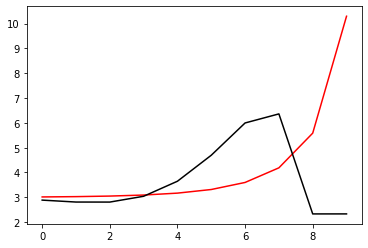

20900 0.03597278015834462
[2.93185567 2.84608992 2.83903314 3.0699962  3.67695301 4.73200189
 6.05029082 6.45436666 2.48074797 2.43571084]


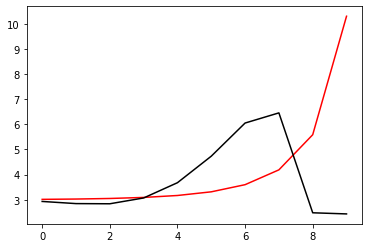

22000 0.010999823961464398
[2.85053394 2.76790442 2.76116578 2.98777647 3.58181149 4.6059403
 5.85385791 6.12739441 2.01084726 1.99702836]


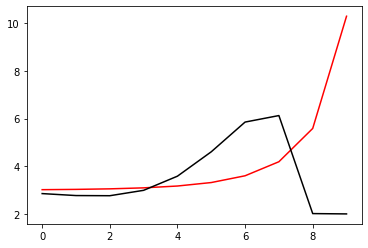

23100 0.04444973163318267
[2.90940125 2.83057912 2.82841903 3.06163923 3.66693414 4.71209868
 5.99812682 6.31609272 2.20481829 2.16759727]


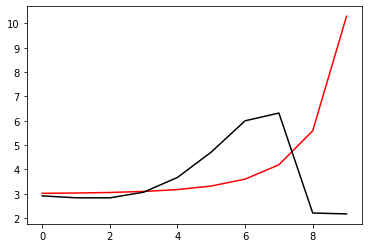

24200 0.030697789757808337
[2.92193439 2.84831656 2.8519606  3.09249638 3.70890721 4.77360404
 6.09537639 6.46438844 2.38138675 2.3799544 ]


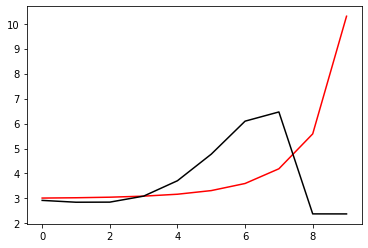

25300 0.044718994683626265
[2.96936317 2.88720016 2.8843832  3.12053236 3.73500543 4.80115676
 6.13053535 6.52047918 2.46804255 2.37361111]


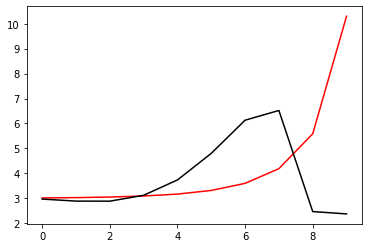

26400 0.3137348184310487
[2.57085977 2.48907828 2.48786623 2.72766189 3.34970142 4.43119328
 5.79188915 6.24632423 2.29150659 2.70814898]


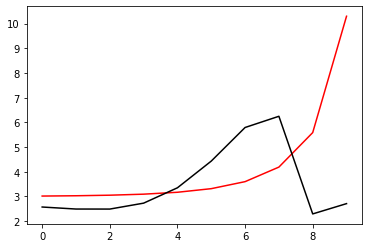

27500 0.010520171389451596
[2.83968993 2.76060778 2.75880836 2.99296137 3.60027634 4.64821331
 5.93391796 6.24319902 2.11366292 2.10034744]


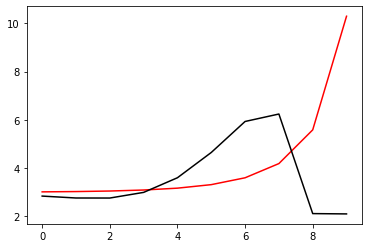

28600 0.02064667727232433
[2.92120944 2.84578127 2.84914116 3.09154066 3.713629   4.78979674
 6.12716923 6.49495249 2.36714817 2.37235501]


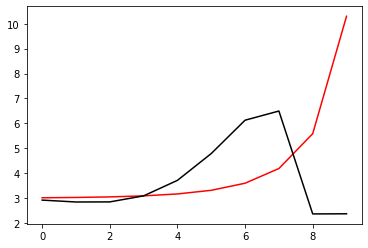

29700 0.007829599892325866
[2.87115133 2.78094242 2.77120021 3.00110015 3.60993681 4.67031074
 5.99009547 6.35167423 2.23800136 2.26587076]


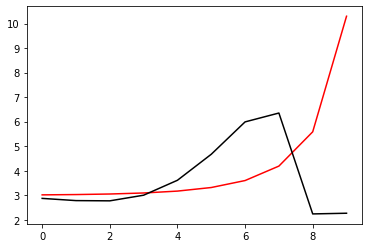

30800 0.11191927877214121
[2.7418893  2.61615189 2.57350709 2.77244317 3.35038956 4.37648628
 5.6538665  5.96455763 1.79985661 1.89199998]


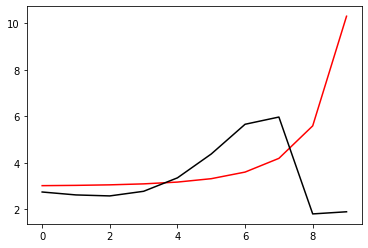

31900 0.05043395045482851
[2.92713398 2.78558837 2.72792774 2.91271562 3.47656443 4.48716825
 5.74647154 6.03957679 1.86162162 1.85309835]


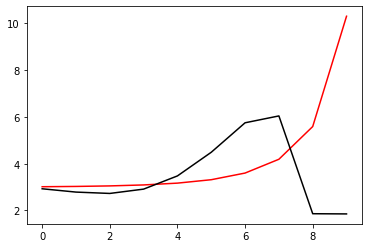

33000 0.010513252535762026
[3.00946421 2.87354498 2.82027026 3.00933656 3.57812797 4.59524319
 5.8639114  6.17409197 2.02455497 2.02360164]


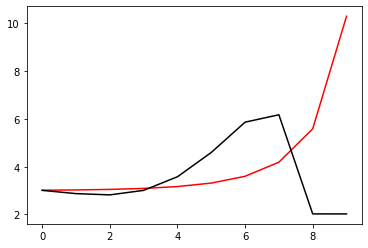

34100 0.05408685695855899
[2.95961    2.8129317  2.74860784 2.92667517 3.4838213  4.48709703
 5.73816667 6.03086548 1.86754275 1.83153371]


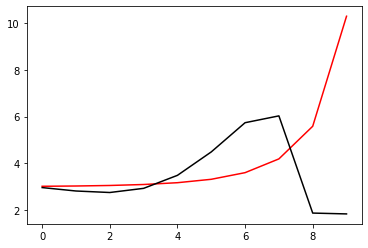

35200 0.030753444117325685
[3.02824737 2.8894266  2.83176001 3.01663446 3.58189365 4.59624764
 5.86394547 6.18629033 2.07094139 2.06559705]


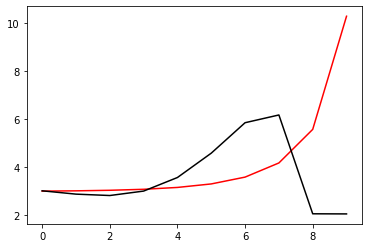

36300 0.05062811542252216
[2.91920059 2.76603163 2.69429941 2.86456411 3.41253913 4.4035387
 5.63832458 5.92036982 1.76136626 1.75009333]


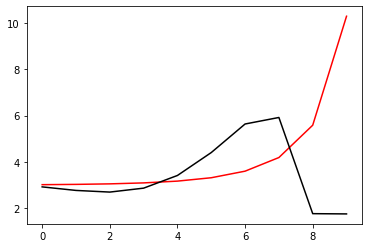

37400 0.011006074635471607
[2.98307004 2.83668984 2.77092709 2.94770402 3.5039478  4.50663825
 5.75869459 6.06824734 1.94955454 1.93009404]


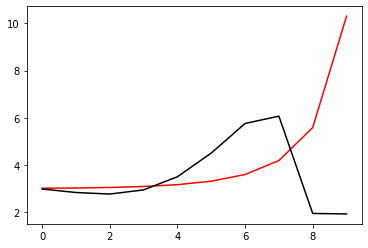

38500 0.1040441640313719
[2.7848123  2.64646823 2.58561386 2.76427305 3.31818002 4.31196466
 5.54603513 5.83339147 1.695076   1.96284683]


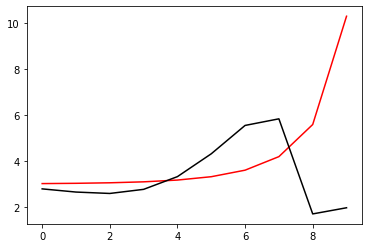

39600 0.030672459721530123
[2.92135924 2.77280255 2.70265953 2.87284876 3.41833654 4.40228414
 5.62317235 5.8949937  1.74174571 1.73205619]


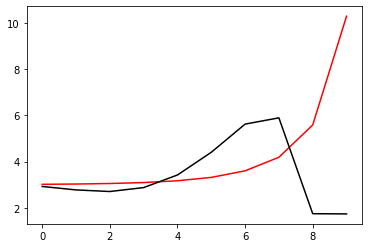

40700 0.009214677973750697
[2.96755535 2.82419336 2.75860046 2.93400194 3.48666517 4.48149522
 5.71890672 6.01561224 1.89445267 1.8839798 ]


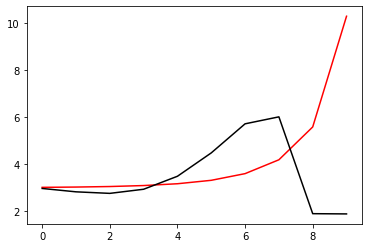

41800 0.10060135071299367
[2.8232582  2.68247719 2.61809873 2.79390614 3.3461641  4.33943739
 5.57378564 5.86853529 1.74677072 1.75441097]


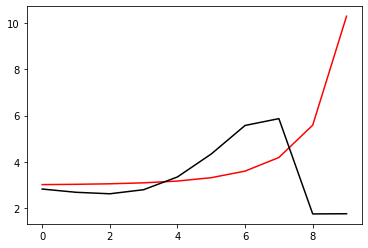

42900 0.03990423503192199
[3.03622354 2.88969289 2.81949976 2.99033726 3.53889746 4.53003762
 5.76450581 6.06637465 1.96345545 1.93044289]


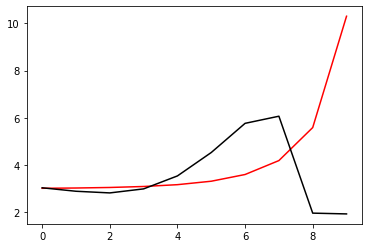

44000 0.017954006452678785
[2.94444221 2.78444774 2.70124267 2.85958557 3.3953275  4.37183575
 5.5888171  5.87442686 1.76004961 1.74501334]


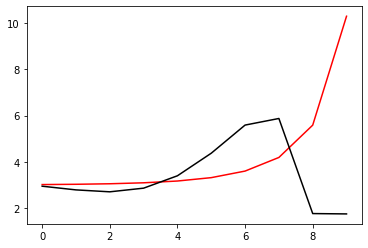

45100 0.04796310822584228
[3.05427852 2.90336685 2.8282225  2.99506293 3.54116634 4.53185522
 5.76951125 6.0878493  2.02288924 1.97334874]


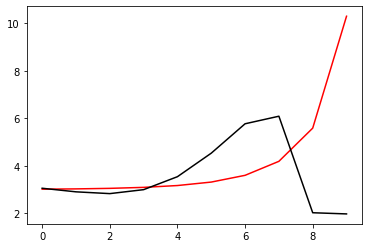

46200 0.04092237255056551
[2.98102417 2.81828155 2.73143911 2.88695765 3.42145973 4.39899408
 5.62114492 5.92599349 1.85437558 1.82370433]


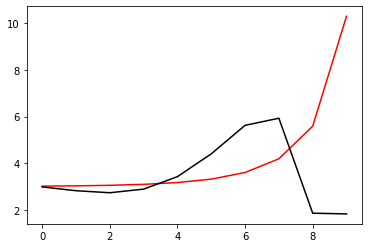

47300 0.15416748277007788
[3.11924359 2.97084881 2.89676005 3.06499091 3.61366638 4.60889242
 5.85513541 6.19700186 2.1802195  2.0647411 ]


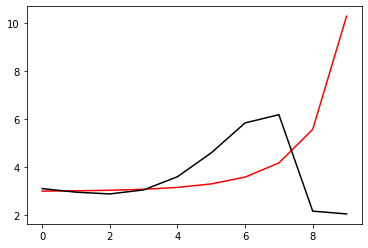

48400 0.018172156454930016
[2.9899895  2.82040175 2.72577427 2.87346527 3.39959453 4.3670912
 5.57753587 5.87837506 1.82053723 1.80577828]


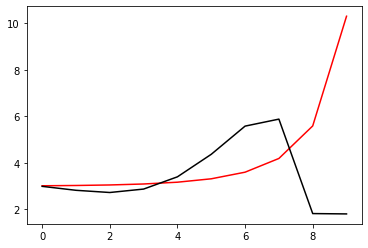

49500 0.010475935919284945
[2.992078   2.83168561 2.74421215 2.89802583 3.42962012 4.40201175
 5.61701021 5.92617036 1.88499893 1.94384128]


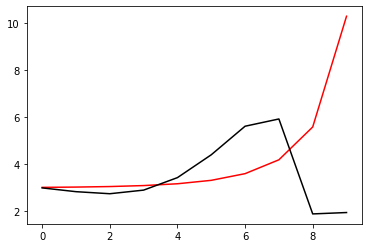

50600 0.02758196843762552
[2.96481225 2.80846122 2.72432256 2.88135514 3.4162979  4.39233572
 5.61195769 5.93158188 1.91053439 1.90956607]


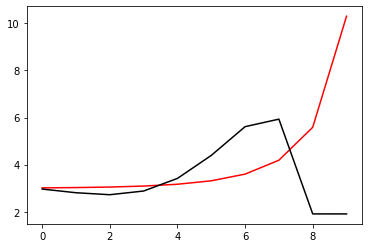

51700 0.0063167073718738455
[2.97989635 2.8367481  2.76509375 2.93527993 3.48606628 4.48393712
 5.73647389 6.1088356  2.16597437 2.1386319 ]


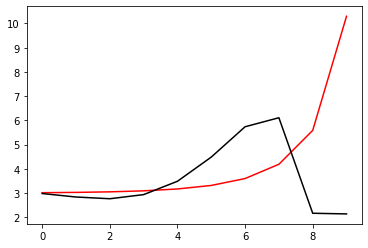

52800 0.04111398112723777
[2.95036515 2.80331177 2.72724019 2.89052328 3.42829444 4.40019558
 5.6037656  5.90385072 1.88327165 1.92830408]


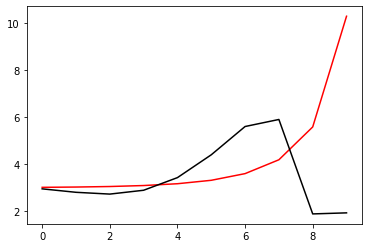

53900 0.041069073948665005
[3.02539253 2.87993964 2.80554589 2.97134047 3.51336539 4.49232619
 5.70598998 6.01672175 2.00232133 1.97522967]


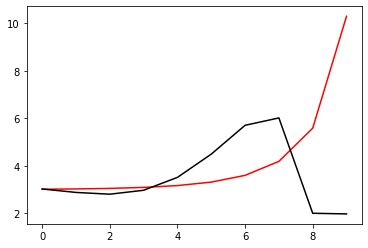

55000 0.010513770824836679
[3.03358266 2.89397998 2.82552185 2.99862151 3.55124319 4.54719469
 5.78812865 6.13730262 2.16226197 2.16101027]


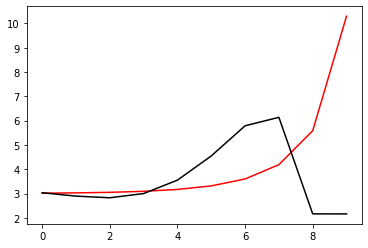

56100 0.050729710046558775
[2.95073216 2.81658696 2.75305643 2.93141519 3.49085434 4.49715468
 5.75518182 6.13240331 2.1934252  2.12567782]


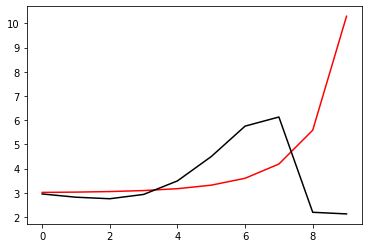

57200 0.030678421671519945
[3.01247262 2.88601332 2.82936776 3.0147591  3.58287471 4.601566
 5.87862735 6.28714956 2.39118452 2.39418213]


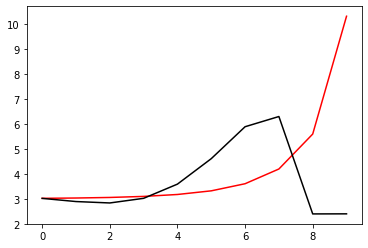

58300 0.050575312599361044
[2.8951623  2.76991018 2.71227695 2.89272004 3.44845609 4.44023495
 5.66347154 5.98242268 1.97526053 1.95914677]


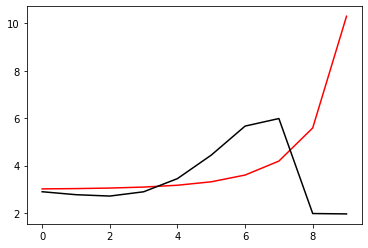

59400 0.014133215807489724
[2.91933651 2.80022739 2.74855875 2.93579563 3.50091003 4.50744689
 5.75399305 6.10302911 2.11975494 2.09754282]


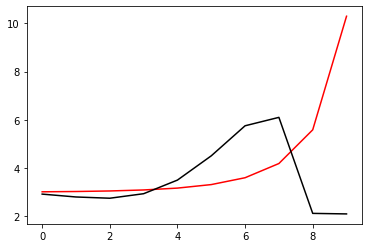

60500 0.0104738321167347
[2.93166653 2.81234493 2.76081346 2.94937401 3.51838958 4.53331915
 5.79466506 6.16424745 2.20053401 2.25873686]


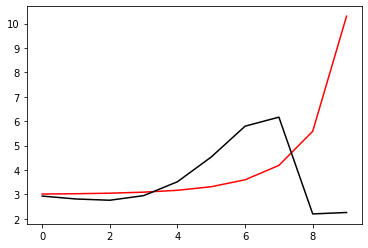

61600 0.08055710799939605
[2.74487997 2.63216599 2.58716962 2.78272559 3.36058558 4.388804
 5.67260188 6.07971122 2.16277246 2.17811212]


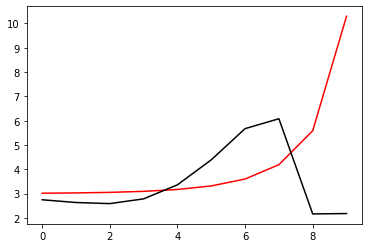

62700 0.0006128773779497743
[2.98776458 2.86451432 2.80954965 2.99620875 3.56675402 4.58946367
 5.87004452 6.28078538 2.37804842 2.31794418]


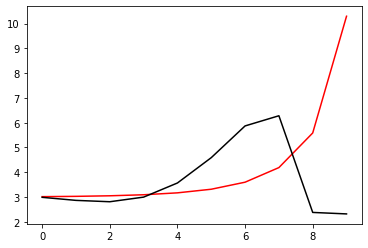

63800 0.04139054399479467
[2.89277884 2.77337706 2.71990721 2.90386441 3.4639672  4.4606508
 5.6850679  6.00233282 2.00036137 2.02420836]


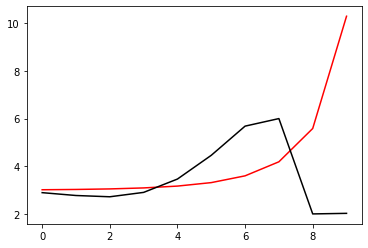

64900 0.05040792561874886
[2.90224906 2.78603687 2.73572782 2.92338284 3.48884603 4.49453466
 5.73447006 6.07338079 2.08812704 2.08058205]


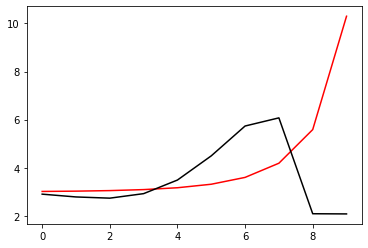

66000 0.010485065488842527
[2.97215002 2.86155562 2.81703476 3.01181208 3.58799841 4.61164258
 5.88035661 6.25205537 2.28096846 2.27884613]


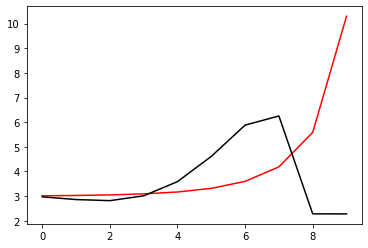

67100 0.04263046304887651
[2.95927785 2.85721348 2.82234149 3.02959706 3.62500572 4.6819077
 6.00920393 6.46647551 2.56930582 2.53512484]


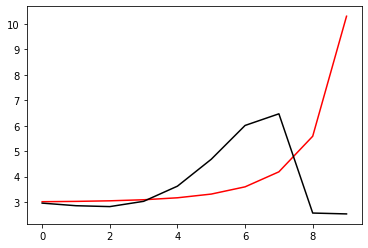

68200 0.03994071019664776
[2.9001148  2.80061401 2.76600363 2.96979758 3.55546524 4.5905079
 5.87173488 6.24354419 2.23212704 2.1991903 ]


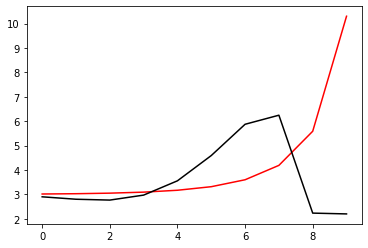

69300 0.04670136298226904
[2.99289641 2.90284185 2.87813887 3.09346375 3.69519005 4.75588643
 6.07906221 6.50544231 2.52393526 2.42773395]


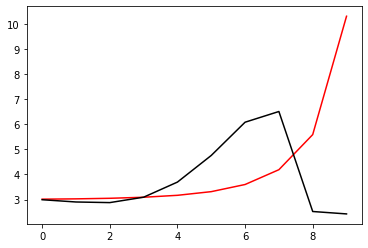

70400 0.1555404135053357
[2.63153129 2.54201782 2.51895201 2.73732611 3.34537684 4.41981938
 5.77447128 6.27036307 2.39306473 2.75619641]


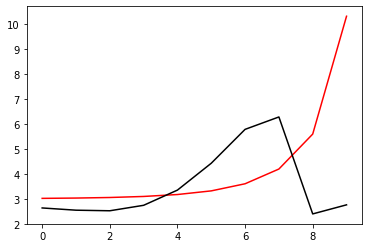

71500 0.010728536376895787
[2.95815891 2.86677143 2.84128602 3.0558214  3.65710161 4.71772325
 6.04030823 6.46073773 2.44658861 2.42532711]


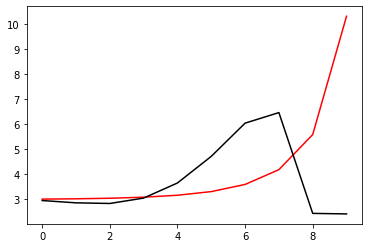

72600 0.07153878812969344
[2.7608584  2.67349297 2.65198555 2.87023418 3.47560379 4.54240587
 5.87885523 6.33488206 2.38258061 2.3435384 ]


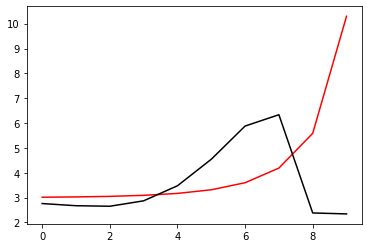

73700 0.0007178699516666349
[2.91575455 2.82304578 2.79814743 3.01537427 3.62346729 4.69890037
 6.05325919 6.54192581 2.63224995 2.61514003]


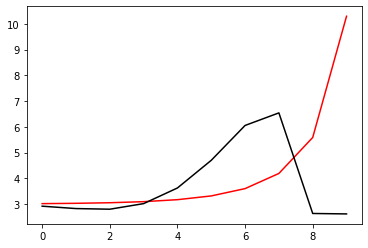

74800 0.030782782499732646
[2.90592274 2.81927769 2.79747641 3.01293745 3.61070812 4.65688509
 5.9333733  6.24877529 2.16526405 2.20128616]


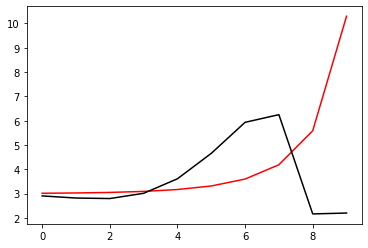

75900 0.03433315757661921
[2.9491201  2.86750407 2.85147926 3.07449877 3.68434735 4.75332657
 6.07560311 6.44326406 2.34283851 2.31269833]


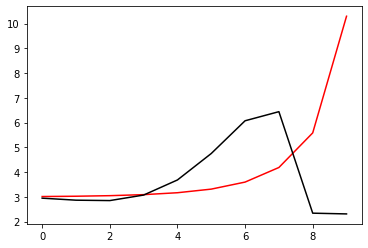

77000 0.010547254936943539
[2.91604952 2.83790623 2.82565502 3.0529868  3.66922954 4.75039394
 6.10096813 6.52547029 2.46500347 2.46026891]


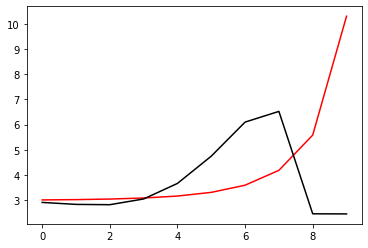

78100 0.04158527531616937
[2.91845041 2.83895789 2.82748786 3.05810283 3.6826012  4.78273196
 6.17654462 6.68026328 2.67862584 2.6658828 ]


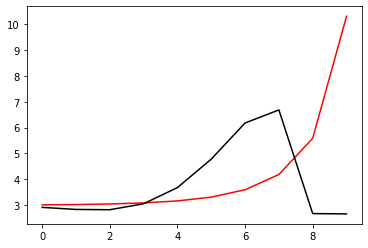

79200 0.038785251540749424
[2.88011124 2.79983944 2.78544773 3.0088807  3.61804889 4.68540847
 6.00600095 6.36049976 2.17778817 2.14887457]


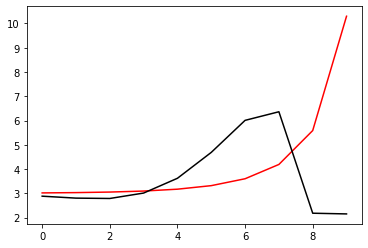

80300 0.03536378648457475
[2.94833176 2.87264    2.86372446 3.09447509 3.7153578  4.80389294
 6.16202694 6.55513307 2.36514403 2.29394018]


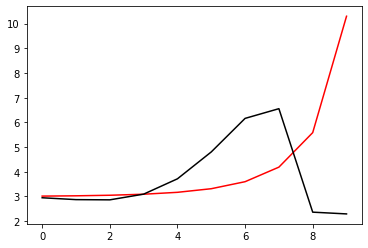

81400 0.07702358068228903
[2.68057215 2.60940532 2.60455984 2.83853209 3.46258077 4.55712408
 5.93465663 6.38205724 2.27156605 2.52897683]


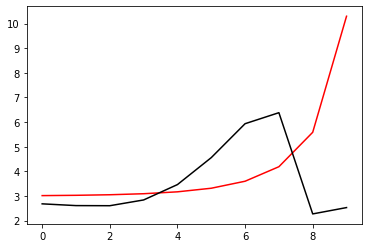

82500 0.010556989876211998
[2.83973169 2.75758758 2.74516449 2.97500021 3.59933771 4.70019189
 6.09204415 6.56532133 2.48554416 2.50396208]


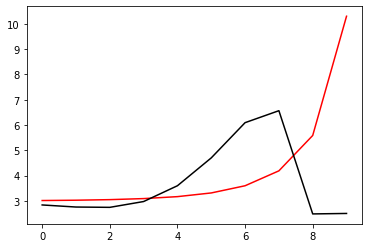

83600 0.021859211924977574
[2.87718316 2.7926586  2.77616469 2.99799475 3.6061746  4.67161728
 5.98068591 6.29646268 2.06672519 2.28662244]


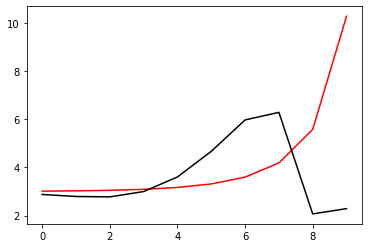

84700 0.0006255181510081662
[2.92314707 2.84326262 2.83203591 3.06080377 3.68006294 4.76593574
 6.11322144 6.47142251 2.23631487 2.2346923 ]


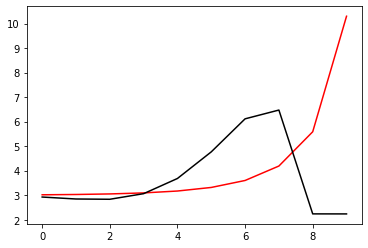

85800 0.030556493357911694
[2.89780736 2.82143017 2.81405417 3.04734325 3.67328023 4.77144043
 6.14487025 6.55109467 2.35273362 2.35109793]


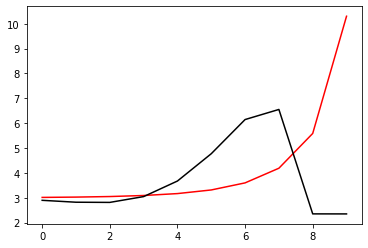

86900 0.03678341840494143
[2.93165795 2.84225833 2.82391048 3.04764094 3.665096   4.75561103
 6.12406617 6.53575548 2.35084733 2.31419463]


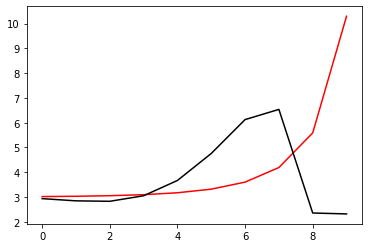

88000 0.010273008328279723
[2.89779156 2.78873436 2.75291638 2.960347   3.56136238 4.63354253
 5.98121889 6.37483864 2.16979489 2.09656493]


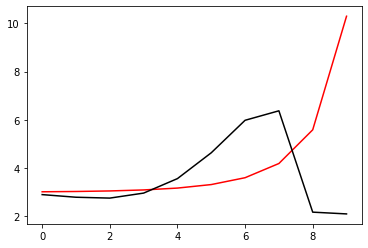

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for j in range (5000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, Positive[j%10], Negative[j%10])
        gradients=g.gradient(loss, [h])
    for i in range (100):
        optimizer.apply_gradients(zip(gradients, [h]))
    if j%11==0: 
        print(j*100, Error_func(h, Positive[j%10], Negative[j%10]).numpy()), print(h.numpy())
        plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

In [ ]:
c_reg2=0.0001
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for j in range (5000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, Positive[j%10], Negative[j%10])
        gradients=g.gradient(loss, [h])
    for i in range (100):
        optimizer.apply_gradients(zip(gradients, [h]))
    if j%11==0: 
        print(j*100, Error_func(h, Positive[j%10], Negative[j%10]).numpy()), print(h.numpy())
        plt.plot(h_real, 'r-'), plt.plot(h.numpy(), 'k-'), plt.show()

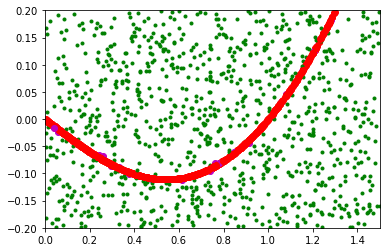

In [16]:
for i in range (set):
    [Positive0[i], Positive1[i]]=NN_func_01(h, Positive[i])
    [Negative0[i], Negative1[i]]=NN_func_01(h, Negative[i])
for i in range (set):
    x_data1[i]=[v[0] for v in Positive0[i]]
    y_data1[i]=[v[1] for v in Positive0[i]]
    x_data2[i]=[v[0] for v in Positive1[i]]
    y_data2[i]=[v[1] for v in Positive1[i]]
    x_data3[i]=[v[0] for v in Negative0[i]]
    y_data3[i]=[v[1] for v in Negative0[i]]
    x_data4[i]=[v[0] for v in Negative1[i]]
    y_data4[i]=[v[1] for v in Negative1[i]]
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'co')
    plt.plot(x_data1[i], y_data1[i], 'ro')
    plt.plot(x_data3[i], y_data3[i], 'mo')
plt.xlim(0.0, 1.5)
plt.ylim(-0.2, 0.2)
plt.show()